# DiffuPath evaluation by Database

In [1]:
import os 

import matplotlib.pyplot as plt

import networkx as nx

import pybel
from pybel_tools.summary import plot_summary, count_top_centrality

from diffupy.process_network import process_kernel_from_file
from diffupy.utils import from_json, to_json

from diffupath.constants import DEFAULT_DIFFUPATH_DIR, ROOT_RESULTS_DIR
from diffupath.utils import reduce_dict_dimension

In [2]:
DEFAULT_DIFFUPATH_DIR

'/Users/josepmarin-llao/.diffupath'

In [3]:
ROOT_RESULTS_DIR

'/Users/Projects/MultiPath/Results'

## 1. PathMeUniverse graph and kernel import

##### Import graph

PathMe Universe v1.0.0
Number of Nodes: 42272
Number of Edges: 105871
Number of Citations: 7695
Number of Authors: 0
Network Density: 5.92E-05
Number of Components: 435
Number of Warnings: 0


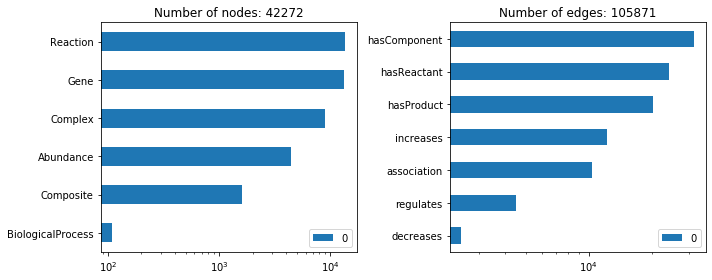

In [4]:
GRAPH_PATH = os.path.join(DEFAULT_DIFFUPATH_DIR, 'pickles', 'universe', 'pathme_universe_non_flatten_collapsed_names_no_isolates_16_03_2020.pickle')

pathme_universe_graph_no_flatten = pybel.from_pickle(GRAPH_PATH)
pathme_universe_graph_no_flatten.summarize()

nx.number_of_isolates(pathme_universe_graph_no_flatten)
pathme_universe_graph_no_flatten.remove_nodes_from({
    node
    for node in nx.isolates(pathme_universe_graph_no_flatten)
})

plot_summary(pathme_universe_graph_no_flatten, plt, figsize=(10, 4))
plt.show()

## 2. Load/import preprocessed datasets mapping 

##### Dataset 1

In [6]:
MAPPING_PATH_DATASET_1 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_1_mapping.json')

dataset1_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET_1)

In [7]:
dataset1_mapping_by_database = reduce_dict_dimension(dataset1_mapping_by_database_and_entity)

dataset1_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset1_mapping_by_database.items() for entity, entity_value in entity_set.items()}


In [8]:
dataset1_mapping_kegg = dataset1_mapping_by_database['kegg']

##### Dataset 2

In [9]:
MAPPING_PATH_DATASET2 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_2_mapping.json')

dataset2_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET2)

In [10]:
dataset2_mapping_by_database = reduce_dict_dimension(dataset2_mapping_by_database_and_entity)

dataset2_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset2_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [11]:
dataset2_mapping_kegg = dataset2_mapping_by_database['kegg']

##### Dataset 3

In [12]:
MAPPING_PATH_DATASET3 = os.path.join(ROOT_RESULTS_DIR, 'data', 'input_mappings', 'dataset_3_mapping.json')

dataset3_mapping_by_database_and_entity = from_json(MAPPING_PATH_DATASET3)

In [13]:
dataset3_mapping_by_database = reduce_dict_dimension(dataset3_mapping_by_database_and_entity)

dataset3_mapping_all_labels = {entity:entity_value for entity_type, entity_set in dataset3_mapping_by_database.items() for entity, entity_value in entity_set.items()}

In [14]:
dataset3_mapping_kegg = dataset3_mapping_by_database['kegg']

## 3. Evaluation: random cross-validation by method

In [3]:
from diffupath.views import show_sb_box_plot, preprocess_for_sb_boxplot, fdr_barchart_three_plot, preprocess_for_sb_ttest

from diffupath.cross_validation import cross_validation_by_method, get_p_values, get_wilcoxon_test

from collections import defaultdict

In [17]:
metrics_by_method['auroc']['Dataset 1'], metrics_by_method['auprc']['Dataset 1'] = cross_validation_by_method(dataset1_mapping_kegg, 
                                                                                                              kegg_pathme_graph_no_flatten, 
                                                                                                              kernel_kegg, 
                                                                                                              k = 3)

100%|██████████| 3/3 [00:41<00:00, 13.93s/it]


In [18]:
metrics_by_method['auroc']['Dataset 2'], metrics_by_method['auprc']['Dataset 2'] = cross_validation_by_method(dataset2_mapping_kegg, 
                                                                                                               kegg_pathme_graph_no_flatten, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:40<00:00, 13.42s/it]


In [19]:
metrics_by_method['auroc']['Dataset 3'], metrics_by_method['auprc']['Dataset 3'] =  cross_validation_by_method(dataset3_mapping_kegg, 
                                                                                                               kegg_pathme_graph_no_flatten, 
                                                                                                               kernel_kegg, 
                                                                                                               k = 3)

100%|██████████| 3/3 [00:41<00:00, 13.77s/it]


In [1]:
metrics_by_db = {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.7823110186417729, 0.7777271477733787, 0.7879142042713078, 0.7868227314879769, 0.7729192973090738, 0.7751864690590826, 0.7918527593086244, 0.7911913145740727, 0.782937673308718, 0.7835755064236153, 0.7818772720480629, 0.7754118402576975, 0.7718864087182769, 0.783836762721473, 0.7726189392565419, 0.7863028652187154, 0.7780828733630132, 0.7882938152385058, 0.7852843489181429, 0.7777649035516667, 0.783719297765337, 0.7771285076657918, 0.7862951999972624, 0.7918502498611251, 0.7752515321887972, 0.7722852511785849, 0.7749713637820568, 0.7731996938474051, 0.7728321738545229, 0.7685380985460033, 0.784460771061964, 0.7724279018623523, 0.7854081787456642, 0.7923287558729627, 0.7659288206623345, 0.771333440555181, 0.7862465623420902, 0.7808815460934175, 0.7675194453664764, 0.7769565192594392, 0.7937419170125712, 0.7861817045308075, 0.7748955784675717, 0.7835063369252653, 0.7739150004505598, 0.7701057732121042, 0.7784374811078527, 0.792271289525224, 0.7672838538725908, 0.7792580704401912, 0.7829214303394485, 0.7763433015431961, 0.7774805147104954, 0.7620587279154363, 0.7787278926230229, 0.77481096446052, 0.7768385067874852, 0.7827673958892969, 0.7765065525096186, 0.7752318672456646, 0.7642644866411843, 0.79223068210205, 0.7799683809615062, 0.7647263846732072, 0.7662474520552945, 0.7753419407382567, 0.7763507158198992, 0.7753773011348406, 0.7761619369284591, 0.7766705563102909, 0.7646291549891808, 0.779652350268682, 0.776105428733402, 0.7865053091924484, 0.7781975094874225, 0.7883063624760034, 0.7815521845310813, 0.7706169704809128, 0.7823437555250619, 0.7985862000919369, 0.7716912193291334, 0.7859485540449442, 0.7731163345641033, 0.7689316939797215, 0.7848344734209587, 0.7768184996469665, 0.7612671797346144, 0.7772957281218953, 0.7813522956311659, 0.7803685465850413, 0.794813063271156, 0.7798154415429908, 0.7755815017218233, 0.7790654817511837, 0.7657776150439097, 0.7791633502036645, 0.7897270975844286, 0.7731169505193985, 0.7915825374392457, 0.7646548197931531], "reactome": [0.7066527617203944, 0.6945499003946095, 0.6976586868616051, 0.6965112189018056, 0.7137979123520548, 0.6880614215913777, 0.6959875008763622, 0.682994282253393, 0.7073329920297027, 0.6971720892713812, 0.6939509751678283, 0.6974870465009092, 0.7025689806981734, 0.7172116595220381, 0.6836845090892418, 0.7121915705023029, 0.711665286701714, 0.7094161348736692, 0.7073234953294896, 0.7038847901649108, 0.7162915125757637, 0.6883515207915756, 0.6857256998434944, 0.7073722117354956, 0.6974183037200674, 0.6983769372935218, 0.7043746199653826, 0.6816606123259039, 0.6942163163039616, 0.714892631973477, 0.7049507531116521, 0.7233646215728241, 0.7038212455778698, 0.7111981823382435, 0.6947269055578821, 0.7097068338654595, 0.696850134473275, 0.698144784625502, 0.673568290804555, 0.6810217009929616, 0.7048860422631815, 0.678037604533678, 0.7146115962906754, 0.6936354514684631, 0.6981276239216081, 0.709417301135099, 0.718998838536903, 0.6935426837021695, 0.6958361867862981, 0.7144098997068485, 0.6734354369668353, 0.6977193324559492, 0.6973902468022444, 0.6942319442071195, 0.6832075414862516, 0.6955737113211062, 0.691364140673254, 0.689859363533151, 0.7079923962420525, 0.7022656194394321, 0.6913798352199222, 0.717405625458674, 0.6797685031041214, 0.6958801048595649, 0.6796104913412753, 0.7041431004107107, 0.7086570652917132, 0.7078897319144841, 0.6878635903311463, 0.7007138919463451, 0.6871995543948329, 0.7060920232249968, 0.692999805667524, 0.6972818844545482, 0.6894863598061793, 0.6938598068457813, 0.709054660473974, 0.7206997475277257, 0.7112769549673806, 0.69656323416157, 0.6600652493280335, 0.6905588871386822, 0.6873124485012274, 0.6812282958747934, 0.6784322007579766, 0.7080761338127046, 0.68273147357065, 0.7112342697990539, 0.6968671285683935, 0.7158364706876517, 0.6955821417251552, 0.6851146454978444, 0.6733319729171436, 0.7050988349914682, 0.7119311943076846, 0.6946871860257623, 0.7006034303280754, 0.6994330703224986, 0.7106809620550513, 0.6994264726149819], "wikipathways": [0.8750314973468117, 0.8593345556514237, 0.8370429666717114, 0.8543520751973314, 0.855890715713334, 0.8473864808316705, 0.8483275006357979, 0.8439874490386581, 0.8566535756022136, 0.8622002291212572, 0.8622398202135344, 0.8550690055185692, 0.8606762646135988, 0.8496324464408583, 0.8517005934373181, 0.8486867946739645, 0.8547381858620404, 0.8488541791810924, 0.8362905408884319, 0.8519546687844326, 0.8585994387816398, 0.8457081988276356, 0.8656092074448416, 0.8543392032165911, 0.8548536923861842, 0.8492842691133311, 0.8470922293022451, 0.8439023184387613, 0.8488556906636793, 0.8529798440384007, 0.8510399780318195, 0.8661203811042444, 0.8510025810271685, 0.8738695572974768, 0.8698841190182345, 0.8486669016128201, 0.8290783310735855, 0.8472698528849618, 0.8444668328062321, 0.836351146464418, 0.8481060440580597, 0.8489545708793669, 0.8483843518840679, 0.8608592515216242, 0.8527907136850218, 0.863467680406661, 0.8446363626434836, 0.8303395901561332, 0.8460718810410546, 0.8870446146753063, 0.8598099900612706, 0.8582200078948148, 0.8598207654693905, 0.8305277941169587, 0.8478740071022128, 0.8686378772465507, 0.8458505707358248, 0.8560995928553486, 0.8651378199077273, 0.8540778630015586, 0.8602660189850014, 0.8761710577023594, 0.8401522813830592, 0.8587191872085276, 0.8423365687511994, 0.8471906219429046, 0.8582622318922436, 0.8629662582478193, 0.8579217094926568, 0.8676629222204713, 0.8582405348034956, 0.8722625587625423, 0.8640108877454062, 0.86788125831803, 0.8549759762032181, 0.8633043427722658, 0.8546902572367835, 0.868796192858157, 0.8642810530684462, 0.8501880869428188, 0.8725581755020463, 0.8654813165149853, 0.8422878112483949, 0.8375429748629719, 0.8607736333466993, 0.8567706911239501, 0.8570816664768375, 0.8629802028936213, 0.8641063061783947, 0.8497039736974725, 0.8510873703245455, 0.8478074043533819, 0.8637636384486844, 0.8615114318791376, 0.854450955413019, 0.8592507415041026, 0.8692751865657087, 0.849635030588507, 0.8445522559511458, 0.8545629026394582]}, "subgraph": {"kegg": [0.6017422955957159, 0.5895405284840851, 0.6059929600431844, 0.5974598426318491, 0.5913449016542774, 0.5944559777780277, 0.6028437976780888, 0.5832610969287346, 0.581309027113955, 0.5798103185224337, 0.6067668304824883, 0.585538699144934, 0.5904839876594581, 0.5911259807394579, 0.6062399958015167, 0.5961182772723354, 0.5902719642529137, 0.5880691850069163, 0.6020241937600043, 0.5985872853431697, 0.5922005675449744, 0.6136455205556992, 0.6086805141642582, 0.5949283071490424, 0.6013816758695921, 0.6042358198100936, 0.593669211997166, 0.5987217117816189, 0.5970167526980878, 0.5825065695017675, 0.601713431023043, 0.580697398064949, 0.5899094702038888, 0.5958929086867369, 0.6007036208169798, 0.593926743963743, 0.5853817808316746, 0.6069600356871081, 0.6044201782106214, 0.5845156937056488, 0.5935344106941368, 0.6191582790716854, 0.5906870143160783, 0.6043587004194735, 0.59479545514183, 0.5936672627013492, 0.5854249652313102, 0.5935542785168858, 0.597626507424193, 0.6093114862256009, 0.5923390425208893, 0.6182515566251692, 0.6085844738588186, 0.6059978332827266, 0.6004930968687562, 0.5897837406236996, 0.6048531468007182, 0.5872205665703265, 0.5988854526302374, 0.5798190153806937, 0.5763885546346382, 0.6043230882843573, 0.5957780501793727, 0.6004567350044796, 0.6055347255803841, 0.5887314957471614, 0.5899814442032816, 0.5936762594512732, 0.5981420961677594, 0.5934772063592028, 0.5875730142486028, 0.5909362242889756, 0.5905739551586989, 0.5981399219531944, 0.6026979753564026, 0.5923469146770729, 0.5993511843846411, 0.5833449916217766, 0.6028588672342117, 0.5914181501932426, 0.5793121984683033, 0.5871171789191155, 0.5915299348110494, 0.5913041913608709, 0.6041708182918921, 0.5802161469169262, 0.5985754396224364, 0.5925973991895428, 0.5894322675933319, 0.5952563886296075, 0.6218950154256775, 0.5884048387520008, 0.6131129879331092, 0.6017653122809385, 0.6020459359056541, 0.5996556493966555, 0.5920626173794716, 0.5985582708246646, 0.5891448214332572, 0.6109676379407939], "reactome": [0.6467798615517463, 0.6562569355323483, 0.6675159940651403, 0.663489115448287, 0.6748330462909512, 0.6818216775043056, 0.6768359183050345, 0.6404531293980698, 0.653102443120286, 0.677837640559327, 0.6669714086704293, 0.6525594797933294, 0.654033653135123, 0.6620533946538554, 0.6625175445710824, 0.6584889961785991, 0.6792381052340309, 0.6628775004890057, 0.6866495713447418, 0.6290150709177564, 0.6625437361945336, 0.6711396934291944, 0.6546456497574056, 0.6513779465576384, 0.6453854557771852, 0.6442754843542022, 0.6685184319375599, 0.6535004222146948, 0.6525365323053876, 0.6639116163905177, 0.6586169009918466, 0.6713611533855894, 0.6596865115524619, 0.6514604811816286, 0.6671175378919798, 0.6582130538287955, 0.6706645229928104, 0.6760992610050142, 0.6811677933676512, 0.6402127294152447, 0.6601978445582013, 0.6575109847382508, 0.6405638116683923, 0.6501733704182548, 0.671722922202768, 0.6591013744638827, 0.6708746761827975, 0.6718647577155561, 0.6689078713223192, 0.6624419752968622, 0.6720680409715232, 0.6558120118888024, 0.67440858932584, 0.6542993382917719, 0.6788932250046514, 0.6750638092829984, 0.6643826839496396, 0.6662756847272779, 0.6777527682494551, 0.6693319466244292, 0.6430517296490131, 0.6603548511752835, 0.6595604196384697, 0.6698150365680863, 0.679942368886832, 0.6394638588991886, 0.6562586053079782, 0.6704256973698649, 0.689072606615174, 0.6542323564350768, 0.6585805475909908, 0.6589369254182788, 0.6602445982758375, 0.6585767786688548, 0.6622510960884312, 0.6549700633083504, 0.667810447070498, 0.656212185545468, 0.6605347098645573, 0.6434015237895319, 0.6693683954410354, 0.6671014126301829, 0.6702316694416748, 0.6652449560849009, 0.6556787160856643, 0.6704428722049148, 0.6584792160641957, 0.6469311432238121, 0.6738502163552138, 0.6574339842277764, 0.6615204976885534, 0.6661247370103383, 0.6629820284434351, 0.6490260437290383, 0.6694744500474693, 0.6802874876555873, 0.6583293179205092, 0.6704994537448297, 0.6725820456182702, 0.6517795037426828], "wikipathways": [0.6180960673788543, 0.5976134946421832, 0.597535035035035, 0.6133746451369403, 0.6094906381791628, 0.6099213968066428, 0.6013128907596121, 0.6340418287139598, 0.6172663442130655, 0.5883937215904429, 0.631299844926894, 0.6011785350924695, 0.6212534255567042, 0.5962089138318647, 0.5852512348413987, 0.600121638031474, 0.594837152726497, 0.6094778179819165, 0.6040297469600748, 0.5979934852885673, 0.6149658880191667, 0.6198770491803279, 0.616227908236105, 0.6045210169185579, 0.6101101101101101, 0.6019595415087219, 0.5905772575854544, 0.6164653382891089, 0.60515946274143, 0.6102988234135776, 0.5860019855921496, 0.6208929216101348, 0.6152058821116198, 0.6219923817259883, 0.6126997899538883, 0.6262466359802425, 0.5940530694629056, 0.6040102602602603, 0.6164996964177292, 0.6181360663942631, 0.6066430159667866, 0.5998447217709513, 0.6018051863338748, 0.6087727071333628, 0.6110126519962584, 0.5987678252022515, 0.6028713139368878, 0.6024005562939989, 0.593921790643102, 0.6202637063292801, 0.6111234185004677, 0.6128146589212162, 0.5948381783422766, 0.6038938528692627, 0.5953725241635077, 0.594725873414398, 0.5974581138515564, 0.6187216930044798, 0.6269814896864077, 0.6224513447874103, 0.6139859121416499, 0.6070014686817966, 0.6267261113572589, 0.6251158945831078, 0.5957222591443904, 0.6056312460000984, 0.5982739912043191, 0.6102275431168873, 0.6214175240814586, 0.6274255813190239, 0.6038261622278016, 0.612026473194506, 0.6091603898980948, 0.6034959139467335, 0.587661431923727, 0.6155797190633255, 0.6042610233184004, 0.611969038710842, 0.6196842334137416, 0.6037830863650535, 0.6095670465547515, 0.6089209086135317, 0.6196078250381528, 0.5989601281609478, 0.6142315471208915, 0.6035066829124206, 0.5900721418139451, 0.6050522858924499, 0.6141253958876909, 0.6041097449908925, 0.6083014366825842, 0.6014308365742791, 0.5849481653784934, 0.6062214878813239, 0.6242856586094291, 0.6102947209504587, 0.5993570414676972, 0.6245446265938069, 0.6186581048261375, 0.5933546251169202]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.9016515406096176, 0.9374600648428626, 0.8299782871071564, 0.9039544680045437, 0.9628987599394169, 0.9529785710904961, 0.9191179950776223, 0.9142385105073836, 0.9187881602612646, 0.9321664379023098, 0.8123890690079516, 0.7985744627981824, 0.8709813399280576, 0.9812807648617947, 0.9720365155244226, 0.9277868823362363, 0.9010998438091633, 0.9271819386595985, 0.9652371852517985, 0.9426176164331692, 0.9782856280764862, 0.9111930850056796, 0.9819833278114349, 0.8906812050359711, 0.9786199001325256, 0.9824019074214313, 0.8154492853085953, 0.9680296880916319, 0.8851568416319575, 0.9224178223210905, 0.8911204917644833, 0.8956568297993184, 0.8735963531806133, 0.9689496757856872, 0.9651232960999621, 0.9661246331881863, 0.8980351902688377, 0.9397822202764105, 0.9135374266376373, 0.8265194587750851, 0.981264494982961, 0.9234443037675124, 0.9121737149753881, 0.9773434541840211, 0.9043878384134798, 0.9134693889625142, 0.8935225175123059, 0.8981387258614162, 0.9081846365013252, 0.9121766731351761, 0.953922224062855, 0.9588179785119273, 0.914716253313139, 0.7441901741764483, 0.9169792455509277, 0.9254070427868233, 0.8693469566452101, 0.9548059742995078, 0.865594530954184, 0.9052161231541083, 0.9070043307459296, 0.9489865344566453, 0.9646159716963272, 0.7729893387921243, 0.8537116030859523, 0.9761113806323363, 0.9588475601098068, 0.8982437405338887, 0.8438254330745929, 0.9535066026126466, 0.9032445096554336, 0.8901147174365771, 0.899296845418402, 0.9801137708254449, 0.9683565647482014, 0.9098175407042787, 0.9114785474252178, 0.9050800478038621, 0.9096193439984854, 0.7070297709201061, 0.8849482913669064, 0.8946185157137447, 0.8828021464407421, 0.8968726334721695, 0.940901144216206, 0.9722465448693676, 0.8575069220939038, 0.8558192919348732, 0.9810396748390761, 0.9085972997917455, 0.9406770636122681, 0.9230774919538054, 0.9256954633661492, 0.9211398972926923, 0.9074539710336994, 0.9333615344566453, 0.8997967744225672, 0.8799800620030291, 0.8582804808784552, 0.9860123414426354], "reactome": [0.7024873346005305, 0.8202630617272266, 0.8454939571519086, 0.6931726464178017, 0.6274729406073607, 0.7952661508490484, 0.6603674871900033, 0.7604313728583183, 0.7567638622698605, 0.8933582566310958, 0.454103536847308, 0.8247744941070072, 0.7095962583504878, 0.7238929770458531, 0.806221359897152, 0.6280434422544543, 0.8876506111203127, 0.49630751353298264, 0.7411973173277386, 0.8513225384957159, 0.5410905783098954, 0.7515425891310235, 0.522902880638962, 0.7291457986628704, 0.7424618854947983, 0.8830813398638683, 0.747496496804402, 0.8294200075190539, 0.7682869439252091, 0.685566834136505, 0.6307986760155324, 0.7275788909132495, 0.7052320522022152, 0.7708371125781153, 0.7722199875383511, 0.8164456958674122, 0.6998661818717187, 0.6789521698780387, 0.7583491732984197, 0.8936527090941118, 0.6307566113779587, 0.8060215528686767, 0.7061075224717182, 0.80582437488005, 0.7318931453044034, 0.7971643176195621, 0.8300930417202332, 0.5698207257727406, 0.7580810112338873, 0.8716660488423024, 0.6508240725404675, 0.6416276911509147, 0.7432742588079407, 0.6260611462087932, 0.7411210751721364, 0.7628816379969872, 0.7546816627099617, 0.44200732450501745, 0.7980581911680036, 0.6406602044867193, 0.7710579519253773, 0.780519866339614, 0.7700694329423952, 0.7986497251338838, 0.7291957504199891, 0.8000483743332099, 0.5410905783098954, 0.6734443313957309, 0.5652330512373576, 0.7435844855100469, 0.776770855515857, 0.7735634269008614, 0.6881117447097146, 0.7640278993708709, 0.7634127040463552, 0.8324250000657261, 0.7985577087391913, 0.7394069411910077, 0.7501807464895744, 0.7464632841439978, 0.6027862564312887, 0.7906127503174565, 0.8394866010984128, 0.8890571474391837, 0.6561583943927838, 0.8386900020243606, 0.7552311320382684, 0.876782160387205, 0.7898214093231011, 0.7582571569037272, 0.7961021855208259, 0.6939324389339769, 0.8821164822395213, 0.8746316057912489, 0.6340981210252203, 0.6945344890592506, 0.49868416555589734, 0.7497127773965669, 0.5178761564489034, 0.7839165858236914], "wikipathways": [0.962387415003302, 0.9690559316455534, 0.9787123739704133, 0.9552693112712989, 0.8709512961660331, 0.971321076169518, 0.9350637058452775, 0.9614430670013832, 0.958113110949059, 0.9621185232032112, 0.8853144205596821, 0.872743191121838, 0.9585497912324064, 0.9665928827567218, 0.9499925785863175, 0.981409896508924, 0.9519888313101914, 0.9756125892989669, 0.8899372083868429, 0.9734270367478288, 0.8955387623663339, 0.8916968363266369, 0.9717663609904683, 0.9350981239956893, 0.9535828219011296, 0.9721191470321874, 0.9690946520647664, 0.9684428583413462, 0.973151691544536, 0.9584078163619585, 0.9733366891029984, 0.9479834190560392, 0.8884443211127387, 0.9377031477549687, 0.8153014492192459, 0.9701379522491186, 0.975453405353313, 0.940121022821385, 0.9439521931890784, 0.9653043532506868, 0.9579173577185929, 0.9717405473776597, 0.8768389510208209, 0.9490310215091929, 0.9671995026577265, 0.9616753895166616, 0.977159254933089, 0.9570633573615046, 0.9716996758240458, 0.8843227476009473, 0.9475488899070925, 0.8904319692990098, 0.9551875681640714, 0.9570805664367104, 0.9679975735203961, 0.9481727188833031, 0.9605697064346883, 0.9464410556907185, 0.956235170617225, 0.8970918814036581, 0.9474628445310634, 0.971312471631915, 0.9490977066756154, 0.9740078430360251, 0.9609655151644221, 0.9154690225890624, 0.8991268545467452, 0.9613763818349608, 0.8669157680302708, 0.9592940837350576, 0.9728591372660371, 0.8766087796399431, 0.9672210140017339, 0.9805279314046262, 0.9522663276478851, 0.8697531143048287, 0.898107216840801, 0.9028547704632037, 0.9491299736916263, 0.9562997046492467, 0.9425259910813967, 0.9563427273372613, 0.9436445809697744, 0.9653559804763042, 0.8879538624693732, 0.9498441503126673, 0.9613871375069644, 0.9549832103960023, 0.9006842758528709, 0.9564545863260991, 0.8835849085014983, 0.9513693046027822, 0.8722376745376674, 0.9687741330390582, 0.8878032830613223, 0.9550714069064321, 0.971626537254421, 0.9572720173983751, 0.8827825353700274, 0.9750339341451715]}, "subgraph": {"kegg": [0.8534901983045716, 0.848411955040872, 0.8994663941871027, 0.8017167158643658, 0.9005969951559188, 0.8916089539812292, 0.8038147138964578, 0.6365780161973963, 0.8386173554344536, 0.7959430820466242, 0.8672939373297003, 0.8839998675446565, 0.867348338631547, 0.875648085074175, 0.8372218437783834, 0.6135544391462306, 0.9209832917045111, 0.8804424954586739, 0.8634409059945505, 0.6608386315470784, 0.8022772858007872, 0.8262753557372087, 0.810534457311535, 0.8999347184377837, 0.8825333976687861, 0.8338962685437481, 0.9216337420526794, 0.8591479336966394, 0.8431113760217984, 0.6809647479564033, 0.9191525696336664, 0.8755392824704813, 0.8579156259461096, 0.8058914244626096, 0.8190589047835302, 0.8702718172873147, 0.8279073947926128, 0.8018822850438995, 0.8267176619739631, 0.8634290796245838, 0.8005080608537692, 0.8454979374810778, 0.9061672154102332, 0.8433029632152589, 0.8681265137753558, 0.8096593059339994, 0.8567140667574932, 0.800666534211323, 0.881830911292764, 0.7160630487435664, 0.9374195806842264, 0.9421170148349985, 0.8971460603996366, 0.7379276415379958, 0.80989346805934, 0.9040431993642143, 0.8716980775052983, 0.7348196715107478, 0.9662901150469272, 0.656514910687254, 0.837512772479564, 0.8617710225552528, 0.8658369285498031, 0.8806175257341811, 0.8261499962155616, 0.6285006055101423, 0.8792480320920375, 0.8534121442627915, 0.8445400015137754, 0.9411472524977293, 0.825915834090221, 0.8656477066303361, 0.8774102141992128, 0.8858589729034212, 0.8861640932485619, 0.826939997729337, 0.8256769414168937, 0.8817268392370572, 0.8834180101422948, 0.8365690281562217, 0.8396509801695429, 0.8035852823191039, 0.8161898274296095, 0.9087950348168332, 0.8494219270360278, 0.8650114479261277, 0.7650975438994854, 0.9305508250075689, 0.8110500870420829, 0.9007034324856191, 0.8734791288222827, 0.8083158303057827, 0.8492658189524676, 0.8114096086890705, 0.7525639570087799, 0.9048781410838632, 0.7603504389948531, 0.9094241976990615, 0.8909608689070542, 0.8285081743869209], "reactome": [0.7929137786179374, 0.620005926125964, 0.7568806823296426, 0.8589938338284274, 0.7166842950160531, 0.7830512797431513, 0.8591082305638071, 0.7569706994328922, 0.7481302697512526, 0.8158156299696944, 0.8151048699252857, 0.7992918654544363, 0.8807685960332463, 0.9042593092687612, 0.8351299246856903, 0.8244891529390586, 0.7582590692231524, 0.6720864464248206, 0.5363294025864914, 0.5625037507126354, 0.8087924205599064, 0.7235105920124822, 0.7733669397185465, 0.7960418729558616, 0.6279518108440604, 0.8070708434602574, 0.8647961862753923, 0.6952470969484201, 0.7721217031235934, 0.752634875626369, 0.6162027035136676, 0.7167499324871724, 0.780148228163351, 0.7673470459387284, 0.789466873706004, 0.6399222102199418, 0.7799250607615447, 0.8472090947279982, 0.849063822126204, 0.7958337084045969, 0.8183173552975065, 0.744285789299967, 0.8394619977795781, 0.5794944789510007, 0.7357022834338524, 0.7456510486992529, 0.7495424130584811, 0.756158670147328, 0.7553128844480451, 0.8255449785459237, 0.6676999879977196, 0.8535984337024034, 0.8158493863834129, 0.7896000240045609, 0.7547427761274642, 0.6288782368650043, 0.6995079065022354, 0.6236647463017974, 0.7229217301287245, 0.6386394664986347, 0.7487378851981877, 0.7969326672067691, 0.5913186005341016, 0.8756601254238305, 0.7917004230803852, 0.7461686470429382, 0.7412758424100578, 0.4086101359258259, 0.8133832928256368, 0.7631481231433972, 0.7068874336123863, 0.27577489723047377, 0.8103039577519728, 0.7243545023554476, 0.8848493713805623, 0.8111253638191257, 0.6190719986797492, 0.7203862483871937, 0.823365814504756, 0.7679527860293456, 0.8014316470129325, 0.8586900261049599, 0.6510355717586341, 0.5764413988657845, 0.787878446904912, 0.745086566447625, 0.7913028475410329, 0.7658298826777088, 0.8075209289765055, 0.7202099648933298, 0.8555000450085516, 0.7996913163501065, 0.8304265310408977, 0.6498428451405766, 0.7671895160080415, 0.6970624418639542, 0.8113597833588382, 0.7665200138026225, 0.806973324931737, 0.5754343325231794], "wikipathways": [0.7952879468604226, 0.8656462950622326, 0.7635482276059244, 0.8103570584062425, 0.7805197876136633, 0.8141189621445001, 0.8570799028354006, 0.8218899804381006, 0.8340678002536598, 0.7506717685246888, 0.8367978675379952, 0.8264795029987747, 0.7835938003826394, 0.8489864356499495, 0.849212149874245, 0.7840774737204153, 0.8474601775618563, 0.728594767729315, 0.835185623078742, 0.7117091940927363, 0.892474042864206, 0.8772437068724607, 0.8375394999892517, 0.8858423439884778, 0.8342935144779553, 0.8244373266837206, 0.7841419634987854, 0.8192029063393453, 0.7562393860573099, 0.8790386723704293, 0.791461553343795, 0.8532105161331928, 0.7796276790128764, 0.8289086179840496, 0.7810142092478343, 0.684924439476343, 0.7337217051097402, 0.7841097186096002, 0.7464799329306305, 0.8728261570541069, 0.7953094434532126, 0.8529203121305272, 0.7933425052129238, 0.7569810185085665, 0.8228250822244675, 0.8934198929469679, 0.7182871514864895, 0.7682452331305488, 0.6872245749048775, 0.7556912229411639, 0.8248780068359165, 0.8287903867237043, 0.747715987016058, 0.775317612158473, 0.6802059373589286, 0.905522474687762, 0.7960833207936543, 0.7903652271115029, 0.746254218706335, 0.7491455104365958, 0.8153012747479524, 0.7536060534405297, 0.8045637266493261, 0.9177432876889013, 0.8164083492766396, 0.8176014101764869, 0.7450504095100927, 0.8122272619789763, 0.8097766504009114, 0.8238246737892044, 0.7811646853973646, 0.8063586921472946, 0.7937616887723297, 0.7651604720651777, 0.764805778284142, 0.837184806208216, 0.7815731206603754, 0.7630000644897784, 0.8780713256948773, 0.9024699585115759, 0.8935488725037082, 0.7899890367376772, 0.7725660482813475, 0.72361830649842, 0.840215825791612, 0.8347341946301511, 0.7792729852318409, 0.8262000472925042, 0.7896988327350115, 0.8017584212902255, 0.8560803112706635, 0.8158064446785185, 0.8146348803714611, 0.8432683419677981, 0.8725037081622563, 0.8006835916507233, 0.804961413615942, 0.7886132547991143, 0.7336142221457899, 0.8781035705840624]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.7281453017745878, 0.6671987942486535, 0.7568747303715004, 0.8144209608513071, 0.6780003167281616, 0.696332324293232, 0.734472583901108, 0.5561964952390661, 0.7338627911760263, 0.47683970824603594, 0.6145909747036136, 0.8627911760262267, 0.5565914953027757, 0.5652541925525195, 0.7902931919827729, 0.8285171843230482, 0.8575214747154454, 0.6602526180130951, 0.8738129519974808, 0.6151097535891308, 0.8177429659954092, 0.7374632986691957, 0.8653213607661182, 0.8259633359848697, 0.7312033667839531, 0.7535490846738155, 0.5656000451428644, 0.9188502403675504, 0.8273613085605798, 0.6943773470193878, 0.7139362211417869, 0.6272637417245666, 0.7494971485364066, 0.7355192430560991, 0.7275700943085406, 0.6132294076637294, 0.8099612827126493, 0.5395791884113899, 0.7372175613023717, 0.7558462739844221, 0.9139482349686093, 0.8027092999761544, 0.822366469045283, 0.6834101793518723, 0.6826747875281916, 0.7111948842941058, 0.6144071267476932, 0.7374105106422483, 0.8175318138876198, 0.7025594911962313, 0.8833948890268254, 0.6252887414060182, 0.7390833450134429, 0.4640486232336489, 0.7938645750472817, 0.6705590252053727, 0.6781113536124304, 0.867651315058968, 0.8647625357911926, 0.7489292221775243, 0.8178012148527305, 0.8130411910435102, 0.713843387025431, 0.7871659564553386, 0.6668292780600218, 0.6688315825304396, 0.6598630787797592, 0.8083867432881844, 0.6621293233849139, 0.5196453372699853, 0.7056903672772481, 0.70717571313894, 0.768120400388083, 0.757036735005925, 0.7961271790988538, 0.7504382316375028, 0.6857219308768091, 0.7542899373278702, 0.6667328033900835, 0.47366332524523685, 0.6509273400113222, 0.6788667684808152, 0.7661399392391608, 0.892805720037789, 0.7056029939912664, 0.8232729668873451, 0.8264693729328482, 0.6221888100304532, 0.5946371005175047, 0.7979165111846908, 0.7659069438098758, 0.7911869478872958, 0.6673425961151653, 0.668513034091964, 0.6551230780152429, 0.7434774931876141, 0.7546412507485889, 0.744706180021734, 0.7863122466402241, 0.48359657569530023], "reactome": [0.7647706605004632, 0.8845290494445684, 0.707756942049857, 0.7455756475527879, 0.6737684495919622, 0.5260204323103655, 0.8167160233396211, 0.8088688194289501, 0.7015434102080418, 0.8517989831173133, 0.5904875154662177, 0.7408064745137015, 0.7261870955964382, 0.8125088740593497, 0.8200408375759787, 0.5902204485372169, 0.787382608872031, 0.6071191929845914, 0.6094932151477658, 0.7634522288256492, 0.7065061222558028, 0.7262420302495555, 0.6941542767895175, 0.6798230935139922, 0.65567551030067, 0.524516913111972, 0.7784975625916986, 0.5399594666774845, 0.6275058653306559, 0.46867710594105605, 0.7954858927810794, 0.8245294213099126, 0.8217581793472748, 0.659487975227007, 0.6641024860888556, 0.6422756806826095, 0.5820267337376523, 0.828845594747909, 0.716072358234789, 0.7749614612279669, 0.6684059822992097, 0.8187198704556364, 0.8857300054765623, 0.6693601549664308, 0.7766145717125412, 0.6955859583646037, 0.7464884079430437, 0.6650270785582443, 0.7012129571408288, 0.8948212679932117, 0.7322882226864904, 0.8110028194154277, 0.6980284375570476, 0.7733573693569433, 0.792100227852038, 0.6045837474561029, 0.7928557906195277, 0.7896560583625756, 0.6628127894633645, 0.7922253098314436, 0.739314787394441, 0.8317190996801959, 0.8305012406780119, 0.5710448740052603, 0.6400318113898975, 0.7494100863403718, 0.8015143370993152, 0.6783947925329439, 0.6892786150382345, 0.799807137110133, 0.7962389201030404, 0.794094778334449, 0.7900752520232855, 0.7252160199590273, 0.7792370675375077, 0.6142623881868522, 0.7741737828171167, 0.7210105609757747, 0.6730002095968304, 0.6723469097989898, 0.49424115805629365, 0.7945562294206336, 0.8781219785940785, 0.8161032906702366, 0.6907077611677923, 0.7630406415015245, 0.6760410539339974, 0.7608517068619298, 0.6681338444791518, 0.6961775623212509, 0.6850723109064725, 0.7796503451586513, 0.6050451985422879, 0.6578002136535432, 0.6772115846196494, 0.5581563592354448, 0.6949588581705578, 0.7680718105785549, 0.7782034509103939, 0.7555188197670094], "wikipathways": [0.8232286186761733, 0.8486829824879655, 0.8460145070418831, 0.7289091850765183, 0.8342285214016989, 0.9339664061288176, 0.6789916054757642, 0.8187434766948762, 0.7403113308988425, 0.8177339253931072, 0.7954212642001014, 0.8992315316523253, 0.837293981864883, 0.8308817536747404, 0.820560143230091, 0.8322725157545212, 0.885089926308013, 0.9072553612695107, 0.7762056119484602, 0.7253415780022978, 0.9036351733983232, 0.7994620984470262, 0.8740295556659753, 0.8127992175977412, 0.6594867588408038, 0.8991500314170261, 0.7613962304826655, 0.9482894152226666, 0.809573385703807, 0.7123725244303528, 0.7260724510801411, 0.5962714956870601, 0.8075674282995107, 0.8904952322362351, 0.8324670647032997, 0.8828841618752415, 0.8632794117260435, 0.7990992909479528, 0.8369969003620188, 0.8933188210333703, 0.9630619901305844, 0.8410167022901565, 0.7567033943533481, 0.623040379423031, 0.8457831515352277, 0.8276322604221711, 0.9088801078957953, 0.8436168227001817, 0.9367899949259532, 0.6656939219227745, 0.5812228715950648, 0.8084428985690136, 0.6505269910376033, 0.9029647682369921, 0.5949438305636398, 0.6561820557514191, 0.8580344772285713, 0.8486961276872074, 0.8366498671020356, 0.8300956707600817, 0.8210149671238567, 0.9267155142270491, 0.8157200808692656, 0.9626439727946956, 0.8118054405350623, 0.8432776765597435, 0.936642768694445, 0.8923986570864455, 0.5559131049749321, 0.8360031232993398, 0.8101990971877161, 0.8100544999960564, 0.7918299957672458, 0.8148209492411277, 0.8301850581149258, 0.9263237872896439, 0.5669261528996995, 0.8364027373562901, 0.7558726177612674, 0.8418527369619342, 0.871936839946683, 0.7231805072469484, 0.8153362410514057, 0.6613928127308626, 0.45449526378471317, 0.8409167987759191, 0.8955692791435639, 0.8326432103731396, 0.7976454319118116, 0.9334905499162651, 0.8391737453564583, 0.6582984328293464, 0.8745185570777697, 0.6790468153125797, 0.8565359245150078, 0.9280063727925923, 0.906240551888045, 0.7642119321602557, 0.8484384817820685, 0.6598285340210901]}, "subgraph": {"kegg": [0.5965249279664717, 0.6919526179458075, 0.6523007072382782, 0.49821589685380835, 0.7459995925376175, 0.7803021042521611, 0.790992170901365, 0.6545650339066911, 0.7611979394045228, 0.8697750225559533, 0.7712040513402603, 0.7019994761197941, 0.6521493640676388, 0.5850810559096599, 0.7673506213801332, 0.6951832125498414, 0.8027823859832941, 0.8062399953432869, 0.6687330830350127, 0.6145114817078494, 0.8621612968945546, 0.7713786780756134, 0.689362321371402, 0.6602927908262756, 0.6862656072644722, 0.6862830699380076, 0.7373381064640996, 0.8105649174888675, 0.8746180040164149, 0.6292790826275503, 0.7268139352134813, 0.8244593847318026, 0.5955062720102448, 0.7647603248057278, 0.7077679792776275, 0.6638668180098373, 0.6976192555080183, 0.8187956576151809, 0.5674437556389884, 0.8187083442475044, 0.7403416863121745, 0.6723245728921097, 0.687255158764807, 0.8066445472801888, 0.7842108326784831, 0.7388311650513695, 0.5874268750545708, 0.733103408131785, 0.7316161704356937, 0.7845338921388865, 0.7101196193137169, 0.7850461305625891, 0.6253499810821037, 0.7277336360196747, 0.7059926074682035, 0.736098256643092, 0.5519718268866964, 0.666299950522425, 0.6113565586891353, 0.6714747227800577, 0.6471550394365377, 0.6915567973456735, 0.5622515207078204, 0.5936494077243226, 0.7497715300212463, 0.8622893565004801, 0.5190255828167293, 0.6496638435344451, 0.7163799877761285, 0.6471957856747867, 0.6405483279490091, 0.7059402194475974, 0.7797927762740474, 0.8262929654530109, 0.8349486306353503, 0.643237579673448, 0.6158852120259611, 0.7850694141273029, 0.7021042521610059, 0.6532727960650776, 0.8470968305247533, 0.6827090427544458, 0.6262987863441893, 0.7163421519834687, 0.7947903023952967, 0.6697109927529905, 0.6734305422160133, 0.5313542303326639, 0.7355336301987834, 0.6501178730463634, 0.6048720859163537, 0.6503623504758578, 0.669425769085247, 0.7388457172793155, 0.700835297884106, 0.6880322477371286, 0.7299921417969091, 0.7246019965656743, 0.8021711924095579, 0.6193835676242032], "reactome": [0.5171306545508916, 0.6635774334042338, 0.6093024265312323, 0.7068664901390518, 0.5394679091123941, 0.7440542508910786, 0.5369393680697236, 0.8174627290397574, 0.6089491301432961, 0.7805149204419943, 0.6148804097755785, 0.6039149580626335, 0.7049010528955835, 0.6283129072554778, 0.5642553283847723, 0.6457088355447518, 0.737247567922135, 0.5362351868732907, 0.5255530957445269, 0.6215628964033704, 0.49575441439616463, 0.5437882536788644, 0.5571025837662118, 0.6901385693546132, 0.6077976009607733, 0.6726558242055052, 0.6289712684425537, 0.6824215151471305, 0.591914938769998, 0.705025249236735, 0.6997463018429291, 0.544361003795826, 0.5880467653484973, 0.5558582087752553, 0.5392629248600078, 0.5526640718071895, 0.6607872359923408, 0.6785557533050696, 0.6247654738994757, 0.6222345212773654, 0.6073791919279612, 0.789452233846035, 0.7238850062459908, 0.5793325230426415, 0.6872265871810084, 0.665407822199071, 0.6469664742226273, 0.6329021429294903, 0.5584783898366397, 0.4950936416296489, 0.6837937038483983, 0.5769498825560813, 0.6055500089228439, 0.7059464725827533, 0.7049311976385815, 0.48876203981035343, 0.6090950306994063, 0.7007676057357005, 0.6931024004861743, 0.633382047238018, 0.5847561652028379, 0.6866188691621691, 0.5505105313674138, 0.5420651801690999, 0.7439565819237651, 0.5437412278797875, 0.6242735116937487, 0.6267188532457448, 0.555220346013418, 0.5033376259447362, 0.7280317170927928, 0.6850694293720729, 0.5951717768034996, 0.7200976207357247, 0.5990459791735999, 0.6613877192728606, 0.636845075313626, 0.7550257315526232, 0.5453726613708382, 0.690512364167788, 0.41647374031147955, 0.6920895371214423, 0.6830461142220485, 0.5383585825700684, 0.5875391278764115, 0.6343201516401151, 0.5427560976786135, 0.6805585700298553, 0.6315130731721434, 0.7163271162815374, 0.5389783584861069, 0.6217727038146363, 0.6448201685211712, 0.5674615232500374, 0.5909201622510648, 0.6085970395450797, 0.6054101373153333, 0.6614829766607342, 0.6455484655120025, 0.7868187890977316], "wikipathways": [0.7347094198902282, 0.6543107749678301, 0.6940177000446441, 0.7984978597127025, 0.6335513012421546, 0.7927335276661676, 0.6567005436067124, 0.6851939389164632, 0.7090653641114525, 0.5520759473725676, 0.7199243677617584, 0.7031565954988315, 0.750912576485727, 0.6570419391265527, 0.7509519682764778, 0.8325323669214002, 0.4507996533522414, 0.5784553165786916, 0.8007957141731663, 0.67170881588277, 0.6802437038787784, 0.7643057853410015, 0.41641062002678636, 0.5973502455421624, 0.7686388823235903, 0.6838152262401849, 0.7354709945114105, 0.7403818377583444, 0.8083851991911551, 0.5971270253945744, 0.674584416607579, 0.6365188161453819, 0.6126211297565586, 0.46420599280443287, 0.7259119199558812, 0.777515165839439, 0.8316788781217994, 0.8346726542188607, 0.6536805063158171, 0.8025683447569527, 0.5912445179757871, 0.6883846739672785, 0.7190314871714067, 0.8160403371937288, 0.8129152551274982, 0.6806376217862864, 0.7666955539798839, 0.7143963864597285, 0.7088552745607815, 0.7030121589327449, 0.8252448856325009, 0.6459071929409911, 0.5870952493500354, 0.7816775650621077, 0.6267496520391816, 0.7215656923763754, 0.6734683158696395, 0.7220515244623019, 0.8021481656556106, 0.756637516741511, 0.7652643189159379, 0.6612962525276399, 0.8620368181937551, 0.8372068594238293, 0.761364531631608, 0.7047979201134484, 0.6736915360172273, 0.6999789910449329, 0.5529819585598361, 0.7209091625305287, 0.7464350429370519, 0.7689671472465138, 0.45668216077102863, 0.6351532340660206, 0.5817510964048427, 0.6691877412747185, 0.7653037107066887, 0.6628719241576723, 0.6732844875128023, 0.7309803303658184, 0.7186506998608158, 0.8061792589091099, 0.751319624990152, 0.6587357861288373, 0.7974474119593477, 0.7036949499724258, 0.622206465505922, 0.8118254155833924, 0.7198587147771737, 0.6460122377163265, 0.599661230599543, 0.6300323012684157, 0.5857296672706741, 0.7452401586176107, 0.7631371622153943, 0.7513327555870689, 0.731899472150004, 0.7298642296278789, 0.7550749757083957, 0.8082932850127367]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.03332875985349453, 0.033952563182197144, 0.03492128599957605, 0.03476515916002609, 0.03446548705894784, 0.031844775381835444, 0.035203779807499405, 0.03544566253254409, 0.03391180527170062, 0.033178257025312116, 0.033936663346438495, 0.03291995883872184, 0.034262593154120884, 0.03468591571802682, 0.03176988234992578, 0.033712485125090605, 0.0345218584666494, 0.03478110323890979, 0.03481781117062695, 0.03404453633085332, 0.03379283513383283, 0.033374570595072976, 0.03475242932579383, 0.03568633361235435, 0.03269160957270055, 0.032160716529629374, 0.034712098794689006, 0.032930584670668145, 0.03381001723975034, 0.032939676534918444, 0.033927727228076215, 0.03185385531802315, 0.035706213266598764, 0.035329957467748176, 0.03177064468401987, 0.03325446269737237, 0.03602932902265741, 0.03359988770275109, 0.032657966635826347, 0.034108448604000495, 0.03546839327246827, 0.033659953260541754, 0.032873326604589706, 0.03433934579487111, 0.03206288924607828, 0.03290852996131099, 0.03407397198294579, 0.03615552634974825, 0.03071411256763387, 0.03470933329227011, 0.034765705608916064, 0.032051585090425765, 0.03258374424745347, 0.03263913329321824, 0.03349569168037936, 0.03409778224632377, 0.034167251889834147, 0.03306839721029778, 0.03430760835468294, 0.034495553356630085, 0.03283174483906982, 0.03542554589921227, 0.03480319052739968, 0.03268025141292732, 0.03275003152523409, 0.03268939867826624, 0.033045692112438324, 0.03413283783833487, 0.03303105002313927, 0.03327203100748541, 0.032534481840562596, 0.03409226071509076, 0.03358210944979388, 0.03465608055590767, 0.03440794222013455, 0.03518378714845042, 0.03382913362771571, 0.03138014712053418, 0.03341390940381013, 0.03465645796304945, 0.03392211563228792, 0.033575721057730025, 0.03273341231981215, 0.03250520050382277, 0.03416540388121356, 0.032791072461119466, 0.031604087676290374, 0.0329204824791186, 0.034398610420085816, 0.034357882318394914, 0.03512004920663795, 0.03280965945958296, 0.032890826425089156, 0.0327399140074356, 0.03162777691891405, 0.03350411943892504, 0.034591724983885595, 0.03388080230543, 0.034455823467635205, 0.03168572931971146], "reactome": [0.01951014854286718, 0.018930505975099095, 0.019072870707366178, 0.018959625662664993, 0.018619736632114428, 0.017224360282630607, 0.018118143547630992, 0.018340047931916747, 0.018793804358606874, 0.018569184512467928, 0.017368020506554557, 0.019163867620618304, 0.0190723840665189, 0.01902393945233583, 0.01727428864400036, 0.019464643171438104, 0.018827236605382908, 0.019590894730704383, 0.01964964005339034, 0.018714742877144336, 0.02011986328058703, 0.018142446142431712, 0.018063444292525554, 0.019392582628820133, 0.017967684621787022, 0.019141312009672166, 0.018931289598173986, 0.018394238680695656, 0.01866357666382145, 0.019546674922164005, 0.01948201229382702, 0.01969066022948298, 0.020005258590790994, 0.02042401523594919, 0.020442716895112144, 0.0198299082367016, 0.01816429752549132, 0.018630094060168245, 0.017257157114537174, 0.01825152248601141, 0.018090463533882738, 0.01764075382934696, 0.02017520811895196, 0.020076361784534022, 0.018764344053834873, 0.019187927516649515, 0.018687487342840724, 0.019535498204913546, 0.018848511229100084, 0.019771568630966258, 0.016953219860879477, 0.01954614047599673, 0.019158095210468157, 0.01933119861948098, 0.01868659818550728, 0.01857964005459175, 0.018727381024801253, 0.018519995523997728, 0.019812498153618012, 0.019129922076700175, 0.018232634920779357, 0.019424296350880423, 0.017511174792650262, 0.01887021155146803, 0.017313152353204762, 0.019223047263851233, 0.019661948500707516, 0.01861727249043446, 0.01761086092477742, 0.019102078637475307, 0.01832088660233175, 0.018760704005808447, 0.01811393922507048, 0.01927065230417821, 0.01801611277411717, 0.018596109285214255, 0.019655351372693773, 0.02007640588551907, 0.019400838059569873, 0.019065103649809373, 0.01753265822215744, 0.01810985484912786, 0.018346179035886298, 0.018017530959867578, 0.017877988006320015, 0.019798892013306292, 0.01776899545965523, 0.02066749796455717, 0.018660558713779613, 0.020349972354886198, 0.018749898985086673, 0.01722024398360552, 0.017931013566955575, 0.018536434880737345, 0.02066545664467849, 0.018779894512140904, 0.020003089223774553, 0.018856211541381493, 0.018795321104341622, 0.019101052657230454], "wikipathways": [0.032884687753135834, 0.030769128933841997, 0.02990111094322775, 0.031725990722962456, 0.03149356234006814, 0.03281588852945622, 0.031221841451805055, 0.033393036091495285, 0.030558493501260022, 0.03355574807328709, 0.03180817528054252, 0.02984349019374936, 0.03221651834479031, 0.030497549300303392, 0.030203264513943066, 0.031055049616848473, 0.0315121604104569, 0.03289347997425271, 0.03182964900916874, 0.03285212568913263, 0.03202889020403995, 0.030756400203285367, 0.032939176800288565, 0.03163670875408272, 0.03154204866036171, 0.03217098939187395, 0.030599272750159445, 0.031131753213748347, 0.03104245888976645, 0.03184583557015813, 0.03357238259316342, 0.03336838678553394, 0.02944686085688637, 0.033171265673302745, 0.03617018102884519, 0.03136395549365377, 0.027991742175657332, 0.02913452592666322, 0.03198379940241828, 0.03329564426814782, 0.029626769019079006, 0.03146399785047444, 0.029966695330206874, 0.03239225338718068, 0.03245563763634057, 0.03294078256562437, 0.030886562357368096, 0.028043324442998695, 0.02877979961195257, 0.03474228321728207, 0.034087828184265374, 0.030968261376580153, 0.029446040573047942, 0.030415471156122104, 0.03092220456408549, 0.03444564048446232, 0.02947508888555405, 0.029105590643457573, 0.033589697752566136, 0.030951947119846803, 0.03263634299814977, 0.034675330650294066, 0.02911489754479034, 0.03150369757903546, 0.03226769887130998, 0.03056444095275476, 0.03299817185595884, 0.029666000343626795, 0.0313003111215825, 0.03313889697122663, 0.03485656281519334, 0.03485418420064922, 0.034972564435456086, 0.03229727044983498, 0.03342588913166862, 0.032498422072630616, 0.029856149644569754, 0.03602250487337117, 0.03391632713054265, 0.030999775391995568, 0.03441772141996877, 0.03262256786178439, 0.027670930460154692, 0.03332907143007411, 0.03276383807592809, 0.03283508222114928, 0.030715379950680844, 0.03139818629458416, 0.033779025538406206, 0.03313353000738091, 0.02974223662043212, 0.03324420266698601, 0.03485553585130576, 0.033502029304350776, 0.030934286913968267, 0.03265779225281269, 0.03073684001477274, 0.030242690951490687, 0.02998583030417496, 0.03236950922383073]}, "subgraph": {"kegg": [0.04853028165586597, 0.04760358480143228, 0.04930614359504553, 0.04804819491426567, 0.04681975647609121, 0.047829183927627326, 0.04947969379478094, 0.04589629898715249, 0.04567663132869626, 0.04737226914483797, 0.04837976574500291, 0.04752985165141271, 0.04724138424984487, 0.04768490658669783, 0.04892262116566494, 0.04783507916908234, 0.047587972654747596, 0.04728244475892785, 0.048471273043104834, 0.04793386114053708, 0.0473188858901218, 0.050299420124786595, 0.049549186601988676, 0.048285502352460645, 0.04864119588417003, 0.04933192372789915, 0.047330515969955245, 0.04787787625326033, 0.04815928634334355, 0.046187277860243105, 0.04953915249175353, 0.0454972420826313, 0.047442547154566424, 0.0473873464423924, 0.04872482486679778, 0.04772483928060518, 0.046740392661569916, 0.04959136615585302, 0.04886543176646227, 0.046595488097506146, 0.04758134635145646, 0.050402879244241014, 0.047675192287789755, 0.048304159745758773, 0.04764036311952267, 0.04781363723550369, 0.04688512808006136, 0.047024079284089595, 0.048317297653677406, 0.04987232525236028, 0.04739482006902611, 0.05075391489608376, 0.048760924408201275, 0.04947196040145421, 0.048616618995011546, 0.04720890567080982, 0.04949397176627655, 0.04628781146304099, 0.04887661798834544, 0.04624619577556341, 0.04699093770988959, 0.048539650821135205, 0.048002756340878, 0.048004023545718005, 0.04978918161951404, 0.04702471089407268, 0.04626069432994893, 0.04794544149208301, 0.04783881738417385, 0.04757619037939002, 0.047858162737215784, 0.046453742889446314, 0.0468009639554663, 0.04893026180932346, 0.0485774331795774, 0.04714524632205919, 0.0481011705644924, 0.046494324519761404, 0.04907146148776477, 0.04761921178195817, 0.046686861557779985, 0.047529511048234566, 0.04774923715697371, 0.0471627192570714, 0.04790157408017703, 0.04561466445843575, 0.04863805595778481, 0.04640593337014248, 0.046837213105094054, 0.048400280859382847, 0.05139148385913811, 0.047228414425382864, 0.05003252099520856, 0.04782477362701561, 0.04975418801719504, 0.04848337784659617, 0.04740620202297331, 0.04806941745773971, 0.04629754032338643, 0.05019424268705089], "reactome": [0.01855052708218597, 0.018279176780438736, 0.019523657060198644, 0.01909738962788287, 0.020150635141690063, 0.021156831322539482, 0.02060429708960194, 0.01835416859981201, 0.019456503701365636, 0.020819674925098106, 0.019791468490244553, 0.019468935347663384, 0.018830784872407424, 0.018982111447553702, 0.019609843169304662, 0.01925416083208873, 0.020988824636649733, 0.020385127554599005, 0.02095722409166373, 0.01753098591395186, 0.019623608609492544, 0.019790524040502244, 0.019267745738055567, 0.01954883061037172, 0.018537238409351016, 0.01843197493230367, 0.01980350763011705, 0.01961634713993172, 0.018518947288430305, 0.01975797910808963, 0.019341508036919704, 0.02012150213995704, 0.019266314261107417, 0.018805337181971214, 0.020024843076523156, 0.019642354153966674, 0.02039188216719916, 0.01996986407475391, 0.02064431895944912, 0.017857396171704176, 0.019524682596875658, 0.019499802505687128, 0.01868249133575486, 0.0196621266072672, 0.020455111115321445, 0.019101166514255835, 0.019722373963787114, 0.02031978496367236, 0.019978792693749407, 0.019452585757616533, 0.02071794904082179, 0.018829519576786247, 0.02031464856671645, 0.019133208121356483, 0.020789487041292947, 0.02015643205293848, 0.019841542881714233, 0.020078662670805894, 0.020015825141433328, 0.020178905264896893, 0.01830218295498842, 0.01915101181968995, 0.019692096046263097, 0.01999513548034844, 0.02001506771087607, 0.01821844666076178, 0.01910953644084059, 0.020329000733676827, 0.02104827824193515, 0.01891218114427485, 0.019369091537869407, 0.01944815151393555, 0.01987384189918174, 0.019320682054786473, 0.01981535156357151, 0.019569923348231686, 0.019460917731498047, 0.01941423492205404, 0.019065997286803582, 0.01788718863905189, 0.01954575497061953, 0.020384548179980904, 0.019979999203290473, 0.019709360286609988, 0.01885438704809477, 0.020571961394975774, 0.019446448373558894, 0.01837927781990769, 0.020019756261698916, 0.018900852805296835, 0.019849165636254218, 0.02021893268661371, 0.019875971859489902, 0.018194273778264856, 0.02062420294149924, 0.020124170483559734, 0.018832910624191086, 0.019971369364882943, 0.01982665514324363, 0.019065058181979205], "wikipathways": [0.07036866746365103, 0.06803422688306306, 0.06706533236280601, 0.07083324160888022, 0.07046429510394792, 0.0702537986764988, 0.06730004796608637, 0.07482859370270979, 0.07039299463560926, 0.06721014274534298, 0.07261639029322114, 0.06878481594839807, 0.07323344076103804, 0.06665245941035632, 0.06564659093318771, 0.06901674200314514, 0.06861534545606356, 0.06820907261473214, 0.06962412886796454, 0.06750001646914358, 0.06917364868847573, 0.07107219266108403, 0.07292935988198165, 0.06921001767320593, 0.06931875755213728, 0.06908447622799595, 0.0669330572252401, 0.06980621514484117, 0.07024860326849398, 0.07029838635760813, 0.06704344871743066, 0.07346345907488677, 0.07008540546832819, 0.07181931805995002, 0.06990785890461253, 0.07339806335973134, 0.06722134810510524, 0.06862256275082695, 0.07143689969995247, 0.07312536791419406, 0.06946171118211239, 0.06858317118302032, 0.06837150959956359, 0.06882525222361646, 0.07002977443429971, 0.06674261954556607, 0.06892790786846617, 0.06818374279037279, 0.0678204625018301, 0.0703563950553553, 0.06998936930293667, 0.07025201699731103, 0.06816124596641687, 0.07035401816411532, 0.06800852312014911, 0.06713864196322955, 0.06711551754903956, 0.07357578951119033, 0.07404268228424095, 0.07243097365037443, 0.07124618213979837, 0.0698637018070135, 0.07238541424435407, 0.07427932498657439, 0.06623516933028799, 0.0699486500078422, 0.06885082581193028, 0.06922447738076973, 0.07156404239456832, 0.07219876443653288, 0.0697117755478053, 0.07102439880912523, 0.07061783775872799, 0.06873099453637989, 0.06492921847728558, 0.07069359078127059, 0.0686650342346772, 0.07100664038868049, 0.0712221089784598, 0.06930245756467575, 0.07108056166511806, 0.07069232578393339, 0.0711933334921929, 0.06808856490696655, 0.07103853522436367, 0.06973006174721341, 0.06666808714993783, 0.06919300923996326, 0.07097577063463205, 0.06833063429398592, 0.06831357195242532, 0.0692573250166853, 0.06521228969106593, 0.07085048257526656, 0.0725035541649984, 0.06990380975905097, 0.0686144752341162, 0.07194428771513958, 0.07178323156216279, 0.0668207746414922]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.009969400825623686, 0.008575710310707375, 0.013882564130947753, 0.016294201385646658, 0.016174898358838362, 0.013180330008310712, 0.01687981672840547, 0.013580456979761575, 0.015883727568547584, 0.01294553978752724, 0.009379184287937202, 0.009045156432641605, 0.011091738413111438, 0.016336667416179992, 0.019432040588832515, 0.019516292414847876, 0.015103677098552513, 0.02037991899243828, 0.02150711074706387, 0.012334554891123126, 0.02081367985679874, 0.0116402775051128, 0.023389716781080344, 0.0167000806609365, 0.01688728551009721, 0.02564582741615995, 0.012506571534003433, 0.009015136304528113, 0.011058253309015116, 0.01897769129700808, 0.007404677761879166, 0.00812273175374933, 0.011497536458417857, 0.011345785948893246, 0.02257629695101683, 0.013247304048882438, 0.010943878513562162, 0.015220996491962882, 0.013729094700057745, 0.01050119780542816, 0.014836677281199875, 0.015053156496864898, 0.01963302101923749, 0.018015014978079287, 0.013498914669945303, 0.01702535908009489, 0.005056505480893364, 0.01273609926263745, 0.018120702141049837, 0.012400240654374744, 0.01892770064670619, 0.01607698465729056, 0.012767229982071079, 0.00585954578263543, 0.01354714087595473, 0.014425701409671683, 0.010512380906018868, 0.008213840625694574, 0.016034757147516756, 0.011666385440762966, 0.010531384643751987, 0.018947160884625072, 0.01294531250717449, 0.004886927101645008, 0.011664888575225362, 0.018139375237853434, 0.01341876203859401, 0.014779537265297363, 0.006168889673499805, 0.010062370899353825, 0.013806428098860197, 0.0068381132666557815, 0.014814569211822887, 0.014167291310665773, 0.020169601045793097, 0.01626847153829048, 0.011267446172771171, 0.014640282220274746, 0.010943627205039271, 0.010818735409541372, 0.012989230236135603, 0.01646334555193596, 0.01925881653016217, 0.007412580380329715, 0.006962410956803125, 0.01506415471922075, 0.015300673322024502, 0.007218966406954534, 0.0161251665972967, 0.012794754838918109, 0.012976010888467372, 0.01788837593151822, 0.017932557926142362, 0.01664462141595759, 0.0113816892570858, 0.007362704930459775, 0.01294735670164424, 0.007329107787304919, 0.010773375817958859, 0.02233810604026802], "reactome": [0.009239818177034233, 0.007407097496334747, 0.009413895748240824, 0.017026581272975055, 0.0015745566419369064, 0.006008899639506954, 0.008800812409137321, 0.00826797123691711, 0.008243285289960505, 0.01870858148110835, 0.0030578605793316472, 0.004792535978279005, 0.015458394712594904, 0.009022345941450826, 0.00530896460520496, 0.003144746495481055, 0.011338122168082474, 0.0011679969295244803, 0.010677113533082466, 0.0071616352856729276, 0.0010811433199430162, 0.003861593301793092, 0.0011871548855545023, 0.004251687004283859, 0.00974734388628873, 0.008945116486434049, 0.01957752621651884, 0.0034103662352126373, 0.008482787379065717, 0.005674618590511654, 0.009589242938247082, 0.013370661947042506, 0.009484759995645242, 0.005359538181095575, 0.008730853035470908, 0.008233506121679418, 0.0063976046026403815, 0.004836995315358375, 0.014806254448582436, 0.010111622936666067, 0.01173189979735193, 0.00685461022940948, 0.008962700744438248, 0.018256425655279605, 0.003263996829095371, 0.012143240458636885, 0.01169430579509249, 0.004509356296528273, 0.002831744876448624, 0.02250907061859686, 0.008695933726251808, 0.008341500468863394, 0.01338360340623907, 0.011060889993885117, 0.008991671773628739, 0.006680765559607421, 0.00478393843457408, 0.0003300476042669302, 0.005694403776506427, 0.008047327983165499, 0.004494961069965522, 0.010596497507349542, 0.004789313849508772, 0.014478839184465034, 0.014872875575878268, 0.0069902625422690505, 0.0010811433199430162, 0.0028421896653745824, 0.001451129495683431, 0.016434763797174286, 0.008191576913096374, 0.007875927194137768, 0.002092452261635371, 0.009328101119930423, 0.011041862163487967, 0.0033111517267179875, 0.007734409438154956, 0.0019106419133634509, 0.007296013150915694, 0.004494313630591355, 0.002187248629333633, 0.00403462093521097, 0.010849720961753795, 0.007143557839519504, 0.004678313892623847, 0.009772401579973037, 0.013988149291129444, 0.007112465728309394, 0.005193614690373175, 0.005596981057788489, 0.010923389292517198, 0.004719086102486385, 0.007564851608980386, 0.006819492572764037, 0.0046868111687592235, 0.013550455593989048, 0.0050651370830983216, 0.004174598799270648, 0.005503038142793487, 0.007136229356069565], "wikipathways": [0.012084548145582488, 0.024068760813589538, 0.029841202325646847, 0.022796858400226643, 0.008716104571819415, 0.025858970779934414, 0.010755657147327955, 0.014521818809872918, 0.008277531836707503, 0.010190252538718754, 0.01583541069070477, 0.013338419782379199, 0.011435388536500158, 0.02520004788020248, 0.007145846540544149, 0.029789482695333023, 0.018782524585362212, 0.015681168308295475, 0.012454299930236792, 0.024908058152933968, 0.011858037080731194, 0.012249818490580334, 0.011877695312424132, 0.005298994968448092, 0.017753505965311275, 0.015360245336802596, 0.017903589532954685, 0.023641076147165176, 0.01635605348178175, 0.02254658011122007, 0.017838351227214586, 0.01009454740879202, 0.011670908718698933, 0.0072689219599556525, 0.009850132565749755, 0.021196886405967993, 0.020597390909353874, 0.013695239139265738, 0.012110001763257515, 0.03113834251084784, 0.02533739106674642, 0.009589105275679157, 0.012218203969432122, 0.011718344395837714, 0.021025241312009963, 0.019192143603571073, 0.014294119778766321, 0.012702965398332967, 0.015366504566660931, 0.014502064200364498, 0.013682748922278847, 0.012673400614381224, 0.009613015786158632, 0.015849127284297018, 0.016863802100135394, 0.013904354550738901, 0.015370305415385345, 0.015533468965231233, 0.015280536596924622, 0.01865040836732453, 0.023323795179644353, 0.02553333019642062, 0.01614903346004136, 0.015951951146055562, 0.01819646476380922, 0.003898942420436165, 0.016924314304598283, 0.014706420262246413, 0.010264026139884891, 0.022116202451934106, 0.01659546120127561, 0.009356465450719597, 0.014178735753024772, 0.022779656025402925, 0.01772724212240334, 0.015910424042703902, 0.010809121742327866, 0.014148898905577897, 0.014871800558064254, 0.03392448645638984, 0.015146063329919093, 0.012271638933255596, 0.009482114382247008, 0.017318429909577597, 0.009221164246864845, 0.008616008423736984, 0.0077556309745124, 0.011681215619189963, 0.01799922551678463, 0.016576432294959663, 0.016976012654122408, 0.01099263131335034, 0.008764662000583748, 0.016590404500303156, 0.009335305732412832, 0.007562275719513312, 0.019802720766956227, 0.014050035848357846, 0.009195645479901843, 0.0162824311024326]}, "subgraph": {"kegg": [0.014303204895599374, 0.01519011721162464, 0.024185630994224556, 0.01338419754987357, 0.02608326864174584, 0.019002956262605012, 0.01157342708838105, 0.015487136656205675, 0.013092395975102287, 0.008801939164733897, 0.015283206003925366, 0.025918873379519158, 0.025774262414018433, 0.024995000578290957, 0.018070748372268852, 0.0072243073487384575, 0.027149880528199725, 0.018668314049393342, 0.013160862315049687, 0.01711323742949114, 0.010381224098361563, 0.019669133573560253, 0.016013163557480253, 0.021557587336663308, 0.01707128907057492, 0.01691854027523861, 0.017203930261146187, 0.02700661647347879, 0.013607292490135377, 0.014092171177644466, 0.018424247085637897, 0.021483054224790563, 0.013358914076825252, 0.008816768386635723, 0.012668583502106185, 0.010047893946261188, 0.019346954293155603, 0.02046148257315253, 0.014182973264877649, 0.01869226712146601, 0.010012676106722447, 0.01840341881329864, 0.024879129350916115, 0.01749494692588694, 0.015784799492738182, 0.0063478717530008446, 0.019237407893103273, 0.014129974445265925, 0.023773225502456335, 0.008084706564146874, 0.017809986049624024, 0.023726065535859937, 0.020412008334706282, 0.006676970170304394, 0.007062002040909824, 0.022508235006031493, 0.019337701774033163, 0.013506433810907732, 0.03140248668442363, 0.015172470111165943, 0.01267363710720744, 0.01177615646165927, 0.02422974779903527, 0.01708735271874437, 0.015815693066175914, 0.01022609551344823, 0.02180196747167796, 0.007269363145309623, 0.01743082264447208, 0.01715106309585186, 0.01950066581792386, 0.018823744513255795, 0.014243274942032752, 0.024420127748695526, 0.011195091423532765, 0.012710542576450566, 0.012339268173733167, 0.022420527764332294, 0.01284159539773933, 0.016114933501655555, 0.021976596071895487, 0.01917255333240528, 0.016710990231859398, 0.024769803763655545, 0.017426109448164678, 0.012057323388858798, 0.012399483029755779, 0.021047859517073657, 0.014587924226087517, 0.01960545639600811, 0.016338169839863477, 0.016927807772189347, 0.013091939855420152, 0.011352198913011275, 0.0114982393301509, 0.018853613766223527, 0.021420348722971515, 0.022677487095992602, 0.01740450724923618, 0.01660502016581472], "reactome": [0.0057155444964745615, 0.0010123767831000834, 0.0024751167562347097, 0.005727905777520352, 0.0026662573534745986, 0.009365555992442195, 0.008125555835583612, 0.004440207885268154, 0.0015187545189830403, 0.0022462241162237323, 0.003302528122292979, 0.003858695509157379, 0.007593221357426384, 0.0036971317606085455, 0.007686304683988919, 0.0023116621209935467, 0.004983503222606273, 0.005015331114944792, 0.0003709532131524983, 0.0018077615371831896, 0.006951922669800744, 0.0018055257106335486, 0.0010896771289123836, 0.003908542063843017, 0.0019779204218817316, 0.004520679787671343, 0.00843270132369691, 0.002177937155586276, 0.002908986421987667, 0.004170180884025361, 0.0006281276693617607, 0.009236761523606231, 0.0036680185132396685, 0.003404597081550991, 0.008544316075316822, 0.004252102506538229, 0.004795220135416904, 0.003945821202519235, 0.005421047861458822, 0.0018587124911033258, 0.002559584521705119, 0.00428603940763051, 0.005311941795012567, 0.0027463912631076988, 0.003158187380806077, 0.0077239316290151905, 0.0034598346182268484, 0.003486533533533289, 0.0024618281411980833, 0.001837421252501073, 0.005235847463998295, 0.0038007938820562074, 0.0039956857805975125, 0.0019447691964019419, 0.005194572881348963, 0.0006533713783776063, 0.003159308895077427, 0.0008998430385276045, 0.0010981399166515781, 0.003933789019611516, 0.00428380599279311, 0.003985035520316766, 0.005544585138258874, 0.005494340164001346, 0.003910078782079622, 0.003985081745930754, 0.0018755047211954023, 0.000966027178360253, 0.00836219319534367, 0.0022836869081992576, 0.0027324101139195355, 0.000579454314441361, 0.0038580972609986294, 0.003141526521376412, 0.0068484948646543075, 0.007278859976756225, 0.0015416715743694907, 0.002272633277940619, 0.0037685166982607873, 0.003921155828843146, 0.008054312390400857, 0.0018154265192927678, 0.0012777585909019128, 0.005117828237534561, 0.007563897889271636, 0.004196202941759266, 0.001856363355327559, 0.002061228569842338, 0.00207835215849556, 0.0015527504722728583, 0.0058223729679668336, 0.0020092552696009654, 0.0038072799154444123, 0.003945599925260738, 0.008048345226349366, 0.003397405416145618, 0.007862967034728401, 0.008918233539442048, 0.008489793290278672, 0.0033774545221637938], "wikipathways": [0.016163255423286334, 0.032473925795141474, 0.014508573222772022, 0.02240330565831926, 0.00723148761695689, 0.035685256749002824, 0.03011107214829832, 0.015867227369920404, 0.01539665244648965, 0.017290535980151532, 0.025135910531609455, 0.012347284532504697, 0.018359168005244644, 0.018472262964531846, 0.029705256572282682, 0.010760814544997093, 0.026206528343316153, 0.009385622421062714, 0.02175157106094079, 0.009231750452070331, 0.02570894558307864, 0.019857462728251778, 0.01780780940686041, 0.037226748035710994, 0.021888110319498652, 0.02120310816916898, 0.01074179313041319, 0.02290784095182302, 0.016367419246467948, 0.024899726870266543, 0.008768952544333559, 0.032293507734999824, 0.01851187188965837, 0.021594296003034464, 0.02327838745484054, 0.01092486880010617, 0.014212698605763522, 0.027536342703042307, 0.011349178824003665, 0.032338663971012746, 0.016252408154526943, 0.023000201866798825, 0.0178898107998912, 0.023132273186075098, 0.028064369508087474, 0.036508030573287206, 0.018493741916430818, 0.02146834639640332, 0.008012460702357147, 0.013131701476996776, 0.03596801769938027, 0.021037105342160252, 0.018866714429395776, 0.021706137926623403, 0.006002930530277493, 0.023084256514399805, 0.013781152438678232, 0.0260112431531183, 0.02017516245049602, 0.01540339020222311, 0.019495512751986455, 0.01593059911414556, 0.02144103415997293, 0.0381182874660003, 0.01041359587619207, 0.029089900702104175, 0.011576878275747538, 0.017144243110753285, 0.012296415522776358, 0.030751654284436027, 0.015841274496878, 0.02269376990935787, 0.020982443162865703, 0.008167577172231603, 0.016836407270160086, 0.022209281611238797, 0.019837829590868827, 0.01045265060846031, 0.023768992390479235, 0.022405904684677066, 0.02360306401866461, 0.010713748217947232, 0.017344229104766514, 0.007237524766686321, 0.025280580074947708, 0.01776304695136363, 0.017880290728702654, 0.013053694033213162, 0.01360064712208554, 0.015076916802406448, 0.01873086582912275, 0.018992619125426727, 0.02956107499378354, 0.027101502900133398, 0.01803906806427479, 0.013304768841115963, 0.013836547501920536, 0.022558855282720936, 0.011393540774857856, 0.0291021972619298]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.003474884087968472, 0.0028619454734965795, 0.003556254769242412, 0.004987530740543741, 0.004179640466681652, 0.005215657507217797, 0.0034453446257967017, 0.00562095315313708, 0.003378845433004059, 0.0029539869788288223, 0.0016990828121174145, 0.00545391697423298, 0.002336979714683044, 0.004903859418276202, 0.0032809282613244853, 0.009205027485216871, 0.006183174898699378, 0.0041496467597672785, 0.0045980265916202925, 0.004012429419374754, 0.004232517268178404, 0.004866240405505454, 0.004639029529971459, 0.005382517454279355, 0.0030321385302217664, 0.004834563529517571, 0.0023847318144822665, 0.004391482793638807, 0.004665173276041142, 0.004655326895829353, 0.0019166996868125322, 0.0014349178709522738, 0.0037422591211070805, 0.003836827915913502, 0.004190398049344095, 0.004232766841420794, 0.0035073884868937846, 0.0024756071972940586, 0.00378595471767999, 0.0045078604415787924, 0.0039923403668336, 0.004398179766323119, 0.005641718788495974, 0.004487275170378465, 0.003819969797367983, 0.0052243898100037415, 0.004951392399550133, 0.0030445535507807016, 0.003895062083256851, 0.006584403627228924, 0.005045657756757324, 0.004863124807614223, 0.0037628195972151204, 0.0010852610869337114, 0.00685809750174337, 0.0038494295881716808, 0.005243679891748918, 0.003306455878698571, 0.004049969817873773, 0.0029677476798932543, 0.005168641957499292, 0.006932143216390178, 0.0030315112806636605, 0.005273979889533084, 0.001949064250186185, 0.00330115431040198, 0.0020314290631470223, 0.00401534271884755, 0.0042176004617348545, 0.0012023794642453452, 0.00592487935544638, 0.005117812716701175, 0.005938064074992573, 0.0021555221639726055, 0.0042720265233755295, 0.006033032337879913, 0.004424115831115234, 0.0058914681583754555, 0.00492583072851106, 0.002718636499555214, 0.004623204699987966, 0.0033211064230541545, 0.005337611695692024, 0.0061434576190408634, 0.0043413567613558015, 0.00503788738993314, 0.005467199916115135, 0.003547243807124672, 0.003453537206678166, 0.0061095002222037505, 0.0030666337258807765, 0.0038854272383934455, 0.0037382625022568884, 0.0028349104290989018, 0.0020675905276357504, 0.002805991833539183, 0.005630632012776445, 0.0027858858709600225, 0.004774964610121446, 0.004545966643276069], "reactome": [0.0035666740175948806, 0.006320076432151128, 0.005516624321539916, 0.007418890697190855, 0.006003225676973471, 0.0019129141511908638, 0.008787170415513175, 0.006732836455355775, 0.004195960125429534, 0.007541508752932793, 0.0040700485787405595, 0.007527764941163921, 0.004615772682530372, 0.010152740653552421, 0.008800852868396318, 0.005080379371716588, 0.008284108063682504, 0.005532883402753061, 0.00515748264438538, 0.005975414058905734, 0.00704386559613565, 0.005581258627308855, 0.008104550657941858, 0.004881725532966758, 0.006806737518944929, 0.002178880532292886, 0.010964356788453221, 0.0038573763476193964, 0.004539172831192, 0.0033247283816625153, 0.00713944261864236, 0.0076335246325617565, 0.006551182262588507, 0.008410478580321939, 0.004158411286399219, 0.00948842002733749, 0.006483152620330241, 0.011543660750617869, 0.004097696501310798, 0.0052535059465186615, 0.00477875662393557, 0.008664411978449907, 0.00766578086542988, 0.002845814984684424, 0.003978219818276792, 0.0027831208654080196, 0.010264985821540916, 0.004952423450532027, 0.004213635846501033, 0.0066474057440266705, 0.006365443421172365, 0.008116178408783321, 0.007096096666276848, 0.008966586157898557, 0.005152043027906667, 0.0027977566711131986, 0.005502250791453379, 0.004398596862041623, 0.0042817855373048835, 0.008047028709450291, 0.008785948307682012, 0.008030655388451501, 0.008285046481974598, 0.006961413607545951, 0.002155495573696728, 0.0063171540603822835, 0.007810700911344552, 0.006061930022819737, 0.007589469029321137, 0.008346028464401465, 0.007070002636769274, 0.008919036317440749, 0.008031717316010175, 0.006556243606290751, 0.011140221615507795, 0.005690755422197276, 0.008528333605460138, 0.002978372057222976, 0.0073083055480198, 0.005110761581782313, 0.0027083554569241487, 0.005692388055034506, 0.007921761343385713, 0.007837242872222996, 0.005394650907196777, 0.006585474013571028, 0.005828146765035979, 0.005788183379494776, 0.0037604329735941087, 0.004359847894671279, 0.004386117800565992, 0.009490905892956324, 0.00154901221440361, 0.007969188042153628, 0.005176832686086383, 0.004034048054779932, 0.006400744164455966, 0.005915224521897496, 0.009438201045073804, 0.01129670227765069], "wikipathways": [0.0037258118635061016, 0.005323860784567978, 0.004008793440314208, 0.007249321235053139, 0.0031003581018278145, 0.007156232892996324, 0.0025259921836539045, 0.002746853857845871, 0.0047834210880391016, 0.006590545716105963, 0.005886408614087639, 0.0028443930340844147, 0.007713285490280309, 0.00819169258062007, 0.008700645055217284, 0.004504209762868623, 0.004260809714532589, 0.003943187659679008, 0.0029287895258545684, 0.0020194564659514777, 0.007046870342890169, 0.0048803268658232065, 0.0034676991515535517, 0.003157730034568861, 0.005485999851394646, 0.005048541139943093, 0.006528981914525347, 0.008728158458106256, 0.008280445654548338, 0.005376158447352494, 0.004906672999129356, 0.0014265793878437876, 0.002161463737695408, 0.0045872941428321285, 0.004482701079034751, 0.003369094326213098, 0.003684085412316432, 0.005147829022990217, 0.008454406369189704, 0.004895034126819577, 0.008624520974593652, 0.0030745782739994114, 0.0030024696381494727, 0.0030506502865942876, 0.004432128565263078, 0.00981691001381503, 0.005269000674481797, 0.004877395171980479, 0.009449311149715738, 0.003416395377786851, 0.0016588718654690804, 0.005324890646049657, 0.0025821563601225073, 0.0034800537619115715, 0.00196463737185696, 0.0014611261556808006, 0.008501203219788707, 0.009288878220280137, 0.005823931700972181, 0.005296475430256566, 0.0024287423468546897, 0.008755102436551749, 0.006951723953245824, 0.006951491164856613, 0.004857864878851025, 0.006665890971504742, 0.004521390771397268, 0.00971412178342984, 0.0010479319594237139, 0.0044316073450008965, 0.0042174609688208405, 0.0026119118412770807, 0.0035569512068659055, 0.0028237892667031, 0.0026881478691939973, 0.004605748574276593, 0.0019302944556306649, 0.0036076903622741558, 0.004711414940079251, 0.00619983070663805, 0.004739524968596461, 0.0037785420363974586, 0.004189838605237219, 0.0041344408091699295, 0.001943332555934146, 0.003979452290904469, 0.0034764274466717888, 0.006818900995917906, 0.0033667484287120035, 0.008530466841242541, 0.004149987542164968, 0.005791073612382373, 0.003445531786937488, 0.003113730973119266, 0.009309665060826942, 0.0028822662183614245, 0.004145900182984257, 0.007085249208976008, 0.005527529153152672, 0.002241051868068238]}, "subgraph": {"kegg": [0.00447588060825178, 0.009135438706759223, 0.0059726187164722, 0.001671114031661202, 0.005049012708084451, 0.005827515573596794, 0.0046515670010371145, 0.005109972335156092, 0.007134397503660382, 0.008160018080211367, 0.00621209897065275, 0.007899067651978273, 0.007587276496170558, 0.005283092279275362, 0.00830688533974739, 0.005435554172177526, 0.008498020701288845, 0.010610252355231496, 0.0035695254663093904, 0.007483567513104224, 0.008980166008706193, 0.00522528944750511, 0.0037340514084142603, 0.005620352659724499, 0.004991895778119598, 0.007152614849234313, 0.004562923210357327, 0.006030740492977708, 0.009424038396372507, 0.0052134595199292005, 0.006862361357768549, 0.003465309027269368, 0.006686096470807802, 0.007077165558351278, 0.006904596100902751, 0.00608780807491932, 0.0025699082284784637, 0.011063904832528632, 0.00250810336078172, 0.005605796098887544, 0.008024078728699898, 0.005453865819838039, 0.004372026653595875, 0.004693756847716196, 0.008898464745220545, 0.0040584458709984565, 0.0038064261002438682, 0.004774863952365915, 0.005648610235038177, 0.008151877521916642, 0.004736080893367997, 0.009214176325985226, 0.004130308175675978, 0.003767442691781876, 0.008055726940276642, 0.004264684161150176, 0.002215852635521561, 0.006626238235812609, 0.003761687847813549, 0.008471050232472792, 0.006507303755289588, 0.0022592086000736704, 0.004103340193320603, 0.003071550066195518, 0.007436966351827729, 0.007562696484614333, 0.00411515233283172, 0.008678066961552528, 0.003845982664745411, 0.004165579406080315, 0.0056704676742534415, 0.00900373706712146, 0.004459079030209678, 0.010111290903032732, 0.005062870380377258, 0.006000948797743187, 0.003672372824526703, 0.010721910669579353, 0.009410182130988817, 0.006894840458722867, 0.006745734457400309, 0.0052653116741767465, 0.005363761109738283, 0.005407245603534809, 0.007833799601494724, 0.005157148698258158, 0.004921237741140217, 0.0022728529573952496, 0.006432948202946674, 0.004996872494381733, 0.0025784644365329907, 0.0034570140084522706, 0.005457468654909767, 0.008680963861279015, 0.006501700487198411, 0.0035009438935539967, 0.006061501566385082, 0.006431707511797146, 0.009432697727514068, 0.0037241890372537233], "reactome": [0.004007418174923062, 0.010651990020671478, 0.0045815354424728226, 0.010519566396445006, 0.004212477833442615, 0.007125245231914251, 0.004994814760634464, 0.0099073823221187, 0.0023678816136587007, 0.010642139077051069, 0.0030093914222278956, 0.0023594780206932743, 0.004541419377736795, 0.0011488811590882387, 0.004227496295729143, 0.008977941899236648, 0.0039183367518157595, 0.005368105983868364, 0.002742282325212873, 0.006441997394584609, 0.009281969370533851, 0.007717970481320972, 0.003398317413232204, 0.007361595112121689, 0.008685870334591601, 0.0031336010496551235, 0.006543810539328135, 0.007427280317510673, 0.0031282223676700333, 0.007380617384439229, 0.007430121397329751, 0.003432277352094094, 0.002861752388639248, 0.0052067480119164025, 0.0065671810237576435, 0.004372351741782233, 0.008327966926651774, 0.005141955940265715, 0.005427395828196549, 0.004154099840852383, 0.0072887369517556175, 0.00861248516294526, 0.007662511560815293, 0.006375869913899382, 0.01056883301759073, 0.0037845882697548016, 0.005028601264191664, 0.009489835756540332, 0.0036026197843671017, 0.002172769048829657, 0.0036302625541306064, 0.006945278029455536, 0.0034046622437117462, 0.004357307971525402, 0.00974569182392732, 0.0031425860874956493, 0.004812457859731586, 0.006044536732601845, 0.011426003019481771, 0.0037226807931181683, 0.003606550176691838, 0.007287271950992264, 0.0027470899306300607, 0.005207118337324491, 0.00692634996104253, 0.0025195312751856345, 0.006132102641969448, 0.004491317511010883, 0.006943363060693134, 0.009415590889091852, 0.010124840304366271, 0.00633500052152644, 0.002252929456576882, 0.0041682110037292225, 0.002669342655747078, 0.0099695766729205, 0.00566672989759319, 0.006714792508704804, 0.0024792388108254458, 0.0045700108477689065, 0.0031962760134592733, 0.005204507327052243, 0.0029494176486229073, 0.004906117074711646, 0.00500533839727084, 0.007827115917329864, 0.0010708481676586432, 0.0075090356737221, 0.006379833262554947, 0.007551970501158087, 0.0025302572473586598, 0.005283776559689008, 0.0027772637917281027, 0.009900781646676427, 0.0036884624682472986, 0.0048130818328141955, 0.003688278182941254, 0.005505279674174817, 0.0064850091825131365, 0.012027660948483718], "wikipathways": [0.013603277240268708, 0.017148381431747087, 0.009541512913289807, 0.016075534855846542, 0.010500989272807786, 0.010537058183428809, 0.01147358464453662, 0.006426953854133861, 0.020573633802286568, 0.005849468177957045, 0.007923667181955986, 0.011742433986749103, 0.011080825413090927, 0.009338447247804058, 0.01717662176134872, 0.01647369218151292, 0.0031829488153601398, 0.005967869471049051, 0.013386172096551978, 0.010212193311563221, 0.008790159468072371, 0.014004446580566694, 0.002055328677708088, 0.006991636080787394, 0.014543123437115541, 0.009789012774769096, 0.019553247966189315, 0.014370716526382998, 0.02250316231404554, 0.013028422033594632, 0.011700159348624629, 0.010437715546850985, 0.008235865713207863, 0.0033193672423963705, 0.007725242315820712, 0.018316890799045506, 0.0253792452333352, 0.0286108881801797, 0.015663998288540856, 0.017511702779860677, 0.007163605974210554, 0.019730521917965947, 0.015851273385068528, 0.020146629036587083, 0.01673251394752865, 0.011744440703553662, 0.02664240781661291, 0.010228722483012272, 0.012536646703838755, 0.014414460572039853, 0.015356612620825879, 0.013056013823655704, 0.007568053584873444, 0.015364585343859339, 0.012369834257791567, 0.007867452574749974, 0.008813568092640377, 0.008545669933423193, 0.016944881902330487, 0.014050085359946712, 0.009102947774514541, 0.012414460356862637, 0.017745694212007106, 0.017294050374991283, 0.014568272823800422, 0.009731692259325622, 0.0068571843062285275, 0.010476622849490113, 0.01566385022475914, 0.013357771123411688, 0.012949440745070992, 0.009768988464390012, 0.005801717231105268, 0.007084259511572471, 0.00908788473217934, 0.017946992739505428, 0.016477189931478814, 0.01029783938599781, 0.007780209587913725, 0.015833611223196164, 0.01141334298862159, 0.017441017382723592, 0.012917691478734686, 0.005249890865702607, 0.012763018584036284, 0.012747965941864668, 0.008421303777359966, 0.01946184183466464, 0.01359477060333782, 0.009964180599607714, 0.0062884545365499735, 0.011281121374534896, 0.008452304043941681, 0.017568935192744686, 0.012691436078628155, 0.01419790921294131, 0.018056962059589194, 0.009797414242294234, 0.009228128398893892, 0.015084733699832882]}}}}

### 3.1. Result metrics AUROC

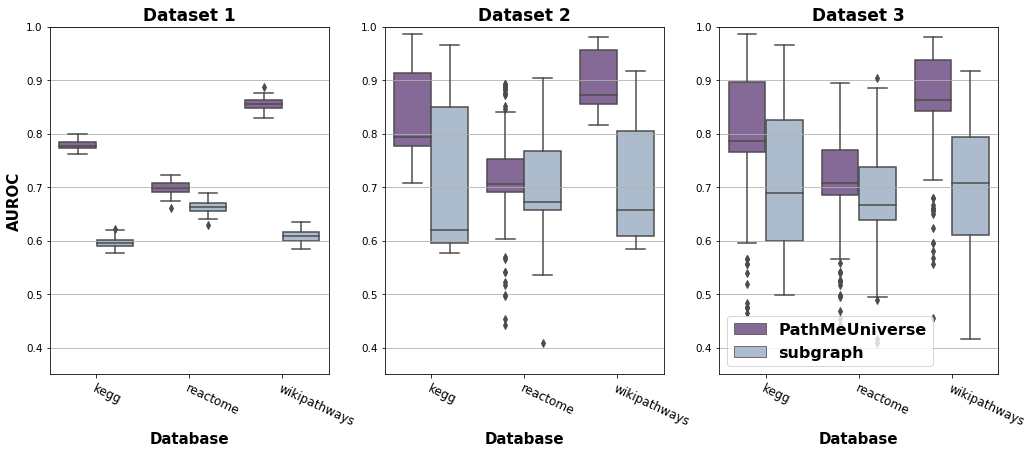

In [4]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_db['auroc']),
                 color_palette = ['#87619e', '#a6bcd3'],
                 x_label='Database',
                 y_label='AUROC',
                 y_lim = [0.35, 1]
                )


##### Wilcoxon test

In [5]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_db['auroc']), True, "AUROC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUROC,p_value,Significant difference
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'reactome_on_subgraph')",6.31161e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('wikipathways_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True


### 3.2. Result metrics AUPRC

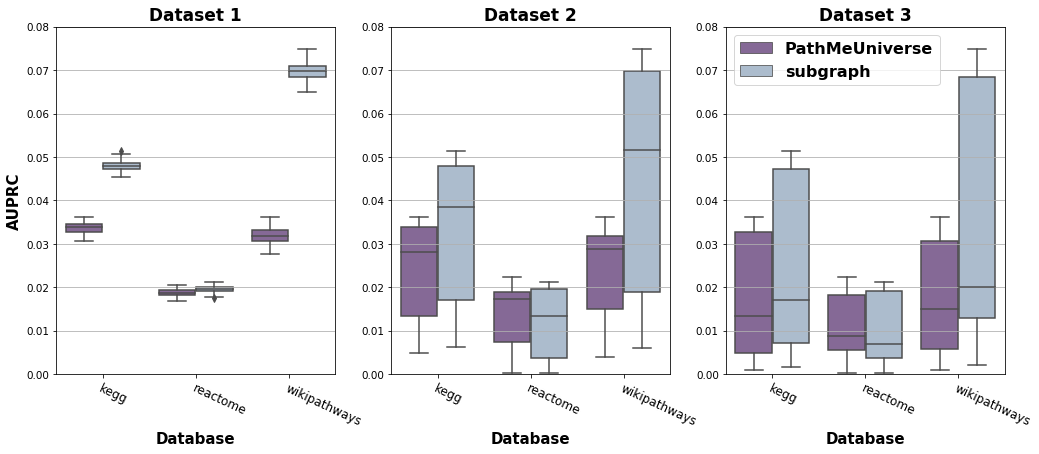

In [6]:
show_sb_box_plot(data_dict=preprocess_for_sb_boxplot(metrics_by_db['auprc']),
                 color_palette = ['#87619e', '#a6bcd3'],
                 x_label='Database',
                 y_label='AUPRC',
                 y_lim = [0, 0.08]
                )


##### Wilcoxon test

In [9]:
df_wilcoxon = get_wilcoxon_test(preprocess_for_sb_ttest(metrics_by_db['auprc']), 
                                True, 
                                "AUPRC")
df_wilcoxon.style.hide_index()

Dataset,Comparison AUPRC,p_value,Significant difference
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('kegg_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_PathMeUniverse')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'reactome_on_subgraph')",3.89656e-18,True
Dataset 1,"('reactome_on_PathMeUniverse', 'wikipathways_on_subgraph')",3.89656e-18,True
Dataset 1,"('wikipathways_on_PathMeUniverse', 'kegg_on_subgraph')",3.89656e-18,True


## 4. Evaluation stratified by entity: random cross-validation by method

In [20]:
from diffupath.views import show_sb_box_plot, preprocess_for_sb_boxplot, fdr_barchart_three_plot, preprocess_for_sb_ttest


In [21]:
metrics_by_db_entity =  {"gene_nodes": {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.6843003544918158, 0.7210007935610985, 0.7161875995909339, 0.7206804200928985, 0.7172570727683689, 0.7024650672183856, 0.6942124669126699, 0.6871594360645856, 0.6871588672396537, 0.6968396895484583, 0.7405494091829496, 0.7112839586462297, 0.7059055288678442, 0.6713332099740605, 0.7218783704479127, 0.6938964025165343, 0.7343303232799607, 0.6776771004059945, 0.6771056028775169, 0.7005120603088608, 0.6743615256081732, 0.6660978386262653, 0.6791914139224399, 0.6643675814554413, 0.7061857398421014, 0.6904008237771123, 0.6664475370925096, 0.7131096129543335, 0.6936383887871509, 0.7214092234771206, 0.648144079442692, 0.6643896626376673, 0.6808262999279255, 0.6864265217858707, 0.7097072384998604, 0.6471385879359115, 0.6794279964823391, 0.6733021968870352, 0.6944175300506904, 0.6829870787632635, 0.6408629669322985, 0.6802385687167255, 0.6989671523814027, 0.6835058810080012, 0.714029229141376, 0.6778931825751808, 0.7130498313793988, 0.701750209072172, 0.7046353327494915, 0.7041067628024149, 0.7139596686982945, 0.7085548889714746, 0.7101070648555172, 0.7196823956184535, 0.7057972232162244, 0.7084759165240346, 0.6728301756267132, 0.6879628296810966, 0.7190241140478686, 0.6911503618809036, 0.6797681648231075, 0.6591442201690649, 0.7068979560357026, 0.6708638187418516, 0.6973991419945609, 0.692993427089635, 0.7100778053797265, 0.6940119058020648, 0.7028452138668114, 0.6915088077324038, 0.7004981427202682, 0.6893991671624033, 0.6881184062256285, 0.6950379792247314, 0.7164950818719826, 0.7151038576788546, 0.7286048797612432, 0.6580029451948263, 0.7000234567966068, 0.6757263927600825, 0.6956972633991267, 0.6777805214561504, 0.7145194795693728, 0.6841577413075175, 0.6726669688412013, 0.6694912507137419, 0.720783393026897, 0.6438608099251746, 0.6939506401005521, 0.6812648952743929, 0.7140848098724096, 0.6743179019259855, 0.7105277785145578, 0.702327495192569, 0.6753225034994447, 0.6993373465308842, 0.7392130026264029, 0.6907879904774316, 0.6970730093760411, 0.7307759908735889], "reactome": [0.695267255970038, 0.6916793182215437, 0.7120057165703066, 0.679863967084324, 0.7061201917492899, 0.6990866187201971, 0.6800115765517838, 0.6569503067663522, 0.6331135906289207, 0.6428744493459184, 0.6900577319393919, 0.6881127450980392, 0.6391670664177614, 0.6706985756068717, 0.7278728808752585, 0.628794928051889, 0.6739982015966495, 0.6891533726216723, 0.6470261527766934, 0.6692450423208736, 0.7153970374544781, 0.6393201837390312, 0.6776686621690762, 0.6602340173544772, 0.689384740870564, 0.617480503810657, 0.626533582516192, 0.6850449511130752, 0.6748512646148517, 0.7130522634101102, 0.6527382105624855, 0.6984444615546757, 0.6602265341532512, 0.6441494543840385, 0.6984475149873882, 0.6906753642230155, 0.7172209237844362, 0.6518449665811398, 0.6707901511510759, 0.6829310619039662, 0.7252791516019272, 0.6955745780830688, 0.6895669083121656, 0.7142679446293936, 0.6125888591906246, 0.666147199729463, 0.7314417517548489, 0.6870000675373144, 0.6757175337278482, 0.6737191837403023, 0.7049229175893401, 0.6379965875042382, 0.6478147428547161, 0.6786129392492979, 0.6474775848582065, 0.6903481266913056, 0.6528870580906685, 0.7039924120822998, 0.666504053327222, 0.6738828350592493, 0.6985765796231178, 0.7042734090270489, 0.647821722769494, 0.7007974384750919, 0.6382212730072159, 0.6687794844323289, 0.65964654802487, 0.6553136101004806, 0.6873362986418498, 0.6543570027373545, 0.6917226484054114, 0.6738156894421743, 0.6931788649156283, 0.6578007155675097, 0.6863179397153197, 0.6995941627383531, 0.7310686750661649, 0.6797170922114486, 0.6543996879850487, 0.6679969869363269, 0.6447716328615205, 0.6476242453699494, 0.6737531717322282, 0.6837412721010983, 0.7083400287104891, 0.6733706421874632, 0.6496139945910432, 0.6621604109155379, 0.6594871536843971, 0.7075986743033574, 0.6949567939773972, 0.6570837784172243, 0.6881332036960284, 0.6805755897848742, 0.70869282715572, 0.6734483496807306, 0.6656029566283365, 0.6815569334896048, 0.6592634971622875, 0.6564233577132166], "wikipathways": [0.7585237010235377, 0.7248668171657628, 0.7428610997504026, 0.7129201719756463, 0.7182124487187417, 0.7342440855960839, 0.7287760041565798, 0.6697539038951441, 0.7310756587153514, 0.8038408494562469, 0.7385708155987081, 0.7903040170999402, 0.6800476664769494, 0.7595102185910738, 0.7619467717364177, 0.7121170647652468, 0.697236394519773, 0.7359961715227681, 0.73058711746972, 0.7588067712670454, 0.6555475083065752, 0.7315329641460568, 0.7750260873689703, 0.6451010337399622, 0.7680987095552364, 0.7428426578490112, 0.718730851365376, 0.6950017406494904, 0.6938545457920754, 0.7725516204413116, 0.7516527923816487, 0.7248267316417734, 0.7251803226653823, 0.7320270299776652, 0.7879408997363495, 0.7437312621074438, 0.7084454988204729, 0.7395336701534666, 0.7590460706769466, 0.7098583406643464, 0.6966880228101152, 0.775923819512994, 0.691989606957881, 0.7269606611021531, 0.778243938166747, 0.7418248227428479, 0.7244792500565268, 0.6481142322085374, 0.7468566182750344, 0.8104230294982453, 0.7540098921570909, 0.7651886907407395, 0.7396991622943461, 0.6944740779460543, 0.7231048207994273, 0.7742118111427274, 0.7361226409873263, 0.7625729329728191, 0.811778538780938, 0.7836409875875595, 0.7510705305765727, 0.7373567319030057, 0.6992354665943352, 0.7415882278589134, 0.7487235982849456, 0.7062896707584622, 0.7352379134628645, 0.7566445055973194, 0.8002724556577825, 0.7500821887252883, 0.7178057316317092, 0.7706616053013453, 0.7018003371268415, 0.6915099713112658, 0.7282184154508207, 0.6978523314833263, 0.7253537239118382, 0.6824114495911736, 0.6941041685723546, 0.7557382380941088, 0.7496041475125139, 0.7279370063575294, 0.724898956148021, 0.7783935514217295, 0.7703542269965235, 0.7631749683313334, 0.7750311442921725, 0.6871671965982225, 0.7873320340499583, 0.74907344084241, 0.7463370251017603, 0.772656664273885, 0.8194079151144622, 0.7495216569909227, 0.7348921498881744, 0.7693503652350198, 0.7316726247390586, 0.7211485604342747, 0.7407009929481707, 0.7341694269201383]}, "subgraph": {"kegg": [0.6658864058085382, 0.659755726771078, 0.6510570576960618, 0.6796558086076169, 0.6618260811520089, 0.6560277591412278, 0.6692920849385782, 0.671758402824163, 0.6617787761755972, 0.6566421499058744, 0.6422492694265028, 0.6865294078153376, 0.6328351671432746, 0.6370499866607047, 0.6535990215924425, 0.6657744553434753, 0.6537719217136694, 0.6481874294220306, 0.6669936839967838, 0.6440320726694505, 0.6410131434758185, 0.665959478715789, 0.6753582492976651, 0.6568272709351548, 0.6379363001745201, 0.6634516286423979, 0.6617429071297317, 0.6673209038655755, 0.6389135551056437, 0.6461257959295968, 0.6639278060160729, 0.6461767236325625, 0.6441700407177213, 0.6717417048997173, 0.6626357702434322, 0.6487884330383236, 0.669102761061759, 0.6674994841128792, 0.6353049932523617, 0.6516890950215907, 0.6701659322286468, 0.6810947115017292, 0.6749166557583884, 0.6662845657077547, 0.6657318293809671, 0.6842468349558458, 0.665904424597064, 0.6383432638302102, 0.670338580517404, 0.6884911470361816, 0.6652523465148484, 0.6571340378043169, 0.6684235980829087, 0.6830604853197824, 0.6364128688425539, 0.6532640300974053, 0.6751945115302019, 0.648198150272839, 0.6661922169686163, 0.6529218871058469, 0.6617364579971335, 0.6597873947952154, 0.659152369352761, 0.6852668690958165, 0.6668839189590017, 0.6572181360843125, 0.6530753895248098, 0.6464310183080262, 0.643818667844968, 0.6621169541114875, 0.6905133536008403, 0.6681029507753049, 0.6443205117053531, 0.6667967909009062, 0.6602583336812222, 0.6705754398150888, 0.6327454554088863, 0.6550251828733551, 0.6564618171837874, 0.6720490388563802, 0.6718013559738124, 0.6771129526898079, 0.65703412167614, 0.6714488053074632, 0.6707200432135902, 0.6554888699128611, 0.6476743913779377, 0.6640050039119387, 0.6643742702699162, 0.6577801111972171, 0.6725229878962208, 0.6726020407320743, 0.645197567806599, 0.6771392660005786, 0.6650052580533099, 0.6713130187175996, 0.6619360037782772, 0.6613510288965004, 0.6581559718047834, 0.651447337866327], "reactome": [0.5384565830668129, 0.55522170163645, 0.6159046086444354, 0.5776095334692629, 0.5862796848072316, 0.556083380466767, 0.6327664135784685, 0.5631390930820711, 0.6028392950605495, 0.5682686436666993, 0.5347521572382092, 0.5564671945784415, 0.5960251352142292, 0.5817854299178773, 0.5391139005631477, 0.5819444629877226, 0.5591411542735244, 0.595079200297985, 0.5727242866565169, 0.6067381162526794, 0.6163772048235803, 0.5856668683153945, 0.577094680196478, 0.5814644974286198, 0.6055915995133782, 0.5769121477836427, 0.5610808983301554, 0.5924851972217113, 0.5915586429950733, 0.5788660165665207, 0.569268156718498, 0.5528822636693855, 0.5859391388825981, 0.5707261663379903, 0.5791943071102099, 0.6078394715008406, 0.544877099791528, 0.5665751591257151, 0.5860489832105868, 0.5739829142261771, 0.5950801711087748, 0.5729511004285965, 0.5746111407764756, 0.5437178238512257, 0.5924546632124352, 0.6074677221784186, 0.5554786960612202, 0.5988305009574229, 0.6091610369057439, 0.5716861223413288, 0.5637400145320767, 0.5829349277900622, 0.581950327961628, 0.5483473387813241, 0.5854765352452036, 0.6042967803658359, 0.6205022869177174, 0.5613110613370705, 0.5703381264208462, 0.5866094133501614, 0.6207684927875124, 0.5104792303628274, 0.5763901010554995, 0.5727739660341806, 0.5539881018239075, 0.5367978037201061, 0.5588301928804029, 0.5702239116794806, 0.579077148109878, 0.5701810214492171, 0.5798820643580529, 0.5964616515531229, 0.5480801024242254, 0.5844938995530795, 0.5252835216061033, 0.5702964316033903, 0.5557253657676715, 0.6003964988550228, 0.5514074637298744, 0.5823076296819322, 0.5634064570794237, 0.6075408369960152, 0.5972299969582677, 0.5926413834470738, 0.5493912638371741, 0.5848298035631979, 0.5657619513127752, 0.5625260956828646, 0.5736450689063749, 0.5668019068032654, 0.5752718025084622, 0.5656780037655653, 0.579247983925205, 0.5660064770070204, 0.5696573669625664, 0.6163757599945654, 0.5483542688191457, 0.5572587175577431, 0.6128942265764888, 0.5675138672353724], "wikipathways": [0.6527925577934662, 0.6857129091821734, 0.6693894230021831, 0.684663286540123, 0.6582753623188405, 0.6603160517729733, 0.6427575553271847, 0.6373893486909666, 0.6659773370427162, 0.6782946587341662, 0.6533982264329449, 0.6945351995267292, 0.660172741406115, 0.6852957262093634, 0.6432234236995285, 0.6822529722747694, 0.7040387132049766, 0.6630510290057725, 0.6656634069526484, 0.6642727443349742, 0.6413384875573809, 0.6819309365467369, 0.6557177942705533, 0.6948689335569896, 0.6929782787933926, 0.6804738955823293, 0.714241044859396, 0.6658319558549001, 0.6853345806735636, 0.6770557909002171, 0.6642348410652062, 0.6417378384327537, 0.6683217147599126, 0.6405925560631229, 0.6557801845715694, 0.6433200304699975, 0.661188869169266, 0.6626804177446716, 0.6572119548380824, 0.6750366140525054, 0.6881300215741706, 0.6746870919114571, 0.6640605009524351, 0.6878876698576601, 0.6810905797101449, 0.6424376178697676, 0.6543365461112246, 0.7193524720639688, 0.6721893687392791, 0.6790483926441424, 0.6719506006168764, 0.6672952296439711, 0.6491953519365409, 0.6574301665871456, 0.6647457822306675, 0.6838339428489476, 0.6404717963751363, 0.6467426283044504, 0.6528729965199354, 0.6544712109109639, 0.6697694159659867, 0.6467451690821255, 0.6572190121495924, 0.6372755657086004, 0.6920907468186792, 0.6490892635449541, 0.6682564443535187, 0.6564686896718146, 0.6499113325966741, 0.6463036547557195, 0.6723269887964407, 0.6790723181156996, 0.689691586523785, 0.6619955810117959, 0.685699463984798, 0.6472838057334319, 0.6704338590418597, 0.6532896764252696, 0.6932390806588804, 0.6769527188924952, 0.6539012478929731, 0.6359392036764652, 0.6634703164199001, 0.6797929731357998, 0.6751791010948077, 0.694239405184468, 0.7069275953665416, 0.6914235274699251, 0.6843645995278401, 0.6843190903875802, 0.655475531944026, 0.6719052224371374, 0.6707987871957928, 0.7046006794495306, 0.6847077658508788, 0.678522351424862, 0.6696047653545842, 0.6836370584603974, 0.6939468599033818, 0.6838057170542636]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.9794035681065664, 0.9543055917082752, 0.936346740885419, 0.9826582230093909, 0.9212493651784691, 0.9219683745110282, 0.9861240300200048, 0.9461543922368836, 0.9200579940185705, 0.9330629615539339, 0.9788756878370926, 0.9596744981041817, 0.9342625239593932, 0.9336217865288595, 0.9724710439469425, 0.9608513070497501, 0.968563819814441, 0.9798349737061017, 0.9240207365932064, 0.9396159580025739, 0.9765029570396475, 0.9231260705502878, 0.9320326848900644, 0.9272207831922923, 0.9773157106269579, 0.9283957718610694, 0.9481193810330799, 0.9455992078155405, 0.9859401820640846, 0.964329855997903, 0.9816224855151474, 0.9375535843980437, 0.9428269262624076, 0.9340550124051863, 0.9320326848900644, 0.9442167075925565, 0.9228794230450683, 0.9417875482145815, 0.9793899160306316, 0.9571233801811904, 0.9484697843154031, 0.9413725251061676, 0.9434794954920847, 0.9411631932751695, 0.9751404798613678, 0.939280116934581, 0.9367754160697676, 0.9791287063110817, 0.9574128041910053, 0.9300968205225286, 0.9785061716484609, 0.9196839271379607, 0.9354994020390741, 0.968041400375341, 0.9608695098176628, 0.9459414198523028, 0.9708409860803434, 0.9804138217257315, 0.9208525448379681, 0.9273600343668258, 0.9254460133207856, 0.9826063451208391, 0.9907484432082743, 0.943038078370197, 0.9883101824463428, 0.9043863209839689, 0.9360664182595606, 0.9381560960159603, 0.9326752425973894, 0.9372696212186026, 0.9882583045577911, 0.9759450422031174, 0.923051439201845, 0.9221076256855618, 0.9344481921921047, 0.9874719449839543, 0.9640404319880881, 0.9782240287458112, 0.9315521318171641, 0.9310178805789209, 0.9444806477272935, 0.9584339794709184, 0.9386857965622253, 0.929566209837868, 0.9429361428698847, 0.9374571097281054, 0.9532907873971316, 0.9631321138692349, 0.9160561154929219, 0.8776610171342655, 0.9327152886867978, 0.9681196722773665, 0.9253149533918128, 0.9241172112631447, 0.9236175452839359, 0.9821449049542473, 0.9448201293488687, 0.976818775062936, 0.9835428775299573, 0.9643653513953332], "reactome": [0.9470366952942012, 0.7684103437670051, 0.7105259422244304, 0.7838408214446259, 0.8372725767146947, 0.7228144888447252, 0.7933328601509453, 0.8816807438427142, 0.42401873802257084, 0.6692502425059739, 0.7862445879764355, 0.7314642629001349, 0.7154754300044952, 0.8345139233917713, 0.8283294295786311, 0.8908178957579199, 0.8541699197955852, 0.5979179974921334, 0.7329453237750492, 0.785156268483687, 0.6794851775616912, 0.7085858944330093, 0.7681926798684553, 0.7554971963943502, 0.8345139233917713, 0.7475051458584712, 0.8001230274209195, 0.6620247474389004, 0.7001963706910829, 0.8440343530413799, 0.7293491376250976, 0.879116095298933, 0.6511178933920079, 0.7933328601509453, 0.8211891073414248, 0.5928028958762155, 0.8089857335509972, 0.7296709016490406, 0.7767099628551825, 0.6778148437315163, 0.9128776586935434, 0.7491186978020677, 0.7764213215984102, 0.7984432299429816, 0.7838408214446259, 0.6543686563986089, 0.591733503678993, 0.8908178957579199, 0.7025244280407883, 0.6484680720183595, 0.5974353514562187, 0.7397260273972603, 0.8850450706224714, 0.809818534554144, 0.82014337426361, 0.6532046277237561, 0.7023588142049353, 0.5792888068706084, 0.7770601178224146, 0.7484278515153666, 0.7269406392694064, 0.7462180897626991, 0.5979179974921334, 0.7491186978020677, 0.8509617432039179, 0.7790001656138359, 0.7285305320935954, 0.7462180897626991, 0.7748692833652732, 0.5946057207750728, 0.9106442378214683, 0.7508978635815176, 0.8500011829559704, 0.7684103437670051, 0.6656966427709561, 0.7576170534932689, 0.5917902855655712, 0.5770932405895852, 0.7120259303948707, 0.7489483521423332, 0.6108548039841957, 0.809818534554144, 0.5810443135306504, 0.6580878699694797, 0.7974353514562188, 0.77048761445099, 0.6511178933920079, 0.8211891073414248, 0.5921688314760924, 0.7482338467362245, 0.7790001656138359, 0.591733503678993, 0.792495327323917, 0.717107909243618, 0.6737785979605839, 0.8930939030449286, 0.6575247829275794, 0.5810443135306504, 0.82389097877777, 0.9561217971467102], "wikipathways": [0.9895424218047603, 0.9879927128188142, 0.9744475464912696, 0.9928942096878499, 0.9748458177573779, 0.9729767031025726, 0.9856109717818893, 0.9283387750595435, 0.9771526364769161, 0.949384059685484, 0.9891362639789271, 0.9441079512295146, 0.9472822915187937, 0.9765650877774097, 0.9891796400574142, 0.9880045426584015, 0.9579212605877064, 0.9315525481474471, 0.9468012113755737, 0.9639623653369926, 0.9787890976198362, 0.9887931986308933, 0.9739664663480496, 0.9402198772851307, 0.9889390999858042, 0.9479092730169245, 0.9907766684017099, 0.9770619410400795, 0.973883657470938, 0.9734774996451049, 0.9790848436095206, 0.9879927128188142, 0.989849997634032, 0.9617344122147038, 0.9827520938816069, 0.9938287670152526, 0.9784381457120774, 0.9414935566807048, 0.9380076972822915, 0.986726919982965, 0.9490370510575876, 0.9626177069038944, 0.9495930535181943, 0.9813758892096089, 0.9394548809918137, 0.9900077288285305, 0.9721801605703561, 0.9747984983990283, 0.9868846511774634, 0.9596957365258126, 0.9872671493241219, 0.928626634489503, 0.9434415369327592, 0.9739664663480496, 0.9777953910944968, 0.9906544267259736, 0.9598100916418241, 0.9907766684017099, 0.9506932285998202, 0.961324311109008, 0.9762141358696509, 0.9843767251849398, 0.9387450906165712, 0.9868688780580135, 0.9594473098944779, 0.9401843877663686, 0.9907963848010221, 0.9766912727330085, 0.9341708859761195, 0.9370967996340637, 0.9590766415874068, 0.9890652849414029, 0.951509487531349, 0.9709380274136816, 0.9767504219309453, 0.9723930976829288, 0.9767977412892948, 0.9949841480149529, 0.939861038817647, 0.9875944415527058, 0.9704648338301867, 0.9789428855344722, 0.9412017539708828, 0.9359335320746384, 0.9787417782614868, 0.9633432703985868, 0.9747354059212291, 0.9833159829019386, 0.9881110112146879, 0.9729214971844982, 0.9274160475717284, 0.9491119733749743, 0.9794791715957665, 0.9870818151705864, 0.9608826637644127, 0.9721801605703561, 0.9788640199372229, 0.9941915487625987, 0.9495891102383319, 0.9783316771557912]}, "subgraph": {"kegg": [0.9651183096132018, 0.8874530690648739, 0.8644925638115196, 0.9202741639745045, 0.9303501266043831, 0.8809103873803079, 0.9135277510986932, 0.872670915917227, 0.723525131697663, 0.8828836694897989, 0.8649145784219565, 0.8157455106376786, 0.9573794347914666, 0.8997526121249163, 0.8857271748304666, 0.9617945807503129, 0.971148752874065, 0.8963648534590646, 0.9683227102069326, 0.9003870892633661, 0.9432841468028755, 0.9169213306557235, 0.8774178526732443, 0.8918565732413635, 0.9573386885532176, 0.8924328414680288, 0.971559125702145, 0.8899153060333538, 0.9031723856922496, 0.9630926394831049, 0.8551063767862859, 0.9740271835618034, 0.9055647719665881, 0.8891993364184057, 0.9012340289298292, 0.8609010739544225, 0.8242032655199512, 0.82853400855671, 0.8876422480281732, 0.8282487848889666, 0.9788614336854973, 0.9560289880380687, 0.9740126313338572, 0.9116621554760034, 0.9538752583020461, 0.8716697226345353, 0.9588899560522717, 0.9087633516691407, 0.9023894758287494, 0.8846503099624553, 0.9656421898192613, 0.8877295613958498, 0.8859687418143718, 0.8945079891731424, 0.8671090543962281, 0.8957100032014902, 0.9089554410780291, 0.8834221019238045, 0.9644751011379843, 0.822029162664804, 0.9002444774294945, 0.8709741261387118, 0.9785645682353968, 0.7916528420501179, 0.8869379201955819, 0.885203294624407, 0.8322913938123927, 0.965319130358858, 0.8810355365406444, 0.6958846299368434, 0.8901423207893129, 0.8519077970837335, 0.8517360807939696, 0.8718006926860502, 0.9645158473762333, 0.8374719869612038, 0.9626095055152945, 0.8826275502779476, 0.9783433743706161, 0.9685613667452487, 0.9377950464216072, 0.8986786577024943, 0.944058325329608, 0.955755406152682, 0.8834919526179459, 0.8776797927762742, 0.8907971710468874, 0.8997555225705056, 0.9359498239180419, 0.8969585843592655, 0.9487412322826625, 0.8876538898105301, 0.9040193253587124, 0.9029890276201287, 0.9080357402718356, 0.9572601065223085, 0.9420559387642248, 0.8616752524811548, 0.840149596903286, 0.8445531010797753], "reactome": [0.5878122046712569, 0.5143647900634535, 0.6027676522208721, 0.43627649520723644, 0.62813554745511, 0.43607398406912384, 0.4370055353044418, 0.44805589307411914, 0.7994734710409073, 0.5742135817469961, 0.37762926960982857, 0.7616578911840151, 0.5742135817469961, 0.42203321182665055, 0.7219387066288646, 0.5729242608343459, 0.43556770622384233, 0.3000438774132578, 0.4148373160523829, 0.5592007560415824, 0.5860874848116646, 0.6183913865262589, 0.6211320372620495, 0.7136560010800594, 0.4513298231402727, 0.5240313217226947, 0.2363439989199406, 0.6048872687997839, 0.4204434993924666, 0.693600648035642, 0.6527710274065073, 0.662251923855812, 0.4204434993924666, 0.41134737410557587, 0.3852639395166735, 0.6296813824760362, 0.613696503307682, 0.43273592547590123, 0.5742135817469961, 0.4367625219387067, 0.736735520453625, 0.6253746456055084, 0.693600648035642, 0.7832422033211828, 0.566815174834616, 0.6296813824760362, 0.43627649520723644, 0.43273592547590123, 0.6826346699068448, 0.5661806399351965, 0.6209666531659241, 0.620143107870933, 0.566815174834616, 0.6358039692183071, 0.4388011340623734, 0.4182766302146619, 0.62813554745511, 0.4617861482381531, 0.6399081949507224, 0.4174362089914946, 0.37795666261644395, 0.3931044957472661, 0.5678142297826381, 0.2607195895774268, 0.6296813824760362, 0.6253746456055084, 0.6322532739300661, 0.5095990279465371, 0.5726306196840827, 0.5081848251653842, 0.5897461860402322, 0.5316929931146213, 0.6027676522208721, 0.3000438774132578, 0.43627649520723644, 0.5928716079384366, 0.6746996084784663, 0.5899554475496152, 0.5856453354934521, 0.7136560010800594, 0.4513298231402727, 0.42135142432833805, 0.5095990279465371, 0.6013568246253544, 0.5899554475496152, 0.5083063318482517, 0.31527946537059537, 0.5856453354934521, 0.6183913865262589, 0.40691238018091, 0.4255096530309167, 0.49236870527879034, 0.40683812609693537, 0.7511543134872418, 0.6048872687997839, 0.38628999594977725, 0.4367625219387067, 0.4493722154718509, 0.6013568246253544, 0.7372620494127178], "wikipathways": [0.6860927413005826, 0.6975673122342938, 0.5762281530467643, 0.9585301527318533, 0.8237482286254134, 0.8235710911667455, 0.7023697055581797, 0.5880176350181073, 0.9455597543693907, 0.6849315068493151, 0.9701621791843804, 0.5685718784443394, 0.716225791213982, 0.7070540072429539, 0.8301251771374587, 0.7083530152731853, 0.5766217918438041, 0.9290859707132735, 0.8235710911667455, 0.8315816406865061, 0.5563100299165487, 0.6687332703511257, 0.8333136513934813, 0.6954416627302786, 0.5447370492835775, 0.6697173673437254, 0.6831404503227838, 0.6983939537080774, 0.8234136356479296, 0.8147732640529052, 0.8216816249409542, 0.5693788379782712, 0.8114076523382145, 0.7080381042355535, 0.8429971658006613, 0.8353015273185325, 0.6789875610140135, 0.6966225791213981, 0.7062076838293181, 0.6917611399779562, 0.5569792158715163, 0.8201857975122029, 0.5560935285781766, 0.819890568414423, 0.4286136041568257, 0.5867776728074319, 0.8188277436624154, 0.6976263580538498, 0.5894347346874508, 0.7068178239647299, 0.5686899700834515, 0.8338450637694852, 0.5544402456306095, 0.5525507794048181, 0.5616044717367343, 0.8061919382774365, 0.43030625098409697, 0.6797748386080932, 0.6937883797827114, 0.7065619587466541, 0.6852267359470949, 0.94713430955755, 0.5693394740985671, 0.8238466383246734, 0.8166430483388443, 0.7054007242953866, 0.5514289088332546, 0.5686899700834515, 0.6952054794520548, 0.6687332703511257, 0.69703589985829, 0.6807982994803967, 0.673260116517084, 0.8099118249094631, 0.7064241851676901, 0.5777633443552197, 0.5460163753739569, 0.6985120453471894, 0.6991418674224531, 0.6859352857817667, 0.6918989135569201, 0.44622894032435834, 0.5686702881435994, 0.829672492520863, 0.7011297433475043, 0.6845181861124232, 0.9700244056054166, 0.8147339001732012, 0.6701897339001732, 0.834396158085341, 0.6846953235710911, 0.7023697055581797, 0.6690088175090537, 0.6936702881435994, 0.4393008974964572, 0.6598763974177295, 0.5885096835144071, 0.5871122657849157, 0.6845181861124232, 0.5476106125019682]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.8664071742936917, 0.8066489991008471, 0.9494321139557995, 0.6304694524632057, 0.8828545738488477, 0.9762883914627798, 0.9475651885854905, 0.7765463063745208, 0.8925961856987366, 0.8515261937437888, 0.8785433722966258, 0.82546732289054, 0.8035729496947612, 0.7768539113151295, 0.8877525909800768, 0.9636955184326346, 0.8640788415124699, 0.8593464578107994, 0.9389309545217925, 0.9560976763996024, 0.8261842790213431, 0.8022715441768018, 0.8723226539207799, 0.8716175287492309, 0.7227935260990961, 0.955603142302778, 0.9193388859968766, 0.826215039515404, 0.9235530736832143, 0.8794922152288108, 0.8048341299512565, 0.6319767166721878, 0.9795821305191424, 0.7450925181013677, 0.9106265676021013, 0.8642563059012824, 0.7812952534191472, 0.8058705219819222, 0.7568761535185273, 0.8046188064928304, 0.8677298755383087, 0.8811935071695614, 0.9429511144763617, 0.8688869433533672, 0.7786214566277033, 0.780362973829918, 0.8708863754673228, 0.9554446074487719, 0.9698334200937012, 0.6837584591358667, 0.8893000804505229, 0.741237991576357, 0.9527400501632672, 0.8561994226491885, 0.8070133926458758, 0.7502176896502769, 0.7208721783162177, 0.7984288486110455, 0.9444607448771947, 0.8093062325493352, 0.8717263735743694, 0.7277767261369551, 0.6965571908570347, 0.8576711939804079, 0.879416497089584, 0.8684657612039185, 0.780897733188207, 0.641741990440585, 0.8947375893237426, 0.8636884198570821, 0.7202569684350006, 0.889070559840992, 0.8078013345322039, 0.9324783493445649, 0.8069045478207373, 0.7215110501159434, 0.7858762008423643, 0.8862311296199896, 0.86014149827268, 0.852730585395864, 0.8691117315791965, 0.8608915810893947, 0.954367990156642, 0.8922033978514978, 0.8633926458757276, 0.7420756234915528, 0.9423832284321613, 0.8652666698215892, 0.8581467985424258, 0.8618001987601156, 0.7255714353319767, 0.800402252614642, 0.880019876011547, 0.8012682788320478, 0.7935544933983247, 0.7913563011688987, 0.8033244995504236, 0.8816265202782643, 0.8904879087596422, 0.8727343713028253], "reactome": [0.8829705000788769, 0.8739302334753116, 0.8695614450228744, 0.8147381290424357, 0.835420610506389, 0.9318307303991166, 0.8150122259031394, 0.8752149392648683, 0.9398919387916075, 0.7260155387285061, 0.8685459062943681, 0.7545856996371667, 0.8691601593311248, 0.7642717699952675, 0.9263823158226849, 0.9379762186464742, 0.8802117841930903, 0.9212060261870958, 0.7842197113109324, 0.8100883420097807, 0.883312628174791, 0.8349404480201925, 0.9300481148446127, 0.7973517116264395, 0.7728269443129832, 0.8538176368512382, 0.8503815664931378, 0.9023909528316769, 0.7985752879002997, 0.9728279302729137, 0.8124930982804859, 0.9273071462375768, 0.8877277567439659, 0.910118906767629, 0.771219829626124, 0.7795748540779304, 0.8701944312983121, 0.8834141820476415, 0.8850982016090866, 0.9346239548824735, 0.9601672188042277, 0.9333106562549298, 0.8121529421044329, 0.917489943208708, 0.9310705552926328, 0.920908266288058, 0.9033394462849029, 0.8778730872377346, 0.8375354945575013, 0.6623373166114529, 0.9048982489351632, 0.7354649787032654, 0.8807303991165799, 0.8823503312825367, 0.8774905347846663, 0.8628431140558448, 0.8305667297681023, 0.7726682047641584, 0.9225331282536677, 0.895311760530052, 0.9461971525477205, 0.8836517983909133, 0.8719238050165641, 0.7538649629279066, 0.7681170137245623, 0.9539684887206183, 0.8775457485407794, 0.7715777330809276, 0.8166972314245149, 0.8832367092601356, 0.7717966161855182, 0.8283976179208077, 0.7523751774727875, 0.8994281432402587, 0.9298045827417574, 0.7797158463480045, 0.8674948730083609, 0.8589860388073829, 0.8062154914024293, 0.8491284114213599, 0.9585571462375769, 0.7653159015617605, 0.9159045196403218, 0.9183753352263764, 0.8239400930746175, 0.9342680233475311, 0.8935725272124939, 0.8159824104748383, 0.8669910474838303, 0.9799465609717621, 0.8286066414260924, 0.9361945890519009, 0.8856611847294527, 0.8780180233475312, 0.8269916390597886, 0.8056564521217857, 0.9098950938633853, 0.8304119340589998, 0.9661470657832466, 0.9072793421675344], "wikipathways": [0.8778884524992507, 0.9432601460590861, 0.9256455149134845, 0.9385794728623481, 0.8899785485575482, 0.8877939715137463, 0.935499771289768, 0.9329405826590325, 0.8879162131894824, 0.9275067430085648, 0.8831606176753576, 0.903835233994227, 0.9160712314074354, 0.9229443682077004, 0.910337702487421, 0.984128298553605, 0.8693512515970283, 0.9365960030915313, 0.9569551570214041, 0.9471087872048455, 0.873692802725595, 0.9361780154261109, 0.8970961687092857, 0.9686982444518053, 0.9395968390668622, 0.8725019322071326, 0.9470062619284215, 0.8653764254956703, 0.9354721683307308, 0.8630696067761321, 0.8977152636476916, 0.919766084638559, 0.9806779286739538, 0.9763363775453872, 0.9219309452830486, 0.9374753545008596, 0.9355116011293554, 0.9788245871385984, 0.8603921197495229, 0.8928886890960426, 0.970468777110049, 0.9230587233237117, 0.8778056436221392, 0.9634733986340478, 0.9125656556097099, 0.8685547090648118, 0.9217732140885503, 0.8355849461347971, 0.9372939636271865, 0.9408034827047745, 0.8914651650656951, 0.8135656713828294, 0.8721470370195114, 0.9402474802441679, 0.9028809602675121, 0.9136342844524362, 0.8883263142951782, 0.975173109985962, 0.9167100427451537, 0.8790990394170255, 0.9354563952112809, 0.8411449707408635, 0.9345652139623654, 0.9394627675515387, 0.9368878058013533, 0.878337986403571, 0.9376804050537075, 0.8721470370195114, 0.8832276534330195, 0.9124710168930109, 0.8725886843641066, 0.8788939888641777, 0.978339563715516, 0.9134410637391757, 0.9481655862079844, 0.9425464124039812, 0.9221478256754838, 0.9339776652628591, 0.8987562895313806, 0.9274633669300778, 0.9014968690357892, 0.8996987334185083, 0.9278576949163236, 0.893271187242701, 0.8908500134071515, 0.9345652139623654, 0.8559874761431568, 0.9361780154261109, 0.9304405432262338, 0.892995157652329, 0.9869990062934746, 0.8617880408208332, 0.9541199388002966, 0.8789452515023897, 0.9000102525276424, 0.904221675420748, 0.9065403239798735, 0.8875179419233742, 0.8785036041577943, 0.9144702597832773]}, "subgraph": {"kegg": [0.694522620668785, 0.7814041458617038, 0.7233469511272507, 0.7292177333938568, 0.6881752156150702, 0.7665456196096232, 0.5432591920108942, 0.5850242094114086, 0.8126948101074294, 0.8815970646088668, 0.8082841579664095, 0.8846118928733545, 0.7926993493720684, 0.8551142381600848, 0.7161370857921017, 0.7573460432743229, 0.696466939022545, 0.8103343924950824, 0.746727946739295, 0.384241186261159, 0.6141133303071569, 0.7029580874564987, 0.7073271296716599, 0.6915720986533515, 0.8314268421848994, 0.7463761537297624, 0.6936223331820246, 0.5574292631260402, 0.6862157663791799, 0.6532531396580421, 0.7739143592071418, 0.8427598729005901, 0.6736646996519897, 0.691942805265547, 0.7555038583749433, 0.48332955061280075, 0.655795127855954, 0.8135572703888636, 0.8704229081555455, 0.672151611438947, 0.851202905129369, 0.7207179603570888, 0.8455969133000454, 0.6874716295960054, 0.7537411106067484, 0.7392457255257981, 0.7730292026025117, 0.8034347102436072, 0.7828415796640944, 0.632364956876986, 0.7952110758057196, 0.636291420789832, 0.815441065214102, 0.807807535179301, 0.7494477228022394, 0.7854819185958541, 0.7892986836132546, 0.6914813133605688, 0.7451316386745347, 0.7274020275382055, 0.8024890301104555, 0.8283477076713572, 0.870456952640339, 0.8097253744893327, 0.7993985474353155, 0.7901649266152218, 0.871323195642306, 0.7605537902859737, 0.697719019518838, 0.8343924950824633, 0.7364238160084733, 0.8497616886064459, 0.8459978816765017, 0.7891246784687547, 0.7321115146013013, 0.7023982448176729, 0.6610077167498865, 0.7626721137842337, 0.5349296413980935, 0.8625208049629294, 0.6665002269632319, 0.8052352852171282, 0.8694431835376002, 0.9337191708276592, 0.8373808443032229, 0.7003707066121955, 0.5610909366016038, 0.9322136480556816, 0.8454229081555455, 0.8035557573006505, 0.6902859736722651, 0.7466333787259798, 0.6226357996671206, 0.6317748524738992, 0.6349182932364957, 0.6022771977606295, 0.7706763504312302, 0.6655205023452867, 0.8405961567559389, 0.7190422151611439], "reactome": [0.809759123594747, 0.6296883967455522, 0.7884552625952309, 0.7743141127353341, 0.7341174054443356, 0.6230517763298561, 0.6054418036753204, 0.8356669817584371, 0.6126017014955605, 0.7153539718442996, 0.8782282839877114, 0.6812481010094189, 0.4804924434241473, 0.5713106129660264, 0.7992119892418668, 0.794487019344384, 0.8112670627820353, 0.8129663076871139, 0.7611773178938366, 0.6586093199644396, 0.8337919043921542, 0.6968789034806387, 0.7519580702879713, 0.7415347219877788, 0.6555118553278643, 0.7524264879646198, 0.8801751009981658, 0.8712343720108482, 0.8195888615059137, 0.5891822243228341, 0.8312050572229162, 0.8148512316712242, 0.73548608532235, 0.920249428896166, 0.7544619245355211, 0.7106543218212305, 0.6761883461058033, 0.6759323340422898, 0.7919367453270765, 0.8073678021223681, 0.8152872961750111, 0.5947230568403048, 0.6891943215961649, 0.8706393549621327, 0.7346631894039137, 0.5411194760473989, 0.7558517043088799, 0.6926012513644599, 0.7200114220766798, 0.7638837311366936, 0.7885931152448151, 0.6072268548214668, 0.6599034468789035, 0.564817471838673, 0.6897893386448803, 0.6863683422796889, 0.7965660623656641, 0.5602219146326368, 0.7559290705918099, 0.791784826080596, 0.6348339578902356, 0.866164770489405, 0.6137059293519238, 0.8207465424304828, 0.8350339848981017, 0.8315539088259456, 0.8776276403002374, 0.7956475135883325, 0.7535405624388103, 0.7627218302330554, 0.7050642562146224, 0.7386426296658901, 0.7205529860571891, 0.6760533067755984, 0.7531621709822985, 0.8577810787391827, 0.7295992145212293, 0.8679357550386549, 0.6664795809279452, 0.682695553830053, 0.6913436976019265, 0.7807101943441027, 0.462577225616961, 0.7841733904999831, 0.6244570293598011, 0.6433090825202841, 0.780608914846449, 0.8494409934393392, 0.7793161945916749, 0.6945157152020527, 0.8189136648548889, 0.7957094066146766, 0.6140097678448848, 0.5989050560975884, 0.8036457805835949, 0.8737705794312594, 0.7519693235654884, 0.8059442625164579, 0.8386589469182899, 0.7177481066360578], "wikipathways": [0.8138482128798614, 0.7124271768225476, 0.8328609667768856, 0.8002479924421351, 0.7205361360415683, 0.8283341206109274, 0.7392733427806645, 0.8115651078570304, 0.6935325145646356, 0.7844433947409857, 0.8369548102660999, 0.8351047079200125, 0.8326838293182176, 0.7357699574870098, 0.559852779089907, 0.7016808376633601, 0.7807038261691073, 0.7871201385608566, 0.8141631239174933, 0.6285230672335066, 0.5658557707447647, 0.7230947882223272, 0.6330892772791686, 0.576838293182176, 0.6957762557077625, 0.920563690757361, 0.7938119981105338, 0.6879822075263737, 0.5748897811368289, 0.6762320894347347, 0.7064045032278381, 0.692371280113368, 0.6233467170524327, 0.7345299952763344, 0.8083372697213037, 0.6453904896866635, 0.5872697213037317, 0.8348488427019367, 0.6720004723665564, 0.9531963470319635, 0.6937883797827115, 0.954672492520863, 0.7843449850417258, 0.9240473941111635, 0.9446150212564951, 0.8426625728231775, 0.6808376633601008, 0.7621634388285309, 0.8033183750590458, 0.8351047079200125, 0.461502125649504, 0.7168162494095418, 0.6760746339159187, 0.8262084711069123, 0.7064045032278381, 0.9360140135411745, 0.5783931664304833, 0.6915446386395843, 0.7928672649976382, 0.9161155723508109, 0.5996890253503385, 0.6952448433317587, 0.8004251299008032, 0.8130215714060778, 0.9517792473626201, 0.5811289560699102, 0.8308730908518344, 0.576838293182176, 0.6879822075263737, 0.9224531569831522, 0.951838293182176, 0.47632262635805384, 0.7971579278853724, 0.8665367658636435, 0.7116792631081719, 0.7548417572035899, 0.639348134152102, 0.8083372697213037, 0.9538261691072272, 0.8172728704141081, 0.6233467170524327, 0.5707959376476146, 0.7159896079357582, 0.6710163753739569, 0.8511258069595339, 0.7895606991025037, 0.6771768225476303, 0.6720004723665564, 0.7041804440245631, 0.8284915761297433, 0.7061683199496143, 0.7144347346874508, 0.5908124704770903, 0.6183671862698787, 0.9331994961423398, 0.6932176035270036, 0.8314045032278382, 0.7906628877342151, 0.6983545898283734, 0.6748740355849472]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.015460137620302242, 0.016176984620162177, 0.016071535645086746, 0.015925819092169367, 0.017620248796177095, 0.015165719111958563, 0.015377957853342866, 0.016233287575433866, 0.014818136544820764, 0.017258123878764103, 0.017066311383821725, 0.0160840173854, 0.014180222990741516, 0.013288914553635086, 0.017524941472875706, 0.016424336694429748, 0.017110892523973076, 0.012997122189233143, 0.013382235671022022, 0.01694786592980039, 0.016613751783238595, 0.013742069296253202, 0.0132124502934554, 0.015187026638679851, 0.01486529014282867, 0.015160544461258786, 0.014868549627794951, 0.01660320103486765, 0.014342432417187911, 0.01744748596688374, 0.014257232385389212, 0.013317054088368576, 0.015728150208613782, 0.015570536353610751, 0.015899358972774103, 0.014816126896050342, 0.01682815121064534, 0.01657639906623979, 0.013480945052936863, 0.016374648133573783, 0.013583947506463436, 0.013732512135621874, 0.01604253863575031, 0.016386525047102682, 0.015904691939386564, 0.015020940737733853, 0.016722653569784203, 0.016157934275327315, 0.014845410825963625, 0.016270183550906925, 0.016054038712542393, 0.017323497433133286, 0.015887365933543778, 0.017221348597481034, 0.016279104293949187, 0.016887606556411146, 0.013416099398634026, 0.01711407404835593, 0.01665332630212696, 0.0161471694834444, 0.0149531898288707, 0.012788958654904726, 0.01626489446025074, 0.01611767673182579, 0.017067320799573484, 0.015845473598820513, 0.01776945970542897, 0.01526103313001605, 0.017459507900879984, 0.01492045852159279, 0.01688312561748994, 0.016276659857752042, 0.01683241414301395, 0.016055601339769472, 0.015311783942473513, 0.015519822169998674, 0.016846709321461872, 0.013779008629988312, 0.015709959910932894, 0.01537184632801433, 0.01518878689796067, 0.014636295453883808, 0.014673365387756716, 0.014858486611966419, 0.016526913869584676, 0.014806078626610097, 0.015898978360240477, 0.013210978641631291, 0.014695737270471524, 0.015623366204726877, 0.01549849752775416, 0.015117405659728063, 0.016931726957580273, 0.016773189585398657, 0.016105838318558385, 0.015935663608659598, 0.018440011969259016, 0.014961552518270298, 0.018231244536514857, 0.01723518692672399], "reactome": [0.009590702939166888, 0.010571268377665534, 0.010519708964282795, 0.010832297496918546, 0.010829796908075338, 0.011749350512513135, 0.00960491850950995, 0.010926204995563377, 0.011072793161568027, 0.010015789674101001, 0.010982675101065946, 0.011220901239157057, 0.009614973287235592, 0.010225766896566027, 0.012131488745559652, 0.009541406524821813, 0.010057613928446906, 0.010230789053890361, 0.009246008441881632, 0.009709741876463162, 0.012357736624356706, 0.010460939367786061, 0.009781872730231433, 0.00957593292205935, 0.010549964398255176, 0.007758071365396339, 0.009296595508569701, 0.009956809180714114, 0.010547115527660737, 0.012069023029965681, 0.009887051913457016, 0.009908798327433896, 0.010751718108584303, 0.010388444463259795, 0.0109824352505642, 0.010774932574128435, 0.010451304236221903, 0.009813618541376586, 0.009425685530823463, 0.00995442191272055, 0.011461136135565403, 0.010997706762673781, 0.011035815536590766, 0.009831464664096033, 0.008945499399632226, 0.009454061713249674, 0.01285956503987237, 0.01093415865750841, 0.011216720798466352, 0.009877679255637987, 0.01313850427113403, 0.00831053173838676, 0.010470659845632491, 0.011108847600068672, 0.010467477311112321, 0.010992155050797616, 0.00910685106743419, 0.010928272662825757, 0.011404790527825382, 0.009788438874771472, 0.011442209747404413, 0.012036986737824273, 0.010189485029426227, 0.011069334895625421, 0.008838370086377027, 0.009577803774290858, 0.00983118092876508, 0.009177949506274388, 0.010999802406426498, 0.010664007304335553, 0.011295331192419081, 0.010400169568642823, 0.010480406576493708, 0.010182654778046425, 0.010055420745967483, 0.011532098585760906, 0.011946176718719434, 0.010782308088937397, 0.009270559642731052, 0.009849811282802134, 0.008907516744052777, 0.009053326035308257, 0.010568000767706413, 0.010737339128417685, 0.010767278725587068, 0.010486012998655005, 0.009379141596993166, 0.009573892780702954, 0.0098290004088184, 0.010633508935308497, 0.011772091703340159, 0.010449021552689675, 0.011066972527336398, 0.0107486025770078, 0.011793514373286698, 0.010122719755203357, 0.01134474090785218, 0.01039779068934829, 0.010260910026388063, 0.009695605909718862], "wikipathways": [0.011813284307544927, 0.009923726524778798, 0.012015685978593232, 0.011258953859629049, 0.010058008287075114, 0.012229820480680977, 0.011899457663439776, 0.01189864167637324, 0.010448113244227888, 0.013359475159408735, 0.010234988741054472, 0.012378379172294934, 0.010286760340205588, 0.01241794385285111, 0.011527199820559261, 0.010473998795612775, 0.010718998276200018, 0.011573565085213873, 0.010571319525611092, 0.011913017766742893, 0.0087482469682919, 0.010537544696656886, 0.011263702061821531, 0.009050069629670145, 0.010286867500000641, 0.012633869169002901, 0.010433276047783768, 0.01083536824865977, 0.009990292900293121, 0.012714142478194815, 0.010823953791955067, 0.008801817636333205, 0.0103850344941787, 0.011599809324744949, 0.012926361098322237, 0.011130920448447774, 0.012249179357669605, 0.011950020723632318, 0.012032099716472539, 0.009879136887046249, 0.010345857099070195, 0.014906305847406506, 0.010334657434688843, 0.010954671545060898, 0.01095645232026482, 0.013430916728451332, 0.009590254027192251, 0.00918513703620065, 0.011771540384084091, 0.013142803953288932, 0.010979837125401843, 0.012521164711478539, 0.011604678099942443, 0.012083821759611837, 0.011439082494309461, 0.01299351029422921, 0.0112329452279967, 0.012204279473066171, 0.014137394222851988, 0.011565411576230438, 0.011507051829087896, 0.009963527554369215, 0.009799161989219811, 0.011457251359311268, 0.011264539218757936, 0.010020895437416955, 0.01219905144470406, 0.012479903996538269, 0.013091278278892294, 0.013072176289108447, 0.010702131669579366, 0.012634198766210065, 0.009889257736844381, 0.009847852044121329, 0.012920357343221407, 0.010671166063656071, 0.011527180752161227, 0.009991435080524521, 0.009795927753566752, 0.011946241507477164, 0.011007424394794173, 0.009867986089862326, 0.011187764768388564, 0.012505685809974122, 0.013286184618705392, 0.011168805071552813, 0.011536004766899264, 0.008971512180789046, 0.011618412400573907, 0.011827904536250707, 0.013101075904681792, 0.013323471631947631, 0.011939163593226866, 0.012447004442730072, 0.009715911030404556, 0.012214274315402571, 0.009294580693525081, 0.010831042545035995, 0.011633762759073631, 0.010956073341341195]}, "subgraph": {"kegg": [0.03001431923864924, 0.02801614084003631, 0.028326372469893838, 0.02936389933642366, 0.027715136435734915, 0.02600948918864298, 0.028650836688533875, 0.028247204781343592, 0.029307292597392072, 0.027912750008177, 0.02539136448424914, 0.031376113071584597, 0.025810582210864155, 0.026553690436930816, 0.026472082529064238, 0.02881387497373992, 0.030135242296180555, 0.0280327552819747, 0.027889353002128123, 0.0266778090198223, 0.027368630067418423, 0.02713225598502188, 0.027486049770457818, 0.028765635350068305, 0.026129615249656082, 0.02825202731143031, 0.02870390270992531, 0.026901564039150373, 0.02673619738656863, 0.025209740506733722, 0.025774704852073116, 0.027374938049081088, 0.027267034093661383, 0.02969894796587909, 0.02820964102265605, 0.026246578959102373, 0.027870013576751344, 0.026829483275213006, 0.025001431837817185, 0.02842280737975132, 0.029636231590838016, 0.03167892513246002, 0.02806383652345104, 0.027428757185258477, 0.027999808089820055, 0.0298409354793769, 0.028358828883315076, 0.027343097135524352, 0.02795604975710314, 0.0309706263176261, 0.02824195755884687, 0.02694777437948086, 0.03133672549984186, 0.030127468687050962, 0.024538501694403615, 0.029021781806543, 0.028248347179875902, 0.027567955726976016, 0.02731137054244552, 0.02691473148371077, 0.02787858087129507, 0.02736827994182752, 0.02740086742436457, 0.029338073886151922, 0.027209759028096022, 0.028020236597537638, 0.026618237279897223, 0.027649617767046948, 0.02854854492746324, 0.028889271667436385, 0.030919761004792115, 0.027235377483855006, 0.02885832621180958, 0.03103110928965576, 0.028721154980968354, 0.02923583907869602, 0.02552303164920397, 0.028294634861091905, 0.026615048620538526, 0.03067101930147155, 0.03104641851981078, 0.030126400863915857, 0.03238518092685442, 0.030587329067237948, 0.029710847892744578, 0.02841318601702185, 0.026719960170004643, 0.026060135388279077, 0.028386960599208803, 0.029980510306731746, 0.02832646956761815, 0.029527982954950075, 0.026661391234547565, 0.03052549411800486, 0.02968533559455536, 0.028832396688575207, 0.028136915029455478, 0.028010099242443846, 0.02987610457478546, 0.027540506977301746], "reactome": [0.008264275593270292, 0.008000078046117468, 0.010793088532367667, 0.009941352081205205, 0.010276464803587123, 0.008608167398149989, 0.011649877379790556, 0.009080355378272125, 0.010860305304244222, 0.009461339771840072, 0.007928164922036466, 0.009256376838964792, 0.01009817120144104, 0.008730593850136676, 0.009499903213850622, 0.009341504456555405, 0.009152979429696489, 0.009252759152621111, 0.009179030221534946, 0.010380828268003003, 0.010103366392233578, 0.009610608852236507, 0.009938774097133637, 0.009539395311875944, 0.009551233467297505, 0.010402275276594685, 0.008503992941533424, 0.009878245940185512, 0.01011443606577677, 0.009139546308801304, 0.009305437074487647, 0.010182158604536227, 0.009657825995350401, 0.008272801381209546, 0.009329470472828486, 0.010976714848933007, 0.008093485407936012, 0.010350418338662293, 0.009825865201320548, 0.010529268953141085, 0.011118253630358031, 0.009136121210026334, 0.00921735499404863, 0.009050777607032972, 0.010875600517131136, 0.011040176788511399, 0.007923828874139156, 0.01056603065058062, 0.011671156024073747, 0.009450556607780311, 0.010633779987407135, 0.00908181487357704, 0.010198766372310411, 0.008701604604368078, 0.009630375590990189, 0.010309528859568243, 0.010981074648924815, 0.00964588167368435, 0.00988735372496337, 0.009918833501574036, 0.010091834047201768, 0.007526453731679898, 0.010373065130911636, 0.009185483001037682, 0.010421779320912344, 0.00822255567071668, 0.008972885580198198, 0.009029528701619386, 0.008149585305591811, 0.00972334775641817, 0.008339086462755675, 0.009569415196574154, 0.00917710485242486, 0.010389856181582169, 0.007612781276677956, 0.0103220177513362, 0.009200007487720598, 0.009580420752897011, 0.008393886250099385, 0.008903330222378915, 0.009177698860153363, 0.010476552067993214, 0.01038318060949226, 0.009906834974062199, 0.008091640883196614, 0.00933339303116937, 0.00915556006289996, 0.009999401912241924, 0.009676936979709734, 0.009392848225367737, 0.009705300084758558, 0.007988400249871616, 0.010825326752085971, 0.00914178501067552, 0.009925280558398303, 0.011174916170304468, 0.009348528931953905, 0.008934626065230548, 0.010982194764934127, 0.009335120438102005], "wikipathways": [0.0422928929681403, 0.04305261230220555, 0.044893361249369636, 0.048220633404003316, 0.039285736945545116, 0.04418047289376478, 0.043467291809437696, 0.03685122997719638, 0.04089833296778979, 0.039369178543911726, 0.04208241762271768, 0.045903862571908434, 0.04052472119672074, 0.04003041787727387, 0.041410062482450063, 0.04527697897707992, 0.047574390353747165, 0.04392277530208048, 0.040122676186371935, 0.04063172770268263, 0.03783018165520197, 0.04553262539911604, 0.041809289268261336, 0.04227247033608985, 0.04697377361235659, 0.03647339080079638, 0.047818380592773324, 0.04563274154881737, 0.047479281331995735, 0.04274134309656093, 0.04250806471194252, 0.04030214812425578, 0.04224029005081544, 0.04077195896566607, 0.039655222934071845, 0.0408463189507393, 0.04207522051082781, 0.040292173543997944, 0.04319316506946112, 0.04547328232749939, 0.04365558883210316, 0.04574332386780227, 0.038775269389504485, 0.043223659176686025, 0.04025091669694217, 0.03836318821813049, 0.03945941572178577, 0.041668662547235384, 0.04546573446732033, 0.04154075270953248, 0.03991533554902975, 0.04222322278959581, 0.039589963312079576, 0.044589872017239046, 0.04092670848971132, 0.0468542922764616, 0.041978787439511146, 0.03339154183369001, 0.043558905109352175, 0.03614262595340556, 0.04019785994202951, 0.037451763423254604, 0.04196003240335368, 0.04176392928204465, 0.04572891087685766, 0.03807698497748702, 0.043631180689671104, 0.037884369093171374, 0.03725793215371101, 0.03764373056862574, 0.042841871372489695, 0.03615938669395469, 0.04542939535085751, 0.04319906846158849, 0.043263959414631015, 0.047185505091571024, 0.04062861528753963, 0.044198996785643166, 0.04683341140674533, 0.042496978424998735, 0.04424889311572177, 0.036146057910186206, 0.04165948575846874, 0.04250375194974469, 0.0391949801343717, 0.047259815879469196, 0.04669506569040923, 0.044202605365278695, 0.04620870894990347, 0.04645407969179903, 0.04132790881641073, 0.04330612266325547, 0.04185304208476131, 0.04637389197231123, 0.04424179633650956, 0.04189528070244772, 0.04038423465858135, 0.04319788011782476, 0.04186186280227461, 0.04633709403200298]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.020138661921280034, 0.00813906608649771, 0.012856723207852982, 0.018777063573379823, 0.010972315777631785, 0.011177981221053663, 0.018506647486210028, 0.008510551140296621, 0.014965591071888542, 0.017316114780995054, 0.01802215309571179, 0.015014792816223192, 0.015329323164165182, 0.012803234441042793, 0.017441180347084168, 0.011459078964457558, 0.012530338618916094, 0.017670170638852536, 0.012977696053139257, 0.010727410241885678, 0.016158723932657656, 0.011058303221830513, 0.007880612037729587, 0.015501361097983507, 0.0212459711311054, 0.019755158469380342, 0.013168589740735495, 0.020406936630853714, 0.016125547048558404, 0.017539324465131678, 0.024490773630035236, 0.013086308691753118, 0.012424986052440188, 0.01671466154698491, 0.011785558127987997, 0.015233649865031597, 0.008973443689346789, 0.015176633185503705, 0.016687532328469284, 0.008941030758058249, 0.019419775837997866, 0.01365562927666638, 0.012424432767388078, 0.012382538561586382, 0.017430191958691492, 0.01033688592699447, 0.012075097931550163, 0.013337456424679064, 0.013049821669851072, 0.01791633821989294, 0.017472558672775647, 0.012114616607814118, 0.010874341936306145, 0.012769947639608899, 0.017057077949289196, 0.030367169489061287, 0.015242236484903126, 0.01735145476985226, 0.011994305688873096, 0.016500616384617355, 0.011596993501462033, 0.018023860625644213, 0.02039546282335977, 0.018334065547658252, 0.021378252454915793, 0.008155162508018498, 0.012609679627915142, 0.013441904765857755, 0.01054549417354743, 0.008417921248270389, 0.019890725336959247, 0.024905957434455887, 0.011219437920824485, 0.01392494891467161, 0.01522454990035435, 0.01826785351035257, 0.018559507228143923, 0.018413346468061604, 0.017220407408968696, 0.014543436968697818, 0.018627270624454996, 0.012326071615754773, 0.020606472332277057, 0.013549378580522629, 0.01786775442773427, 0.02233355040791957, 0.013286764234353338, 0.012117284360198403, 0.01167162117934972, 0.009357259394141679, 0.016473955714729132, 0.015394270015951759, 0.008956645364055616, 0.007683063737441856, 0.01480373574665059, 0.025470298545324285, 0.012013024528148411, 0.015248134890588076, 0.023607337088386256, 0.011990370674863663], "reactome": [0.012490141926529115, 0.0077478846988766545, 0.006761714966755025, 0.007790841554431233, 0.007762158196413384, 0.012891296355651142, 0.010487275221822134, 0.004617200622535587, 0.00011711158557342028, 0.008443503090931614, 0.005470388999098652, 0.008475585183201713, 0.003865635833530968, 0.01038083399852974, 0.009769056812583578, 0.010761649872491782, 0.004865530149283142, 0.013647292414627529, 0.006043189724610431, 0.007249031208304986, 0.0012936976985767588, 0.004456536576388696, 0.006005135601658611, 0.011785335894409069, 0.01038083399852974, 0.0059518276476024125, 0.009164728676017104, 0.00026443940087353347, 0.00025300121628589505, 0.004194620244377082, 0.004095965933934458, 0.010544351802216594, 0.008155918743369212, 0.010487275221822134, 0.00937529885431211, 0.009260629650835003, 0.008622597532328425, 0.008504212111445607, 0.0076723089181071095, 0.0014653768243030976, 0.012823556219488323, 0.008194478175309881, 0.004521789646049541, 0.012598112295650771, 0.007790841554431233, 0.0067561131945917475, 0.006852301336259086, 0.010761649872491782, 0.00024183408060195509, 0.00021224595702541284, 0.008692254360252895, 0.0010354126645788402, 0.007056509644325909, 0.011627409631683138, 0.0064109969078296825, 0.007726605817867996, 0.003924848328420669, 0.004322327868595369, 0.0065756574424881056, 0.008050443317135487, 0.0012405416315565605, 0.005919266416833608, 0.013647292414627529, 0.008194478175309881, 0.005527875807571821, 0.01136111695896175, 0.006256900562662414, 0.005919266416833608, 0.006355154912071064, 0.0009306824997311113, 0.013407010778027232, 0.013174795621496168, 0.007564351649837067, 0.0077478846988766545, 0.007098371945910243, 0.011031100509451221, 0.00024154392379921298, 0.00662961252340417, 0.006531323934634065, 0.006293655688155155, 0.001318931479476939, 0.011627409631683138, 0.006691848716640107, 0.008455201772170169, 0.007314370412716423, 0.010344043106893883, 0.008155918743369212, 0.00937529885431211, 0.006976602812273143, 0.0060867959847270715, 0.01136111695896175, 0.006852301336259086, 0.00462340625253738, 0.006009273488240558, 0.012648089407062482, 0.014440517457657842, 0.006901760271156321, 0.006691848716640107, 0.013375072586064836, 0.013126909494269806], "wikipathways": [0.013560701204255404, 0.013945272005084084, 0.01488727070128328, 0.01736331140576744, 0.015285894518365036, 0.01054343202721977, 0.012028512440140086, 0.0061994161652857, 0.017528333440101317, 0.002953446283095373, 0.01627628850822638, 0.010579211555556379, 0.0019877197828149467, 0.014762841936517706, 0.016011850171417732, 0.012812088881010703, 0.0026639914241805606, 0.010863467586110486, 0.00904647878624692, 0.0038433996492398866, 0.018438480460921162, 0.011729555032456863, 0.013883048697122641, 0.008553008258943808, 0.015531078704813819, 0.007709940579151585, 0.017542093572119468, 0.013929643176837245, 0.01253586896225587, 0.008010067533855832, 0.017821520047194468, 0.013945272005084084, 0.01734328889769921, 0.01440693218042487, 0.01298017303205667, 0.013666371613022438, 0.014020969676430867, 0.017271114337034037, 0.013726344209280405, 0.009634958073988606, 0.016578496155474305, 0.013655398003668768, 0.016346761164069218, 0.01372769650426612, 0.024006943947884187, 0.013917638065063754, 0.012624654719451029, 0.014778071895263511, 0.011401197233433816, 0.012209684910022698, 0.009311516892341724, 0.012828075741331837, 0.010627940179462765, 0.013883048697122641, 0.010410415472196908, 0.010865887692586208, 0.011711779348622046, 0.017542093572119468, 0.010344220868102364, 0.007732523937613263, 0.01135313764159431, 0.010160234340834457, 0.008515820162722931, 0.013577542114674735, 0.007120382975142419, 0.011965944745937295, 0.013537282655347871, 0.014453735402166481, 0.007917100682243028, 0.008034287669746175, 0.013685412312245957, 0.013196483712077932, 0.016930478652360494, 0.007804610875142931, 0.01079353326297093, 0.00992921366342415, 0.026788706938542763, 0.01592364484421846, 0.009115638743906087, 0.012990623054245382, 0.007750475632044132, 0.020786425871093733, 0.011786016205650018, 0.01203318521875383, 0.013822858639491531, 0.007758866817483175, 0.01563785792669803, 0.0238015035126419, 0.010242429713271054, 0.008212416542865673, 0.01036350331599929, 0.01381812448783294, 0.014509725479798145, 0.014565815971699085, 0.015364685157164222, 0.012624654719451029, 0.018410464760190485, 0.01760357797931206, 0.016449398502668255, 0.0285553701489299]}, "subgraph": {"kegg": [0.028977718643435228, 0.027931036976414966, 0.013744571575946832, 0.026457715271310037, 0.021685662493762053, 0.025432417126491906, 0.02663718215939438, 0.014035241362248745, 0.00884993514551686, 0.020654671353455122, 0.01952414530616085, 0.013415083378326972, 0.025206046608052177, 0.029335685266058356, 0.029849223869259565, 0.027723580363422543, 0.03154903458019975, 0.02016344881453322, 0.03649025330146984, 0.025933230629570377, 0.018649757911471842, 0.02788468988070851, 0.015841077176336735, 0.02502909357669693, 0.02365728068067296, 0.0273684770579521, 0.04103950759400188, 0.016396641582246883, 0.03790578647432522, 0.025513031221250575, 0.01367742695354537, 0.02686884506713938, 0.037696428386497505, 0.027038123116442738, 0.026862702383832343, 0.023771006851081345, 0.012164806483888712, 0.015776908491938677, 0.025067453015487684, 0.014724178133412548, 0.037128586435107705, 0.016671586352286577, 0.04397690154801172, 0.027049211915212756, 0.027253107244454417, 0.012185591578526372, 0.028034373497518757, 0.027923090611134366, 0.025582106524806972, 0.021845460181049863, 0.03007087763080477, 0.024983986964337075, 0.017046825637692904, 0.02915694379508393, 0.006504729076132545, 0.0262495719708799, 0.037192028841949394, 0.020439065209089377, 0.023783052535414528, 0.025906629819252316, 0.03230894145268878, 0.016236859344590952, 0.038181296052941606, 0.008928088024455981, 0.0228357071436101, 0.022339972175022267, 0.022519841138140262, 0.019700651368685065, 0.016749276090288093, 0.007331733395658844, 0.025554603565328182, 0.01470180663660386, 0.0307912078921442, 0.017025038865273075, 0.03132934133927959, 0.02291455915953514, 0.02873376641771227, 0.019800977607960665, 0.03097656058591946, 0.033229116395158374, 0.023419539901045824, 0.021060304244886353, 0.024902866297642476, 0.02259208204046163, 0.025993960767369727, 0.02319360146854091, 0.033422132237363816, 0.030550572825184846, 0.021355878931424734, 0.024056558790159124, 0.02878902073608584, 0.014906030517344897, 0.034788258495106326, 0.03343356811420849, 0.03410413319393253, 0.02485152600364886, 0.026077053795337844, 0.015648785883378567, 0.028246016836977094, 0.008702829232131459], "reactome": [0.006919391520399228, 0.0015285621212042931, 0.006211654380505207, 0.0014028046849826332, 0.002420133879437422, 0.0012023919403606016, 0.000921874692729985, 0.0018922394507340321, 0.006641128959733889, 0.0005465698590499732, 0.005021362732222938, 0.0075599490918286435, 0.0005465698590499732, 0.001177706649254696, 0.005029271704812581, 0.005524539620240831, 0.004330883982596609, 0.00017964212724666436, 0.00021667890073387262, 0.004579592552860921, 0.004438864202870795, 0.006648641435687926, 0.0054108862668126685, 0.0007103494474713091, 0.0010301357985281886, 0.004365528672402384, 0.0001434803692446316, 0.001453213747493826, 0.0012496614536877933, 0.00048464835391671154, 0.0054609200528355035, 0.0005033529980203736, 0.0012496614536877933, 0.00480910273056251, 0.0037239218307335603, 0.006562835072062489, 0.00709169104331666, 0.004421528975401095, 0.0005465698590499732, 0.003753720039000054, 0.006135786295597067, 0.0053809396980174385, 0.00048464835391671154, 0.006639448721431329, 0.0010994693670426082, 0.006562835072062489, 0.0014028046849826332, 0.004421528975401095, 0.0029199210620349933, 0.005401435757819456, 0.0018704341659956454, 0.0017384109831445986, 0.0010994693670426082, 0.002130213263053888, 0.0037830782228221297, 0.0036770261856170585, 0.002420133879437422, 0.0022036289369678054, 0.0066283966242431155, 0.0002474866193760679, 0.00019699274194702893, 0.00019541818258936083, 0.001614548364846008, 0.00016764685476734916, 0.006562835072062489, 0.0053809396980174385, 0.005459198680578996, 0.003648608128867675, 0.005122857169796501, 0.004684524538875508, 0.005110495568717217, 0.0037200684081649736, 0.006211654380505207, 0.00017964212724666436, 0.0014028046849826332, 0.005212591496390312, 0.0018229071550220544, 0.004609829800035326, 0.0015059666509649736, 0.0007103494474713091, 0.0010301357985281886, 0.005025369223687725, 0.003648608128867675, 0.005686907653523865, 0.004609829800035326, 0.0058006942126255885, 0.00017799635699035024, 0.0015059666509649736, 0.006648641435687926, 0.004071642766978683, 0.006405447963493082, 0.0038676405591623318, 0.0009402096539828466, 0.0008183011830787596, 0.001453213747493826, 0.0009437745052666455, 0.003753720039000054, 0.005514603163279379, 0.005686907653523865, 0.005072471907920888], "wikipathways": [0.0133090992435507, 0.01815971663058421, 0.008719562333144672, 0.024904885355183863, 0.020208596075220353, 0.020001060469145057, 0.014595182092322733, 0.018525061425884184, 0.01886081714921856, 0.012325338745439493, 0.03490066876731212, 0.012687442928891447, 0.015815189832025345, 0.026125555212237507, 0.019387008471655354, 0.0290978586091195, 0.009997820939082091, 0.012330375533379945, 0.020001060469145057, 0.026182674208079505, 0.007208887677197529, 0.00690031457617249, 0.028112868861369916, 0.020745517025637032, 0.0043160619618309495, 0.006080632666260222, 0.009568773875085096, 0.019389015707440397, 0.019327011400854643, 0.013150600519631673, 0.019123460472499708, 0.017146410910949105, 0.014776387989518813, 0.02834729385766154, 0.029484981607901823, 0.03585809782452029, 0.010219071726480754, 0.017198081818380166, 0.02392636300608578, 0.01358066003869906, 0.007910312497304131, 0.0204159260093829, 0.005391477000577787, 0.019048245194183386, 0.003278658929923472, 0.0162458485987167, 0.015585883692575245, 0.018077084428665218, 0.02011923147285235, 0.021320383455690022, 0.015824461802885124, 0.03175692058404512, 0.008154200145818092, 0.00352064083573269, 0.0058085149444955155, 0.01166969124827685, 0.004669348758054005, 0.009289269795926721, 0.013549982063863994, 0.024338009115201186, 0.01188785640662167, 0.02199403956421985, 0.016731885100296533, 0.02284173999304347, 0.014670692819227671, 0.018748580508640464, 0.005769256539928991, 0.015824461802885124, 0.020510660288892927, 0.00690031457617249, 0.017398602826764732, 0.0093425194758568, 0.007761436365599128, 0.013169114283954397, 0.02446598820378931, 0.010729710691384233, 0.004616911557806924, 0.019441520482689, 0.020709104271765772, 0.013136935053180192, 0.014373603793009759, 0.00844338212092663, 0.015460072153933357, 0.02192988566517708, 0.011184978247596414, 0.011277599138591173, 0.03458080419277044, 0.01601622919476685, 0.006028031050253047, 0.031841840597528266, 0.011199369198739798, 0.014595182092322733, 0.007389520845753402, 0.017050359933792118, 0.00466837774401582, 0.004935534509563323, 0.01865591237756297, 0.016679052349368274, 0.011277599138591173, 0.006029080392277695]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.0073076626292850255, 0.005437214701756573, 0.00551559208366741, 0.0012851370925895161, 0.007374789859734959, 0.005351285633722138, 0.006055502552100191, 0.003124656485552265, 0.006336346311169629, 0.0069462004813678965, 0.0034260067818853977, 0.0043784025726353705, 0.004190369468396241, 0.0030482917219780757, 0.006109183292173628, 0.0077632538751866735, 0.003981857393367885, 0.00499027305496786, 0.006264349551931188, 0.005868866144479769, 0.004467886655012247, 0.005524908184986402, 0.005303140478684427, 0.006605189968770289, 0.0034977319238442546, 0.006655259363644073, 0.007192827298409237, 0.0049409458044327855, 0.0046784779532468524, 0.006830092229744125, 0.004164966942777525, 0.0028790428526602047, 0.00804070604020786, 0.004424080568337397, 0.005487932072930695, 0.006269971628036779, 0.004365686860839361, 0.004730036893633767, 0.0020882757680784642, 0.0053506643678534384, 0.005572658401885713, 0.0035619322984382835, 0.005624791474565011, 0.005149522283643731, 0.004431977079394923, 0.004957143945178189, 0.004495780371181511, 0.006321890346441056, 0.005935606451490061, 0.002828734395389417, 0.007288998524485841, 0.004109092538823288, 0.008812483530437754, 0.006334517251715577, 0.005738629452266469, 0.0025478707519403813, 0.0035434367128800315, 0.0038308622695541446, 0.00776880343402092, 0.005320411856169512, 0.005358930497540222, 0.004541841776495675, 0.004548298641035909, 0.003962819638187462, 0.004437774780965008, 0.0045493488290077695, 0.005380527338655823, 0.002768646947071023, 0.008199154957539933, 0.004502960204546382, 0.0035783652639595565, 0.004741244521858432, 0.005006981206183179, 0.0037396171887204635, 0.003010715988885546, 0.0021954039968452434, 0.004308348964299526, 0.00523124387539463, 0.005403813278583527, 0.002861129968577023, 0.00490054750952224, 0.005168515788496037, 0.0054154968085173925, 0.00843534772653135, 0.004291801783392154, 0.0030787149266124983, 0.005257686053492104, 0.006207314401761733, 0.005013320254869485, 0.004821594680309855, 0.0050241626809926715, 0.004835972334735346, 0.004979911346844262, 0.005851371952018965, 0.0033386621926277662, 0.00408673163648095, 0.005305485220614781, 0.005099364878188139, 0.00608582624849803, 0.0065113934553090004], "reactome": [0.00944896409635431, 0.011144127927690577, 0.010505746776566622, 0.0058193745831918815, 0.009527786065131829, 0.006367834779065999, 0.005463154523662142, 0.01156203534588, 0.009344709882890656, 0.008601377972459082, 0.010946458051098215, 0.009819741754393754, 0.0040827433893600665, 0.0077357354294126, 0.009688127163079346, 0.00940862597448819, 0.00744336275898991, 0.006245302937962667, 0.00946683512683087, 0.007580170420180648, 0.00458908548403374, 0.009432118781569769, 0.011529057941051113, 0.006095559513696331, 0.004558970327182242, 0.009801606156712274, 0.005256467026539529, 0.006983026859605627, 0.011075581188047155, 0.010739208409731537, 0.007707635464415877, 0.011673113766361168, 0.009382257141293095, 0.009210036937792739, 0.0038369810221186855, 0.01001676836238168, 0.0072902145913647885, 0.00683892807891209, 0.008598319560854028, 0.01161109396265951, 0.013264187949260155, 0.011265551880798847, 0.0073218120436073205, 0.009085331590465335, 0.010195650666923288, 0.011968764809805226, 0.0112398576477763, 0.008701476552749261, 0.007674105058274648, 0.003000136637506512, 0.00736504600422827, 0.011184519354045587, 0.005465072372523133, 0.012103975707271274, 0.006219109644120021, 0.008994254625293853, 0.007856969149538224, 0.005247094020833648, 0.012589081740720362, 0.009953441738399411, 0.007504202812565478, 0.003785080364115099, 0.009697902153906387, 0.006860522539829666, 0.005120830911165724, 0.015008979040760727, 0.00988025389135658, 0.003224060485138127, 0.005894569058404442, 0.007480406267773949, 0.006507129289839609, 0.011601974687955227, 0.006587126207827325, 0.008662106480921703, 0.009962849393554607, 0.0049871633199161875, 0.005623765061135554, 0.006818895370265993, 0.007361669908035059, 0.013815115520281213, 0.010798594644657017, 0.0069354161895974565, 0.005774793570025618, 0.0032857712965677285, 0.010200540054078104, 0.01019306096232716, 0.009169277951619472, 0.010827952339237518, 0.005886250029077996, 0.015673777716415524, 0.004100320863495274, 0.012389267872002174, 0.009389339298878743, 0.006003175174714306, 0.00912079610269741, 0.0037898792386160626, 0.010164403863405912, 0.007561412371848351, 0.010962593613673896, 0.010170788775471652], "wikipathways": [0.0031381024639240583, 0.007612733879624784, 0.0034541478551516707, 0.005713552621305768, 0.005423841538595467, 0.005746788674322648, 0.004381425787999607, 0.009492320137176114, 0.005428198185645214, 0.00429515233508578, 0.002541049662608895, 0.0057688876571295004, 0.006092389495118241, 0.004963770556297735, 0.002607528963059293, 0.006589876875136753, 0.002680660072756876, 0.004289214204450934, 0.004240870908789664, 0.005129393407294048, 0.004815661559183806, 0.0042824453047408595, 0.005710076582221523, 0.00820514907734497, 0.007820716611501187, 0.004152234286168073, 0.005777295615835089, 0.0035783181032524865, 0.0056812723228611564, 0.003847020164696622, 0.004728242699645196, 0.0032609961910091525, 0.005280229096775436, 0.005672899596664014, 0.0051950455118676755, 0.004065267453043568, 0.00524962405247248, 0.004459424016895885, 0.0033397979183926014, 0.003501449699360525, 0.004451776693729545, 0.005551501913340428, 0.0028562718633236253, 0.006786778664224419, 0.004249997000913634, 0.00427214219242078, 0.00687131611685013, 0.0022594148957132054, 0.0040844084069638605, 0.0047266497751797774, 0.006327900272252509, 0.0030761459216775335, 0.003239708267137153, 0.005977772780908285, 0.003570237322759231, 0.004466235411028292, 0.004195106565254667, 0.004592555681759763, 0.005940402272868689, 0.0021246693014492783, 0.0065266190139958045, 0.002704759057872353, 0.004064880885894078, 0.005877358821444392, 0.00505206409463247, 0.003930005694879343, 0.00736017462512029, 0.003239708267137153, 0.007212994250615735, 0.005410855490044718, 0.005225986689230055, 0.004697766369217717, 0.005652160064217953, 0.003999614452820787, 0.004052052364017674, 0.004994431729214945, 0.00701068515418169, 0.007028000379280816, 0.004476891518280192, 0.00434190337734934, 0.0027876545020180917, 0.0022049784115838397, 0.006022635421812172, 0.0028705877970493735, 0.004049125287372688, 0.004064880885894078, 0.002126794985228912, 0.0042824453047408595, 0.004167571106822689, 0.004904431450368654, 0.006880245518857773, 0.003275870464724221, 0.0037820936526620024, 0.004851618874440412, 0.003868086352607337, 0.005121580788099762, 0.003927284709177538, 0.00627112873298269, 0.0041322590140330795, 0.003971649528180027]}, "subgraph": {"kegg": [0.010810133379571398, 0.011843889998736949, 0.006848505632191923, 0.016281409546369544, 0.007947491382064454, 0.009979322412150797, 0.008213707488461394, 0.007904106956428746, 0.013459342541244953, 0.016933652546128244, 0.018576468751529226, 0.013962020207954177, 0.015083916018841275, 0.021277448355391963, 0.011327324551804708, 0.006963434908383332, 0.007342569658543074, 0.01986504153337684, 0.013733681758098032, 0.0011234731307154392, 0.009833101924028271, 0.013343033549174979, 0.017379297044471193, 0.0036420581785650123, 0.01145076881965381, 0.006612392446227759, 0.005952977328945663, 0.008969597024047453, 0.00933717521459373, 0.007327780418470725, 0.013062994588218189, 0.017584229506599287, 0.00944639565677024, 0.011026271862578398, 0.007823823925954747, 0.005938649584343081, 0.008833322042095117, 0.007751174978843165, 0.01362096446168665, 0.00605098664435808, 0.013558271053708795, 0.012582273209339254, 0.008873670827381675, 0.009727547518996288, 0.013424982255154951, 0.007871119317846462, 0.010503630371762942, 0.016144662118285767, 0.017863308590055933, 0.013590974461101574, 0.014215068101390206, 0.009374114411330917, 0.017446334032623113, 0.021878927719775638, 0.007850799655514423, 0.016168783674304698, 0.018935797336038847, 0.012245996815261569, 0.019579536690869166, 0.011248994143003874, 0.014514161277116086, 0.012402025532037224, 0.011248690968417132, 0.008016555995266142, 0.013841699391940286, 0.006323033591525652, 0.013940227683393787, 0.014499068129537902, 0.012260210213118928, 0.00823698086345707, 0.016595131072557907, 0.013558985658759059, 0.011418162737298529, 0.01546483317199314, 0.012270191268115349, 0.00812171188066707, 0.005595813550188258, 0.01066245418074929, 0.00694115918952994, 0.014485622189529411, 0.009742775406450164, 0.007955634987559348, 0.014367418883423978, 0.023472206575044438, 0.012541126563395417, 0.011564254167935219, 0.005072020256063426, 0.018518981687844084, 0.01676685782160465, 0.015733010634284835, 0.01540264648103783, 0.012054485484253013, 0.0077209634485636315, 0.012498671322987976, 0.008806227651351766, 0.004020426277368509, 0.01300793423786757, 0.006328133117086939, 0.014822068538584717, 0.008178584723093449], "reactome": [0.01198535299431322, 0.006092182828186819, 0.00846194266560282, 0.010787393143527512, 0.004579638903434563, 0.004893941861770602, 0.0033397863193405705, 0.016535066084880916, 0.00653327647087167, 0.012641484184267129, 0.005293115695247027, 0.004108341247609187, 0.004734424389160453, 0.006296371541463322, 0.012017362640878507, 0.007591600811774586, 0.00339864022779001, 0.0069526988176839425, 0.005808318572298286, 0.0014586353625200218, 0.008731235200037015, 0.008792250677989904, 0.007696642101257553, 0.008285554265946701, 0.002740623227241242, 0.004795191086159254, 0.011849066805591208, 0.011555135359848295, 0.013035207141196051, 0.008416220180652443, 0.008100536999675867, 0.009424966460314679, 0.014681470063820543, 0.012473005373865559, 0.00835843668438575, 0.006142698787344967, 0.006345760613659502, 0.007545190583898676, 0.010024939925933686, 0.010153260709280102, 0.00979060964075882, 0.009461802392798912, 0.005523958172108805, 0.011721594080219788, 0.011856595889820506, 0.003722139933559179, 0.011483960325507279, 0.011680387506156038, 0.009961172014626426, 0.01363850175228172, 0.014067395571088371, 0.008264164901441613, 0.004365370234429133, 0.004335209748659001, 0.01064585429947171, 0.010775829804886275, 0.009317510900765357, 0.004951736632780359, 0.009191866594722705, 0.010967695619114294, 0.002663332284324769, 0.01174514711445598, 0.004553116974179223, 0.010813256422382775, 0.006796094357837408, 0.009241424898451377, 0.014791484072120508, 0.01361297000120867, 0.008072355175168798, 0.009868334653487, 0.010534040293366308, 0.0108033565622175, 0.006849693237944776, 0.004605134476107777, 0.006722232150699743, 0.007863420747949193, 0.007820651980163575, 0.010886373257346366, 0.004381202327203484, 0.013067130930439316, 0.006772055787682351, 0.004528182333667708, 0.004976753459450313, 0.011241526999910453, 0.005123886739180554, 0.011453929931465896, 0.007030599454320248, 0.009162058174154405, 0.007319376387114822, 0.009854556597707372, 0.011386219608865997, 0.006950974086586092, 0.002351199780639783, 0.006649055855832399, 0.011793997046120167, 0.014993825022686907, 0.00425872633870411, 0.00868920898806123, 0.012114495997594732, 0.007189173764120433], "wikipathways": [0.03147988490639718, 0.017226005240067857, 0.02986876921888611, 0.02392492992081422, 0.01595258430747714, 0.022222523931024658, 0.025743941994609314, 0.02577032743362273, 0.008977293827791905, 0.011757352742516276, 0.020135893976890147, 0.028214392092861713, 0.02407332396871961, 0.022404727917570953, 0.009430780199322353, 0.02365181235372444, 0.024986553798701155, 0.012021432699301988, 0.031977649717517896, 0.011545157183883992, 0.006658596441264243, 0.010965705153761683, 0.013647353582328159, 0.012161774865161916, 0.020907904064527746, 0.018961046576274215, 0.02487856850738998, 0.01327534208564498, 0.007843860595641489, 0.0165591787154151, 0.024749219422149568, 0.019921776838446727, 0.01195461621879483, 0.022000334196402377, 0.024593387195856135, 0.012014422163649488, 0.008252456502813303, 0.015351132741420692, 0.009814076336172874, 0.03653999178867301, 0.013160469095429138, 0.037503164171883194, 0.013691513141556342, 0.018689973581612007, 0.0358459521556048, 0.014754874050845138, 0.016589138810988138, 0.025253796552361343, 0.01604086827193134, 0.028214392092861713, 0.003342997006653103, 0.015088242649568226, 0.006450273949686069, 0.01297589092865692, 0.024749219422149568, 0.02441838719059125, 0.005607069671709549, 0.013316090549693271, 0.019608840841112436, 0.015237513646511717, 0.004849932250114275, 0.015078836963021069, 0.021680621841160465, 0.012883866258995604, 0.02390271885914009, 0.015091509983257511, 0.02329813278742196, 0.012161774865161916, 0.011047908845972306, 0.028462924915563754, 0.03330004553530924, 0.008737565446755616, 0.024309851364287486, 0.03358773627265938, 0.022700474614950887, 0.014520199233704107, 0.013020243170544283, 0.024593387195856135, 0.0334063716386872, 0.019970398923670293, 0.01195461621879483, 0.004772544085601346, 0.013663873606965877, 0.006134809302498992, 0.03278368150728354, 0.02154651371512159, 0.011858871058074271, 0.009814076336172874, 0.013253752274028778, 0.015721272393489215, 0.02231617346923348, 0.0073238922194619775, 0.011590170011372903, 0.00793418643182548, 0.015703819621897527, 0.026634126972606312, 0.02179415713701218, 0.023041415102068842, 0.025434492008066988, 0.014044063455432413]}}}}, "mirna_nodes": {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.02543114664900281, 0.11147122140474552, 0.11147122140474552, 0.02543114664900281, 0, 0, 0, 0.11147122140474552, 0, 0, 0, 0.11147122140474552, 0, 0.11147122140474552, 0.02543114664900281, 0, 0, 0.11147122140474552, 0.11147122140474552, 0.11147122140474552, 0.02543114664900281, 0, 0, 0.02543114664900281, 0.02543114664900281, 0.02543114664900281, 0.02543114664900281, 0.11147122140474552, 0, 0, 0, 0.11147122140474552, 0.11147122140474552, 0, 0.02543114664900281, 0, 0.11147122140474552, 0, 0, 0, 0.02543114664900281, 0, 0.02543114664900281, 0.02543114664900281, 0.02543114664900281, 0.11147122140474552, 0, 0, 0, 0, 0.11147122140474552, 0.02543114664900281, 0, 0.02543114664900281, 0, 0, 0.02543114664900281, 0, 0.11147122140474552, 0, 0.02543114664900281, 0.02543114664900281, 0, 0.11147122140474552, 0, 0, 0.11147122140474552, 0, 0, 0.02543114664900281, 0.11147122140474552, 0.02543114664900281, 0.11147122140474552, 0.11147122140474552, 0, 0, 0.11147122140474552, 0.11147122140474552, 0, 0.11147122140474552, 0, 0.02543114664900281, 0.02543114664900281, 0, 0.02543114664900281, 0, 0, 0.11147122140474552, 0.11147122140474552, 0, 0.11147122140474552, 0, 0.02543114664900281, 0.11147122140474552, 0.02543114664900281, 0.02543114664900281, 0.11147122140474552, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "subgraph": {"kegg": [0.19724805322446515, 0.19724805322446515, 0.19119981855295987, 0.19724805322446515, 0, 0, 0, 0.19724805322446515, 0, 0, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19119981855295987, 0.19724805322446515, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0, 0, 0, 0.19724805322446515, 0.19119981855295987, 0, 0.19119981855295987, 0, 0.19724805322446515, 0, 0, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19724805322446515, 0.19119981855295987, 0.19119981855295987, 0, 0, 0, 0, 0.19119981855295987, 0.19724805322446515, 0, 0.19119981855295987, 0, 0, 0.19724805322446515, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19724805322446515, 0, 0.19119981855295987, 0, 0, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19119981855295987, 0, 0, 0.19724805322446515, 0.19119981855295987, 0, 0.19119981855295987, 0, 0.19119981855295987, 0.19119981855295987, 0, 0.19119981855295987, 0, 0, 0.19119981855295987, 0.19724805322446515, 0, 0.19119981855295987, 0, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0.19724805322446515, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [2.4273612156224968e-05, 2.6624068157614482e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 0, 0, 2.6624068157614482e-05, 0, 0, 0, 2.6624068157614482e-05, 0, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 0, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 0, 2.6624068157614482e-05, 0, 0, 0, 2.4273612156224968e-05, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 0, 0, 0, 0, 2.6624068157614482e-05, 2.4273612156224968e-05, 0, 2.4273612156224968e-05, 0, 0, 2.4273612156224968e-05, 0, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 0, 2.6624068157614482e-05, 0, 0, 2.6624068157614482e-05, 0, 0, 2.4273612156224968e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 2.4273612156224968e-05, 0, 2.4273612156224968e-05, 0, 0, 2.6624068157614482e-05, 2.6624068157614482e-05, 0, 2.6624068157614482e-05, 0, 2.4273612156224968e-05, 2.6624068157614482e-05, 2.4273612156224968e-05, 2.4273612156224968e-05, 2.6624068157614482e-05, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, "subgraph": {"kegg": [9.417082587814295e-05, 9.417082587814295e-05, 9.346667912889055e-05, 9.417082587814295e-05, 0, 0, 0, 9.417082587814295e-05, 0, 0, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.346667912889055e-05, 9.417082587814295e-05, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 0, 0, 0, 9.417082587814295e-05, 9.346667912889055e-05, 0, 9.346667912889055e-05, 0, 9.417082587814295e-05, 0, 0, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.417082587814295e-05, 9.346667912889055e-05, 9.346667912889055e-05, 0, 0, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 0, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.346667912889055e-05, 0, 0, 9.417082587814295e-05, 9.346667912889055e-05, 0, 9.346667912889055e-05, 0, 9.346667912889055e-05, 9.346667912889055e-05, 0, 9.346667912889055e-05, 0, 0, 9.346667912889055e-05, 9.417082587814295e-05, 0, 9.346667912889055e-05, 0, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 9.417082587814295e-05, 0, 0, 0], "reactome": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "wikipathways": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}}}}, "metabolite_nodes": {"auroc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.8737757274662882, 0.871954104565886, 0.7918381831085877, 0.8766855926188786, 0.8737757274662882, 0.7918381831085877, 0.9172107877927609, 0.871954104565886, 0.25134259149731475, 0.9873435688770078, 0.871954104565886, 0.769079725573693, 0.6944641589779985, 0.769079725573693, 0.8737757274662882, 0.8964277265199906, 0.77388753518961, 0.8907381121362669, 0.769079725573693, 0.8964277265199906, 0.9873435688770078, 0.9124811721750377, 0.8378992193044712, 0.8378992193044712, 0.8907381121362669, 0.9039862786846463, 0.769079725573693, 0.8766855926188786, 0.8964277265199906, 0.9039862786846463, 0.871954104565886, 0.9039862786846463, 0.77388753518961, 0.6944641589779985, 0.77388753518961, 0.9873435688770078, 0.25134259149731475, 0.8737757274662882, 0.871954104565886, 0.25134259149731475, 0.6674158366651683, 0.9873435688770078, 0.8916844097468654, 0.36582365326835264, 0.769079725573693, 0.871954104565886, 0.25134259149731475, 0.36582365326835264, 0.8378992193044712, 0.77388753518961, 0.8964277265199906, 0.77388753518961, 0.9844810863239574, 0.36582365326835264, 0.8916844097468654, 0.8639256227673819, 0.36582365326835264, 0.8964277265199906, 0.9172107877927609, 0.8964277265199906, 0.7918381831085877, 0.36582365326835264, 0.9172107877927609, 0.8964277265199906, 0.6674158366651683, 0.9124811721750377, 0.8907381121362669, 0.871954104565886, 0.7918381831085877, 0.9039862786846463, 0.8737757274662882, 0.9172107877927609, 0.8766855926188786, 0.8639256227673819, 0.769079725573693, 0.7918381831085877, 0.8378992193044712, 0.36582365326835264, 0.7918381831085877, 0.9039862786846463, 0.9124811721750377, 0.7918381831085877, 0.8639256227673819, 0.8766855926188786, 0.871954104565886, 0.6944641589779985, 0.769079725573693, 0.871954104565886, 0.9873435688770078, 0.8916844097468654, 0.871954104565886, 0.8964277265199906, 0.77388753518961, 0.8639256227673819, 0.9124811721750377, 0.9124811721750377, 0.9873435688770078, 0.8964277265199906, 0.77388753518961, 0.8907381121362669], "reactome": [0.4925952211970665, 0.8725100544121126, 0.3650224745682517, 0.761041849021788, 0.48752070026023187, 0.761041849021788, 0.7961486598377138, 0.4159569434587178, 0, 0, 0.4760113555713272, 0.761041849021788, 0.8381632797899269, 0.37862550272060563, 0.795013129568735, 0.48752070026023187, 0.7961486598377138, 0.4925952211970665, 0.479666430092264, 0.8078588157365569, 0.761041849021788, 0.4760113555713272, 0.37862550272060563, 0.8432968228809349, 0.4159569434587178, 0.8000283882567245, 0, 0.761041849021788, 0, 0.3249272550921436, 0.37862550272060563, 0, 0.761041849021788, 0.4760113555713272, 0.10344854779310289, 0.8078588157365569, 0.47459190915542937, 0.8432968228809349, 0.3650224745682517, 0.48752070026023187, 0.761041849021788, 0.761041849021788, 0.37862550272060563, 0.47459190915542937, 0.4760113555713272, 0, 0.761041849021788, 0.8404816540890918, 0.48752070026023187, 0.8432968228809349, 0, 0.4159569434587178, 0.8404816540890918, 0.8078588157365569, 0.8432968228809349, 0.795013129568735, 0.4159569434587178, 0, 0, 0.8404816540890918, 0.8381632797899269, 0.48752070026023187, 0.8000283882567245, 0.761041849021788, 0.7961486598377138, 0.8000283882567245, 0.3650224745682517, 0.4159569434587178, 0.8404816540890918, 0.761041849021788, 0.3249272550921436, 0.479666430092264, 0.4760113555713272, 0.795013129568735, 0.479666430092264, 0.479666430092264, 0.10344854779310289, 0.7961486598377138, 0.4925952211970665, 0.4925952211970665, 0.4760113555713272, 0.3650224745682517, 0.37862550272060563, 0.4925952211970665, 0.4760113555713272, 0.8000283882567245, 0.8000283882567245, 0.8381632797899269, 0.8381632797899269, 0.7961486598377138, 0.761041849021788, 0.479666430092264, 0.3249272550921436, 0.8404816540890918, 0.37862550272060563, 0.47459190915542937, 0.4925952211970665, 0, 0.795013129568735, 0.48752070026023187], "wikipathways": [0.55492993289014, 0.5062417689875164, 0.24501013350997974, 0.09626440180747116, 0.013319769092457662, 0.10380675231267895, 0.03069231193861536, 0.04461898791076202, 0.46380720307238554, 0.381702037050181, 0.39666579920666845, 0.843860894251242, 0.09411152381177698, 0.27310795145378414, 0.6006214167987571, 0.02670459922399926, 0.06580866986838266, 0.6440890487118219, 0.6820049366359902, 0.2834307254331385, 0.4130825644665247, 0.5104292349791415, 0.4912977990174044, 0.3386800413226399, 0.7432949285134101, 0.47849882104300234, 0.49074577901850835, 0.7727175944545648, 0.4056200908488691, 0.5730990347307656, 0.5049563509900872, 0.13792940285795402, 0.8512420156139106, 0.7420392713508399, 0.3270324193459351, 0.6530281523539153, 0.12512716174974564, 0.03730866592538266, 0.5104292349791415, 0.5646849148706302, 0.46584295448093116, 0.7944453644342457, 0.01704953196590094, 0.652046022695908, 0.5679733768640531, 0.06341921187316157, 0.6332063687335874, 0.6885266586229466, 0.4861482410277035, 0.3309714204599224, 0.5055241429889517, 0.9891414918028908, 0.5976326228047347, 0.4618209993375604, 0.28348592743302814, 0.6251153327497693, 0.445750922683827, 0.4960137213153537, 0.8384395183231209, 0.9058552164655784, 0.47339657905320676, 0.620309912467471, 0.64748002870504, 0.9058552164655784, 0.20222379938490653, 0.15696711615803166, 0.4097171291805658, 0.34253454149711365, 0.5068724863969718, 0.5186657203690561, 0.3974701712050597, 0.7852969008753252, 0.42259285545304, 0.3872965363868648, 0.3064815033870369, 0.5016441920984149, 0.09834863253525122, 0.3550986932898026, 0.04771818590456363, 0.16936361485687246, 0.5375255309249489, 0.26257225547485546, 0.2318593701942414, 0.13136498773726998, 0.13696737407433693, 0.24289668551420662, 0.09626440180747116, 0.5160992689678015, 0.7222143364088006, 0.08287593451310685, 0.060233267879533425, 0.4369558531276616, 0.5928063908143872, 0.6409661927180675, 0.06179469587641062, 0.6239008887521982, 0.4960137213153537, 0.332907489334185, 0.1704894955995079, 0.20022712754631278]}, "subgraph": {"kegg": [0.8695750793890821, 0.8695750793890821, 0.5024572811129593, 0.5066157568425828, 0.5066157568425828, 0.7601874952748167, 0.976638693581311, 0.5066157568425828, 0.5701323251417769, 0.4265840012097384, 0.7601874952748167, 0.4288900650234387, 0.6156773787019534, 0.4265840012097384, 0.6176937618147448, 0.5024572811129593, 0.6176937618147448, 0.776954483592923, 0.2552236925015753, 0.2552236925015753, 0.5024572811129593, 0.5024572811129593, 0.4265840012097384, 0.8808407681838802, 0.7124064413699251, 0.8687433842431574, 0.5701323251417769, 0.4265840012097384, 0.6156773787019534, 0.7124064413699251, 0.5024572811129593, 0.4265840012097384, 0.776954483592923, 0.9677175474408407, 0.4265840012097384, 0.4265840012097384, 0.6176937618147448, 0.8808407681838802, 0.8687433842431574, 0.8808407681838802, 0.8695750793890821, 0.4265840012097384, 0.4265840012097384, 0.5038938454559201, 0.4288900650234387, 0.5701323251417769, 0.976638693581311, 0.5048389535762892, 0.8808407681838802, 0.8695750793890821, 0.2552236925015753, 0.7601874952748167, 0.2552236925015753, 0.5048389535762892, 0.6176937618147448, 0.776954483592923, 0.8687433842431574, 0.4265840012097384, 0.9677175474408407, 0.4265840012097384, 0.8687433842431574, 0.8808407681838802, 0.7124064413699251, 0.7601874952748167, 0.5038938454559201, 0.5024572811129593, 0.2552236925015753, 0.8687433842431574, 0.4265840012097384, 0.8687433842431574, 0.2552236925015753, 0.8814078330561016, 0.7601874952748167, 0.4288900650234387, 0.976638693581311, 0.8814078330561016, 0.5024572811129593, 0.7601874952748167, 0.2552236925015753, 0.6156773787019534, 0.4288900650234387, 0.6156773787019534, 0.7124064413699251, 0.5024572811129593, 0.4288900650234387, 0.4288900650234387, 0.5701323251417769, 0.5066157568425828, 0.8695750793890821, 0.5701323251417769, 0.8814078330561016, 0.8695750793890821, 0.5701323251417769, 0.5066157568425828, 0.6156773787019534, 0.5024572811129593, 0.5066157568425828, 0.4265840012097384, 0.8695750793890821, 0.9677175474408407], "reactome": [0.49048294016401744, 0.5058047315311667, 0.837979211663067, 0.49048294016401744, 0.8998042656587473, 0.8258976781857451, 0.5013499375653876, 0.5013499375653876, 0, 0, 0.42841956059532244, 0.8912324514038876, 0.837979211663067, 0.8912324514038876, 0.49048294016401744, 0.004150917926565856, 0.06112048599392509, 0.9017953563714902, 0.8912324514038876, 0.06112048599392509, 0.5058047315311667, 0.004150917926565856, 0.5013499375653876, 0.8258976781857451, 0.8998042656587473, 0.49048294016401744, 0, 0.8258976781857451, 0, 0.8258976781857451, 0.837979211663067, 0, 0.8998042656587473, 0.5058047315311667, 0.8258976781857451, 0.004150917926565856, 0.3471533191589889, 0.9017953563714902, 0.837979211663067, 0.05985285680537272, 0.9132694384449245, 0.9132694384449245, 0.004150917926565856, 0.49048294016401744, 0.5058047315311667, 0, 0.05985285680537272, 0.42841956059532244, 0.3471533191589889, 0.06112048599392509, 0, 0.5058047315311667, 0.06112048599392509, 0.49048294016401744, 0.8258976781857451, 0.49048294016401744, 0.06112048599392509, 0, 0, 0.8998042656587473, 0.06112048599392509, 0.8998042656587473, 0.8258976781857451, 0.837979211663067, 0.49048294016401744, 0.8998042656587473, 0.04891836252573317, 0.8912324514038876, 0.9132694384449245, 0.004150917926565856, 0.5013499375653876, 0.837979211663067, 0.05985285680537272, 0.837979211663067, 0.9132694384449245, 0.8258976781857451, 0.8258976781857451, 0.04891836252573317, 0.04891836252573317, 0.8258976781857451, 0.837979211663067, 0.04891836252573317, 0.05985285680537272, 0.9155305075593952, 0.837979211663067, 0.525581316864095, 0.8912324514038876, 0.525581316864095, 0.9155305075593952, 0.5058047315311667, 0.02350578785731161, 0.06112048599392509, 0.49048294016401744, 0.3471533191589889, 0.5058047315311667, 0.7796301295896328, 0.49048294016401744, 0, 0.9155305075593952, 0.04891836252573317], "wikipathways": [0.39457949807253556, 0.1386267107126003, 0.8174846625766872, 0.43558282208588955, 0.491778774289985, 0.23656675320588466, 0.9823071479122435, 0.029479461756373906, 0.20290368271954673, 0.1029567988668555, 0.6176262387918829, 0.12632790368271954, 0.18148760330578514, 0.42294075997167807, 0.017461066540821135, 0.8747050495516754, 0.3271954674220963, 0.09794666037290535, 0.3441113995751711, 0.5349697112736999, 0.7853267280018872, 0.27818424986232404, 0.47714577924632207, 0.46034930375265515, 0.8689240207645116, 0.44110009442870635, 0.7931712689796239, 0.9806558150507194, 0.33718826213515846, 0.33140495867768593, 0.5640481245576787, 0.09000236071765819, 0.7836753951403632, 0.3472910764872521, 0.0913007554296506, 0.7921485327668948, 0.2517103090351498, 0.5682873102037604, 0.2135269121813031, 0.4995280792826805, 0.612658327432932, 0.14252005663048606, 0.3501534466477809, 0.5408109065155807, 0.017229171583667657, 0.13084001887682867, 0.34285264731335063, 0.1851948051948052, 0.6008575249783651, 0.5016914483518212, 0.5945467422096318, 0.8984780556866446, 0.5881913303437967, 0.6026276453465502, 0.8727583765927325, 0.49433695139216616, 0.5901187947447093, 0.5041302808590984, 0.7372581406323737, 0.10738730233655887, 0.5488159861537251, 0.025922429391865287, 0.398355754857997, 0.42032577903682716, 0.42451420029895365, 0.4210930122757318, 0.268546927857761, 0.44110009442870635, 0.5423648808118952, 0.5285186059318701, 0.06497875354107649, 0.7888154789995281, 0.5302493902918731, 0.12482302973100518, 0.8696319018404908, 0.25595659353621136, 0.3367949020533396, 0.7408150420895288, 0.1029567988668555, 0.424750216348045, 0.45574699079537406, 0.3441113995751711, 0.5326882227991503, 0.20142823418319172, 0.14252005663048606, 0.5682873102037604, 0.4423984891406988, 0.9818353385232366, 0.27633545747777516, 0.2165958451369216, 0.6200928329793092, 0.5933443474156241, 0.9818353385232366, 0.9804199103562161, 0.2529305326095508, 0.6417020774315392, 0.5993234206592715, 0.541027456533711, 0.31527810557784597, 0.8521708352996695]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.9301142681397715, 0.8842492922315014, 0.8812447262375106, 0.8692422342615155, 0.8812447262375106, 0.8842492922315014, 0.8842492922315014, 0.8178334003643333, 0.9301142681397715, 0.9656328120687344, 0.8178334003643333, 0.9301142681397715, 0.8842492922315014, 0.8574763222850473, 0.8692422342615155, 0.8812447262375106, 0.8178334003643333, 0.9098945641802109, 0.9656328120687344, 0.8178334003643333, 0.9656328120687344, 0.9098945641802109, 0.959497504081005, 0.9301142681397715, 0.8574763222850473, 0.8842492922315014, 0.8178334003643333, 0.9098945641802109, 0.9301142681397715, 0.9098945641802109, 0.9656328120687344, 0.8801249142397501, 0.959497504081005, 0.9656328120687344, 0.9656328120687344, 0.8801249142397501, 0.8801249142397501, 0.8574763222850473, 0.959497504081005, 0.8842492922315014, 0.8812447262375106, 0.8692422342615155, 0.9656328120687344, 0.8178334003643333, 0.8574763222850473, 0.8842492922315014, 0.8842492922315014, 0.8692422342615155, 0.9098945641802109, 0.9301142681397715, 0.959497504081005, 0.8812447262375106, 0.959497504081005, 0.8178334003643333, 0.8812447262375106, 0.8812447262375106, 0.8812447262375106, 0.9098945641802109, 0.8692422342615155, 0.8842492922315014, 0.9098945641802109, 0.8178334003643333, 0.8692422342615155, 0.8574763222850473, 0.9098945641802109, 0.9301142681397715, 0.8178334003643333, 0.959497504081005, 0.9098945641802109, 0.8574763222850473, 0.9098945641802109, 0.9656328120687344, 0.9098945641802109, 0.8842492922315014, 0.959497504081005, 0.8574763222850473, 0.9301142681397715, 0.8692422342615155, 0.8842492922315014, 0.9301142681397715, 0.8692422342615155, 0.9301142681397715, 0.8801249142397501, 0.8692422342615155, 0.8692422342615155, 0.8178334003643333, 0.8178334003643333, 0.8692422342615155, 0.8574763222850473, 0.8692422342615155, 0.959497504081005, 0.9301142681397715, 0.8842492922315014, 0.8801249142397501, 0.8801249142397501, 0.9301142681397715, 0.959497504081005, 0.8178334003643333, 0.8801249142397501, 0.8574763222850473], "reactome": [0.9248781584177156, 0.9198802876880855, 0.9635007570739094, 0.9138177817734456, 0.836105327907637, 0.8273161729913883, 0.8185329327150563, 0.812967256553421, 0.8390922210655816, 0.9260551717611432, 0.8399794170530898, 0.825535866376455, 0.8100690829942273, 0.8185329327150563, 0.8309832497397558, 0.9303196271410996, 0.8374006340493991, 0.8212536670767484, 0.9260551717611432, 0.8273161729913883, 0.9635007570739094, 0.8385007570739094, 0.836105327907637, 0.836105327907637, 0.9085537522475632, 0.8096964606794739, 0.9142495504873663, 0.9200636415255039, 0.9397357338885208, 0.8398966120942557, 0.9198802876880855, 0.8385007570739094, 0.94500567805432, 0.9070810069082994, 0.9134451594586922, 0.8476507050250781, 0.8273161729913883, 0.9489625721586069, 0.9134451594586922, 0.9134451594586922, 0.8374006340493991, 0.9215600454244346, 0.8174505536102963, 0.836105327907637, 0.8309832497397558, 0.94500567805432, 0.836105327907637, 0.8385007570739094, 0.9489625721586069, 0.8100690829942273, 0.9416225040219551, 0.8287948329705688, 0.9416225040219551, 0.9512101353269613, 0.8231995836093499, 0.9211341913504306, 0.9215600454244346, 0.8205912274060755, 0.8096964606794739, 0.8339287404182834, 0.8174505536102963, 0.9070810069082994, 0.9530495883410618, 0.836105327907637, 0.9475134853790101, 0.9200636415255039, 0.7974176682123593, 0.8205912274060755, 0.8273516608308886, 0.8476507050250781, 0.9606617299138828, 0.8081763982208763, 0.8212536670767484, 0.8287948329705688, 0.8096964606794739, 0.9635007570739094, 0.8339287404182834, 0.9739460111668402, 0.8476507050250781, 0.9598632535251254, 0.8312730670956752, 0.825535866376455, 0.9260551717611432, 0.8287948329705688, 0.9248781584177156, 0.9248781584177156, 0.8273161729913883, 0.7990737673890413, 0.8312730670956752, 0.9260551717611432, 0.9397357338885208, 0.9211341913504306, 0.9567817261285133, 0.9138177817734456, 0.8231995836093499, 0.8374006340493991, 0.8386604523516609, 0.8339287404182834, 0.8100690829942273, 0.8155578688369453], "wikipathways": [0.9117562164336244, 0.8390375470224998, 0.8757565003430572, 0.8423167009723898, 0.9177183145243334, 0.8146497267371708, 0.8369886672818038, 0.888991411739655, 0.8121323964322048, 0.9033903518111056, 0.9380367662715594, 0.88582108973904, 0.8635578583765112, 0.8949819007736531, 0.8996664064163532, 0.9243144770151654, 0.834859346535122, 0.8876144509901341, 0.8403340667660351, 0.8678212316937564, 0.8265881183902335, 0.8301417181252514, 0.7980268294414081, 0.8234130645657369, 0.8699268933210307, 0.8595026853100527, 0.7980268294414081, 0.8726666193484279, 0.7968911917098446, 0.8546856885986704, 0.8216291669624056, 0.9092057633614877, 0.8985118413892635, 0.9419215936782832, 0.9102041782004874, 0.9248160503466061, 0.8403340667660351, 0.8951806373766769, 0.9081931530508435, 0.9243144770151654, 0.7828045520145741, 0.8124920150471999, 0.9218018785340809, 0.9024439870348026, 0.8961932476873211, 0.9158918305060685, 0.8471384295076537, 0.8471384295076537, 0.834859346535122, 0.7980268294414081, 0.9059975867698205, 0.8574348782738306, 0.9158918305060685, 0.9075685522984834, 0.8924740341164502, 0.8216291669624056, 0.8265881183902335, 0.9091063950599759, 0.8882958336290723, 0.8661887524546337, 0.8640026498213736, 0.9207277545129771, 0.8301417181252514, 0.9177183145243334, 0.889734308089053, 0.9001348569806232, 0.8726666193484279, 0.9158918305060685, 0.9243144770151654, 0.9207277545129771, 0.8535879054581588, 0.8874583008020441, 0.9164975039629025, 0.6896396716114226, 0.8526699316251449, 0.7977003335935837, 0.885049802446353, 0.8526699316251449, 0.7286914141055669, 0.9419215936782832, 0.8435469751815838, 0.6950481463079944, 0.8764662739252845, 0.8403340667660351, 0.8498213736484728, 0.8951806373766769, 0.8268625641753614, 0.9248160503466061, 0.8390375470224998, 0.8876144509901341, 0.8874583008020441, 0.8390375470224998, 0.8389050559538174, 0.8147774859819717, 0.8419286914141055, 0.8941490997705065, 0.9091063950599759, 0.8193862824425675, 0.9091063950599759, 0.9109707336692928]}, "subgraph": {"kegg": [0.7802646502835539, 0.8090737240075614, 0.8946691871455577, 0.780441083805923, 0.9273345935727788, 0.7959168241965974, 0.780441083805923, 0.7283931947069943, 0.8090737240075614, 0.7283931947069943, 0.7802646502835539, 0.780441083805923, 0.7959168241965974, 0.7858601134215502, 0.586086956521739, 0.7858601134215502, 0.8946691871455577, 0.8090737240075614, 0.8946691871455577, 0.7283931947069943, 0.8090737240075614, 0.7283931947069943, 0.9325015752993068, 0.7858601134215502, 0.9325015752993068, 0.780441083805923, 0.8090737240075614, 0.9273345935727788, 0.7858601134215502, 0.7802646502835539, 0.8090737240075614, 0.7283931947069943, 0.8946691871455577, 0.780441083805923, 0.9273345935727788, 0.7959168241965974, 0.586086956521739, 0.9273345935727788, 0.9325015752993068, 0.586086956521739, 0.7858601134215502, 0.7959168241965974, 0.7959168241965974, 0.7283931947069943, 0.780441083805923, 0.9325015752993068, 0.8946691871455577, 0.7283931947069943, 0.7858601134215502, 0.9325015752993068, 0.8946691871455577, 0.8090737240075614, 0.9273345935727788, 0.9325015752993068, 0.9325015752993068, 0.7858601134215502, 0.8090737240075614, 0.9273345935727788, 0.9325015752993068, 0.7283931947069943, 0.780441083805923, 0.780441083805923, 0.9273345935727788, 0.7283931947069943, 0.780441083805923, 0.7959168241965974, 0.9273345935727788, 0.7802646502835539, 0.8090737240075614, 0.9325015752993068, 0.8946691871455577, 0.7858601134215502, 0.7283931947069943, 0.7858601134215502, 0.9325015752993068, 0.9273345935727788, 0.586086956521739, 0.7959168241965974, 0.7283931947069943, 0.8946691871455577, 0.780441083805923, 0.7858601134215502, 0.8090737240075614, 0.7959168241965974, 0.9325015752993068, 0.7858601134215502, 0.7858601134215502, 0.7802646502835539, 0.586086956521739, 0.8946691871455577, 0.8090737240075614, 0.7283931947069943, 0.8090737240075614, 0.8946691871455577, 0.8946691871455577, 0.780441083805923, 0.7802646502835539, 0.9325015752993068, 0.8090737240075614, 0.9325015752993068], "reactome": [0.8532898511593372, 0.9433831718924027, 0.930886968848088, 0.8379417125113908, 0.8288543319045529, 0.8365326200681764, 0.9472560666914173, 0.930886968848088, 0.9581237976306997, 0.8393592426339059, 0.8461346991123562, 0.9279000303756455, 0.8368405953626514, 0.8432321374329205, 0.837697019811671, 0.9721219075905363, 0.8462022005467617, 0.9546137230416146, 0.9486989098518344, 0.9482854635661008, 0.8412239697593573, 0.9472560666914173, 0.8268377265516893, 0.9721219075905363, 0.9279000303756455, 0.8276266495663033, 0.9583094265753147, 0.9432566067028925, 0.9657008336427149, 0.9583094265753147, 0.8297824766276283, 0.816847514259678, 0.840591143811806, 0.8365326200681764, 0.8374776401498532, 0.8455693745992102, 0.9800533261331803, 0.850210098214587, 0.8462022005467617, 0.837697019811671, 0.8238085996827433, 0.9432566067028925, 0.8368405953626514, 0.816847514259678, 0.8412239697593573, 0.9432566067028925, 0.9430119140031725, 0.8521971716898984, 0.816847514259678, 0.9471126261433055, 0.8268377265516893, 0.8368405953626514, 0.8355875999864997, 0.8433671403017314, 0.8276266495663033, 0.9433831718924027, 0.8365326200681764, 0.8276266495663033, 0.9546137230416146, 0.8487503796955685, 0.841156468324952, 0.8408231799925748, 0.850210098214587, 0.9422187721489081, 0.8532898511593372, 0.8461346991123562, 0.9424719025279288, 0.8456200006750143, 0.9422187721489081, 0.930886968848088, 0.850210098214587, 0.8368405953626514, 0.9669158594620135, 0.9675064970130615, 0.8487503796955685, 0.9430119140031725, 0.9486989098518344, 0.9471126261433055, 0.9650511323365621, 0.8287952681494481, 0.9433831718924027, 0.8287952681494481, 0.948226399810996, 0.946538863950859, 0.8433671403017314, 0.8547158189611529, 0.9749822808734685, 0.9576597252691619, 0.8532898511593372, 0.9721219075905363, 0.837697019811671, 0.8456200006750143, 0.8368405953626514, 0.8547158189611529, 0.9472560666914173, 0.930886968848088, 0.9542171521144824, 0.8287952681494481, 0.8455693745992102, 0.9581237976306997], "wikipathways": [0.7575678866587958, 0.6865879574970484, 0.8340023612750885, 0.6470838252656435, 0.5691617473435655, 0.7392916174734357, 0.5402125147579693, 0.6515230224321134, 0.5231168831168832, 0.569634002361275, 0.7082172373081465, 0.450271546635183, 0.7167414403778041, 0.7298937426210154, 0.6930342384887839, 0.5367178276269186, 0.7653837072018891, 0.5400708382526564, 0.6300354191263282, 0.5374734356552539, 0.7392916174734357, 0.5468949232585597, 0.706517119244392, 0.6035891381345926, 0.6465171192443919, 0.717922077922078, 0.6865879574970484, 0.4195041322314049, 0.7319716646989375, 0.6338134592680047, 0.8006611570247933, 0.6160566706021251, 0.4609681227863046, 0.6546871310507675, 0.5916883116883117, 0.5770484061393153, 0.5214876033057851, 0.5761511216056671, 0.6300354191263282, 0.5333175914994097, 0.6338134592680047, 0.6334592680047226, 0.6465171192443919, 0.7685005903187722, 0.5468949232585597, 0.7633766233766235, 0.6470838252656435, 0.7404958677685951, 0.706517119244392, 0.8114285714285715, 0.7693978748524204, 0.8340023612750885, 0.5283589138134592, 0.6160566706021251, 0.4195041322314049, 0.7082172373081465, 0.450271546635183, 0.7359858323494688, 0.7633766233766235, 0.4816056670602125, 0.5649114521841795, 0.6334592680047226, 0.582172373081464, 0.569634002361275, 0.6315702479338843, 0.7404958677685951, 0.7359858323494688, 0.5283589138134592, 0.569634002361275, 0.8725147579693036, 0.5610861865407321, 0.7450295159386069, 0.706517119244392, 0.7619362455726092, 0.5850059031877214, 0.6260212514757969, 0.6470838252656435, 0.7619362455726092, 0.5916883116883117, 0.7406375442739079, 0.6677213695395514, 0.6391027154663519, 0.7267060212514759, 0.5890909090909091, 0.5400708382526564, 0.5691617473435655, 0.5850059031877214, 0.5367178276269186, 0.6465171192443919, 0.5976151121605666, 0.6300354191263282, 0.5649114521841795, 0.5770484061393153, 0.6938842975206612, 0.6930342384887839, 0.7359858323494688, 0.6470838252656435, 0.5402125147579693, 0.6803778040141677, 0.4609681227863046]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.8598973242802054, 0.9027577341944846, 0.9027577341944846, 0.913947968172104, 0.8566956082866088, 0.913947968172104, 0.8724124062551752, 0.8724124062551752, 0.9042403021915194, 0.8516327962967344, 0.913947968172104, 0.913080508173839, 0.9042403021915194, 0.8516327962967344, 0.904263960191472, 0.8566956082866088, 0.8598973242802054, 0.8566956082866088, 0.8598973242802054, 0.913080508173839, 0.913947968172104, 0.9056282381887435, 0.8724124062551752, 0.8724124062551752, 0.8598973242802054, 0.8566956082866088, 0.913947968172104, 0.9027577341944846, 0.913947968172104, 0.9042403021915194, 0.9042403021915194, 0.9042403021915194, 0.913080508173839, 0.9042403021915194, 0.9027577341944846, 0.913080508173839, 0.8566956082866088, 0.9027577341944846, 0.9027577341944846, 0.913947968172104, 0.8516327962967344, 0.8598973242802054, 0.913080508173839, 0.9027577341944846, 0.8566956082866088, 0.913947968172104, 0.8598973242802054, 0.913947968172104, 0.8566956082866088, 0.8598973242802054, 0.913080508173839, 0.8566956082866088, 0.9056282381887435, 0.8598973242802054, 0.9027577341944846, 0.8724124062551752, 0.9027577341944846, 0.8724124062551752, 0.8516327962967344, 0.904263960191472, 0.8598973242802054, 0.9042403021915194, 0.9042403021915194, 0.9056282381887435, 0.8516327962967344, 0.904263960191472, 0.9027577341944846, 0.8724124062551752, 0.9042403021915194, 0.8566956082866088, 0.8566956082866088, 0.8516327962967344, 0.8516327962967344, 0.8724124062551752, 0.8516327962967344, 0.913947968172104, 0.904263960191472, 0.904263960191472, 0.8516327962967344, 0.9056282381887435, 0.8598973242802054, 0.913947968172104, 0.913080508173839, 0.913080508173839, 0.913947968172104, 0.8724124062551752, 0.904263960191472, 0.9056282381887435, 0.913080508173839, 0.8566956082866088, 0.913080508173839, 0.9056282381887435, 0.8516327962967344, 0.8598973242802054, 0.904263960191472, 0.8566956082866088, 0.8598973242802054, 0.904263960191472, 0.913947968172104, 0.8724124062551752], "reactome": [0.8516327962967344, 0.9056282381887435, 0.904263960191472, 0.8724124062551752, 0.8724124062551752, 0.8724124062551752, 0.8598973242802054, 0.8566956082866088, 0.913947968172104, 0.8566956082866088, 0.9027577341944846, 0.8724124062551752, 0.8516327962967344, 0.913947968172104, 0.913947968172104, 0.9042403021915194, 0.8516327962967344, 0.9042403021915194, 0.9027577341944846, 0.904263960191472, 0.8724124062551752, 0.9027577341944846, 0.9056282381887435, 0.904263960191472, 0.9042403021915194, 0.904263960191472, 0.913947968172104, 0.913947968172104, 0.913080508173839, 0.9027577341944846, 0.8724124062551752, 0.9027577341944846, 0.913080508173839, 0.9042403021915194, 0.8598973242802054, 0.904263960191472, 0.9056282381887435, 0.9042403021915194, 0.913947968172104, 0.9027577341944846, 0.913947968172104, 0.904263960191472, 0.8598973242802054, 0.9056282381887435, 0.913080508173839, 0.913947968172104, 0.8516327962967344, 0.9056282381887435, 0.9027577341944846, 0.904263960191472, 0.904263960191472, 0.904263960191472, 0.904263960191472, 0.8566956082866088, 0.8516327962967344, 0.8516327962967344, 0.913947968172104, 0.9042403021915194, 0.8598973242802054, 0.8724124062551752, 0.9027577341944846, 0.8598973242802054, 0.9027577341944846, 0.913947968172104, 0.8598973242802054, 0.9027577341944846, 0.8516327962967344, 0.8516327962967344, 0.913080508173839, 0.8566956082866088, 0.9056282381887435, 0.8516327962967344, 0.8566956082866088, 0.8566956082866088, 0.8566956082866088, 0.8516327962967344, 0.8516327962967344, 0.8516327962967344, 0.9042403021915194, 0.9042403021915194, 0.8516327962967344, 0.9027577341944846, 0.8598973242802054, 0.8516327962967344, 0.904263960191472, 0.9042403021915194, 0.8724124062551752, 0.9042403021915194, 0.9042403021915194, 0.9042403021915194, 0.904263960191472, 0.8724124062551752, 0.8598973242802054, 0.9027577341944846, 0.8598973242802054, 0.8598973242802054, 0.9056282381887435, 0.9056282381887435, 0.8598973242802054, 0.8598973242802054], "wikipathways": [0.8527526082944947, 0.813677478372645, 0.9643631660712737, 0.813677478372645, 0.8527526082944947, 0.7325226525349546, 0.9508938780982122, 0.8527526082944947, 0.7325226525349546, 0.941856522116287, 0.9137823621724352, 0.8385578083228844, 0.9508938780982122, 0.9137823621724352, 0.9137823621724352, 0.9137823621724352, 0.8842729502314541, 0.7325226525349546, 0.9643631660712737, 0.8914097802171804, 0.813677478372645, 0.772449470455101, 0.9802219120395562, 0.7386658465226683, 0.9376769421246461, 0.9137823621724352, 0.7325226525349546, 0.9508938780982122, 0.941856522116287, 0.985056030029888, 0.9802219120395562, 0.7386658465226683, 0.772449470455101, 0.941856522116287, 0.813677478372645, 0.9643631660712737, 0.8385578083228844, 0.772449470455101, 0.985056030029888, 0.985056030029888, 0.6763112446473775, 0.8385578083228844, 0.9643631660712737, 0.9137823621724352, 0.6763112446473775, 0.9376769421246461, 0.9137823621724352, 0.6763112446473775, 0.772449470455101, 0.8645106342709787, 0.7386658465226683, 0.6995828306008343, 0.9376769421246461, 0.941856522116287, 0.6763112446473775, 0.772449470455101, 0.8658512542682975, 0.8658512542682975, 0.813677478372645, 0.985056030029888, 0.7386658465226683, 0.6763112446473775, 0.941856522116287, 0.8385578083228844, 0.6763112446473775, 0.772449470455101, 0.8645106342709787, 0.9137823621724352, 0.6995828306008343, 0.9643631660712737, 0.9643631660712737, 0.9643631660712737, 0.8527526082944947, 0.985056030029888, 0.9508938780982122, 0.772449470455101, 0.6995828306008343, 0.6995828306008343, 0.9643631660712737, 0.7325226525349546, 0.7325226525349546, 0.7325226525349546, 0.941856522116287, 0.6763112446473775, 0.8527526082944947, 0.9137823621724352, 0.7386658465226683, 0.8658512542682975, 0.8842729502314541, 0.8658512542682975, 0.813677478372645, 0.9643631660712737, 0.9161560481676879, 0.813677478372645, 0.9137823621724352, 0.9137823621724352, 0.6995828306008343, 0.772449470455101, 0.7325226525349546, 0.8914097802171804]}, "subgraph": {"kegg": [0.7803654694391935, 0.7803654694391935, 0.7697290485192186, 0.8230371770636421, 0.7632514177693761, 0.6438311279143037, 0.8249023314429742, 0.7213358538122243, 0.7697290485192186, 0.7708632640201638, 0.7918588531821046, 0.7632514177693761, 0.8249023314429742, 0.7697290485192186, 0.6496786389413989, 0.7213358538122243, 0.7632514177693761, 0.7708632640201638, 0.7697290485192186, 0.6438311279143037, 0.8230371770636421, 0.7632514177693761, 0.7918588531821046, 0.7803654694391935, 0.7708632640201638, 0.7918588531821046, 0.7708632640201638, 0.8249023314429742, 0.6438311279143037, 0.7697290485192186, 0.8249023314429742, 0.8249023314429742, 0.6496786389413989, 0.7918588531821046, 0.7632514177693761, 0.8230371770636421, 0.7697290485192186, 0.8230371770636421, 0.7632514177693761, 0.7918588531821046, 0.6496786389413989, 0.6438311279143037, 0.7697290485192186, 0.6496786389413989, 0.6438311279143037, 0.6438311279143037, 0.7632514177693761, 0.7697290485192186, 0.6496786389413989, 0.7697290485192186, 0.7918588531821046, 0.7632514177693761, 0.7803654694391935, 0.7632514177693761, 0.8249023314429742, 0.6496786389413989, 0.8249023314429742, 0.6496786389413989, 0.7803654694391935, 0.7708632640201638, 0.7213358538122243, 0.7697290485192186, 0.8230371770636421, 0.7803654694391935, 0.8249023314429742, 0.8249023314429742, 0.7708632640201638, 0.7213358538122243, 0.6496786389413989, 0.7213358538122243, 0.7632514177693761, 0.6496786389413989, 0.7803654694391935, 0.7213358538122243, 0.7213358538122243, 0.7632514177693761, 0.6438311279143037, 0.6496786389413989, 0.7918588531821046, 0.7697290485192186, 0.7803654694391935, 0.7708632640201638, 0.7632514177693761, 0.8249023314429742, 0.7213358538122243, 0.7918588531821046, 0.7708632640201638, 0.7803654694391935, 0.7708632640201638, 0.7918588531821046, 0.7708632640201638, 0.7697290485192186, 0.8249023314429742, 0.6496786389413989, 0.7213358538122243, 0.7803654694391935, 0.7918588531821046, 0.7918588531821046, 0.8249023314429742, 0.7803654694391935], "reactome": [0.9156260546743166, 0.909427382157723, 0.9344920688491394, 0.909427382157723, 0.9156260546743166, 0.9160760490493869, 0.9221622229722128, 0.9016087298908764, 0.9016087298908764, 0.9167960400494994, 0.9167960400494994, 0.9156260546743166, 0.9160760490493869, 0.9344920688491394, 0.9016087298908764, 0.9167960400494994, 0.9160760490493869, 0.9222972212847339, 0.9344920688491394, 0.909427382157723, 0.9175047811902352, 0.9221622229722128, 0.9344920688491394, 0.9221622229722128, 0.9175047811902352, 0.909427382157723, 0.9167960400494994, 0.9160760490493869, 0.9344920688491394, 0.9160760490493869, 0.9344920688491394, 0.9156260546743166, 0.9344920688491394, 0.9160760490493869, 0.9146473169085386, 0.9016087298908764, 0.9160760490493869, 0.9146473169085386, 0.9344920688491394, 0.9221622229722128, 0.9175047811902352, 0.9175047811902352, 0.9160760490493869, 0.9160760490493869, 0.9167960400494994, 0.9160760490493869, 0.9156260546743166, 0.9167960400494994, 0.9344920688491394, 0.9016087298908764, 0.9175047811902352, 0.9175047811902352, 0.9156260546743166, 0.9175047811902352, 0.9156260546743166, 0.9175047811902352, 0.9222972212847339, 0.909427382157723, 0.9221622229722128, 0.9175047811902352, 0.9344920688491394, 0.9175047811902352, 0.9221622229722128, 0.9167960400494994, 0.9221622229722128, 0.9222972212847339, 0.9167960400494994, 0.9167960400494994, 0.9160760490493869, 0.9222972212847339, 0.9221622229722128, 0.9016087298908764, 0.9167960400494994, 0.9016087298908764, 0.9175047811902352, 0.9146473169085386, 0.9146473169085386, 0.9146473169085386, 0.9221622229722128, 0.9222972212847339, 0.9167960400494994, 0.9156260546743166, 0.9156260546743166, 0.9016087298908764, 0.9160760490493869, 0.9167960400494994, 0.9160760490493869, 0.9167960400494994, 0.9016087298908764, 0.9344920688491394, 0.9344920688491394, 0.9175047811902352, 0.9016087298908764, 0.9167960400494994, 0.9175047811902352, 0.9146473169085386, 0.9222972212847339, 0.9160760490493869, 0.9221622229722128, 0.9160760490493869], "wikipathways": [0.8122885689560223, 0.8203131146251278, 0.7000236016049091, 0.71607269294312, 0.7773975296986861, 0.6182833766029423, 0.8203131146251278, 0.7976949099205413, 0.8505231689088192, 0.8653135079852097, 0.7000236016049091, 0.9084257729525607, 0.7773975296986861, 0.7976949099205413, 0.8203131146251278, 0.6182833766029423, 0.9084257729525607, 0.8566989221933758, 0.8505231689088192, 0.6182833766029423, 0.6084493745574697, 0.6084493745574697, 0.7746440091259539, 0.827393596097868, 0.8171662339705766, 0.827393596097868, 0.8367949020533397, 0.7773975296986861, 0.8066241837778302, 0.7000236016049091, 0.8566989221933758, 0.827393596097868, 0.8203131146251278, 0.7000236016049091, 0.8728660215561325, 0.8203131146251278, 0.8728660215561325, 0.7976949099205413, 0.8122885689560223, 0.8653135079852097, 0.7746440091259539, 0.7655573912359372, 0.8203131146251278, 0.8203131146251278, 0.7746440091259539, 0.827393596097868, 0.8367949020533397, 0.8203131146251278, 0.8066241837778302, 0.8367949020533397, 0.8171662339705766, 0.827393596097868, 0.8841947919125168, 0.8203131146251278, 0.71607269294312, 0.8066241837778302, 0.9084257729525607, 0.8203131146251278, 0.827393596097868, 0.7976949099205413, 0.8122885689560223, 0.71607269294312, 0.8653135079852097, 0.8171662339705766, 0.827393596097868, 0.827393596097868, 0.8203131146251278, 0.71607269294312, 0.8171662339705766, 0.8171662339705766, 0.8566989221933758, 0.8203131146251278, 0.7000236016049091, 0.8066241837778302, 0.8728660215561325, 0.7000236016049091, 0.9084257729525607, 0.7655573912359372, 0.8066241837778302, 0.8367949020533397, 0.6084493745574697, 0.8066241837778302, 0.6084493745574697, 0.7773975296986861, 0.8122885689560223, 0.8122885689560223, 0.7746440091259539, 0.7655573912359372, 0.7655573912359372, 0.8367949020533397, 0.8653135079852097, 0.8122885689560223, 0.7976949099205413, 0.7746440091259539, 0.8505231689088192, 0.8171662339705766, 0.71607269294312, 0.6084493745574697, 0.9084257729525607, 0.8367949020533397]}}}, "auprc": {"Dataset 1": {"PathMeUniverse": {"kegg": [0.00030187113783661083, 0.0002929139908455031, 0.0008177502499377955, 0.0016327326302390465, 0.00030187113783661083, 0.0008177502499377955, 0.0017469432672113914, 0.0002929139908455031, 6.525478947192335e-05, 0.0018656716417910447, 0.0002929139908455031, 0.0008163529492671836, 0.0001257345688647637, 0.0008163529492671836, 0.00030187113783661083, 0.0017576314636198987, 0.0001046134532900931, 0.0009864736311798845, 0.0008163529492671836, 0.0017576314636198987, 0.0018656716417910447, 0.0013457751448554519, 0.00021667474809908727, 0.00021667474809908727, 0.0009864736311798845, 0.0017461475580657765, 0.0008163529492671836, 0.0016327326302390465, 0.0017576314636198987, 0.0017461475580657765, 0.0002929139908455031, 0.0017461475580657765, 0.0001046134532900931, 0.0001257345688647637, 0.0001046134532900931, 0.0018656716417910447, 6.525478947192335e-05, 0.00030187113783661083, 0.0002929139908455031, 6.525478947192335e-05, 0.0013650084404329128, 0.0018656716417910447, 0.0010385454283876792, 0.00015014735217250386, 0.0008163529492671836, 0.0002929139908455031, 6.525478947192335e-05, 0.00015014735217250386, 0.00021667474809908727, 0.0001046134532900931, 0.0017576314636198987, 0.0001046134532900931, 0.0015220700152207, 0.00015014735217250386, 0.0010385454283876792, 0.00017382235355466714, 0.00015014735217250386, 0.0017576314636198987, 0.0017469432672113914, 0.0017576314636198987, 0.0008177502499377955, 0.00015014735217250386, 0.0017469432672113914, 0.0017576314636198987, 0.0013650084404329128, 0.0013457751448554519, 0.0009864736311798845, 0.0002929139908455031, 0.0008177502499377955, 0.0017461475580657765, 0.00030187113783661083, 0.0017469432672113914, 0.0016327326302390465, 0.00017382235355466714, 0.0008163529492671836, 0.0008177502499377955, 0.00021667474809908727, 0.00015014735217250386, 0.0008177502499377955, 0.0017461475580657765, 0.0013457751448554519, 0.0008177502499377955, 0.00017382235355466714, 0.0016327326302390465, 0.0002929139908455031, 0.0001257345688647637, 0.0008163529492671836, 0.0002929139908455031, 0.0018656716417910447, 0.0010385454283876792, 0.0002929139908455031, 0.0017576314636198987, 0.0001046134532900931, 0.00017382235355466714, 0.0013457751448554519, 0.0013457751448554519, 0.0018656716417910447, 0.0017576314636198987, 0.0001046134532900931, 0.0009864736311798845], "reactome": [0.00018600647197566098, 0.00027230339415260335, 6.152471759615854e-05, 9.899029895070283e-05, 0.00018426914257769486, 9.899029895070283e-05, 0.00011603620329542818, 7.371657012363274e-05, 0, 0, 0.00018263352689303408, 9.899029895070283e-05, 0.00014615609470914936, 6.495046420964008e-05, 0.00011539349180706209, 0.00018426914257769486, 0.00011603620329542818, 0.00018600647197566098, 0.0001585684639333934, 0.00012310722639418935, 9.899029895070283e-05, 0.00018263352689303408, 6.495046420964008e-05, 0.0001509433962264151, 7.371657012363274e-05, 0.00011828720132481665, 0, 9.899029895070283e-05, 0, 3.5042225882188036e-05, 6.495046420964008e-05, 0, 9.899029895070283e-05, 0.00018263352689303408, 5.160098658386989e-05, 0.00012310722639418935, 0.00017912326032031164, 0.0001509433962264151, 6.152471759615854e-05, 0.00018426914257769486, 9.899029895070283e-05, 9.899029895070283e-05, 6.495046420964008e-05, 0.00017912326032031164, 0.00018263352689303408, 0, 9.899029895070283e-05, 0.0001482799525504152, 0.00018426914257769486, 0.0001509433962264151, 0, 7.371657012363274e-05, 0.0001482799525504152, 0.00012310722639418935, 0.0001509433962264151, 0.00011539349180706209, 7.371657012363274e-05, 0, 0, 0.0001482799525504152, 0.00014615609470914936, 0.00018426914257769486, 0.00011828720132481665, 9.899029895070283e-05, 0.00011603620329542818, 0.00011828720132481665, 6.152471759615854e-05, 7.371657012363274e-05, 0.0001482799525504152, 9.899029895070283e-05, 3.5042225882188036e-05, 0.0001585684639333934, 0.00018263352689303408, 0.00011539349180706209, 0.0001585684639333934, 0.0001585684639333934, 5.160098658386989e-05, 0.00011603620329542818, 0.00018600647197566098, 0.00018600647197566098, 0.00018263352689303408, 6.152471759615854e-05, 6.495046420964008e-05, 0.00018600647197566098, 0.00018263352689303408, 0.00011828720132481665, 0.00011828720132481665, 0.00014615609470914936, 0.00014615609470914936, 0.00011603620329542818, 9.899029895070283e-05, 0.0001585684639333934, 3.5042225882188036e-05, 0.0001482799525504152, 6.495046420964008e-05, 0.00017912326032031164, 0.00018600647197566098, 0, 0.00011539349180706209, 0.00018426914257769486], "wikipathways": [0.0010621902248833897, 0.00011052049793701892, 6.0736708542055874e-05, 5.0608206996153e-05, 5.954385434653377e-05, 7.561081089570993e-05, 4.8185481783529026e-05, 4.879719279336967e-05, 0.0008471325315688995, 0.0008635074585195416, 0.0010443150803219389, 0.0013700171297506025, 5.0515767515063535e-05, 6.3331203695743e-05, 0.0008947207324696943, 6.012833153549648e-05, 4.9431747564963405e-05, 0.0011565952099651814, 0.0011335780738020123, 6.366735074010235e-05, 5.876669057817597e-05, 0.0008390631555853801, 0.0008631210514186445, 0.0009359047678987064, 0.00017949007744705274, 0.0010235918099645463, 0.00011343171164134722, 0.0012020416650928606, 0.00011814109770808946, 0.00016868176397799405, 0.00011821779431398104, 6.595227319684469e-05, 0.0013673814981726771, 0.00133533859696992, 0.00011174333426926708, 0.0012752573992502057, 5.205042373112401e-05, 4.8364781044551015e-05, 0.0008390631555853801, 0.0009417936634683029, 0.000748020028399003, 0.00011507479861910241, 4.78103865403722e-05, 0.0009661891530856491, 0.0008761241024814315, 4.93355591146908e-05, 0.001107516607226444, 0.0008581606195996066, 0.0008480236369142277, 0.000865479451199481, 0.00012681086958404874, 0.002173913043478261, 0.0010251799166470935, 0.0009084233980728505, 8.042894227092974e-05, 0.001024575105605577, 0.0007871992518530897, 0.0013713836977859721, 0.001071762060643282, 0.001382240148108966, 0.00010806759644005286, 9.093078527453341e-05, 0.0009729677254543274, 0.001382240148108966, 4.35113626038564e-05, 4.089635500267386e-05, 0.0009651319822555397, 9.960307296301478e-05, 7.250067240804251e-05, 7.370151024420438e-05, 0.0009693161779854651, 0.00016378928885468888, 8.208333591878494e-05, 0.0008297496603272216, 7.224011745855459e-05, 0.0011277445062209859, 6.294190723090094e-05, 7.302149732545156e-05, 4.888020948224895e-05, 4.1541269189654414e-05, 0.00014208492343173457, 6.935430329400665e-05, 8.856280791666679e-05, 5.24246755525755e-05, 7.787527879042325e-05, 6.399545841644575e-05, 5.0608206996153e-05, 0.0008541559258723008, 0.00125107016985158, 6.242524311675499e-05, 4.92353684944323e-05, 0.0007963132685247766, 0.0009548845057024247, 0.001111980427414552, 4.931599825141766e-05, 0.0009294573449378124, 0.0013713836977859721, 0.0010527119381657367, 6.808890397715706e-05, 0.00010697183585165756]}, "subgraph": {"kegg": [0.0030087002547222867, 0.0030087002547222867, 0.0017783803498089212, 0.0021527345314810912, 0.0021527345314810912, 0.0003151591553734636, 0.0032258064516129032, 0.0021527345314810912, 0.000548886834164893, 0.0002972330933026043, 0.0003151591553734636, 0.0002963437314785168, 0.0029331414094730425, 0.0002972330933026043, 0.002962510965187699, 0.0017783803498089212, 0.002962510965187699, 0.0004936871148608329, 0.0001980216464386737, 0.0001980216464386737, 0.0017783803498089212, 0.0017783803498089212, 0.0002972330933026043, 0.002461227144192636, 0.00026281208935611036, 0.002963803248127698, 0.000548886834164893, 0.0002972330933026043, 0.0029331414094730425, 0.00026281208935611036, 0.0017783803498089212, 0.0002972330933026043, 0.0004936871148608329, 0.002336448598130841, 0.0002972330933026043, 0.0002972330933026043, 0.002962510965187699, 0.002461227144192636, 0.002963803248127698, 0.002461227144192636, 0.0030087002547222867, 0.0002972330933026043, 0.0002972330933026043, 0.0021437313497938374, 0.0002963437314785168, 0.000548886834164893, 0.0032258064516129032, 0.0017787625708517185, 0.002461227144192636, 0.0030087002547222867, 0.0001980216464386737, 0.0003151591553734636, 0.0001980216464386737, 0.0017787625708517185, 0.002962510965187699, 0.0004936871148608329, 0.002963803248127698, 0.0002972330933026043, 0.002336448598130841, 0.0002972330933026043, 0.002963803248127698, 0.002461227144192636, 0.00026281208935611036, 0.0003151591553734636, 0.0021437313497938374, 0.0017783803498089212, 0.0001980216464386737, 0.002963803248127698, 0.0002972330933026043, 0.002963803248127698, 0.0001980216464386737, 0.0024990513684010813, 0.0003151591553734636, 0.0002963437314785168, 0.0032258064516129032, 0.0024990513684010813, 0.0017783803498089212, 0.0003151591553734636, 0.0001980216464386737, 0.0029331414094730425, 0.0002963437314785168, 0.0029331414094730425, 0.00026281208935611036, 0.0017783803498089212, 0.0002963437314785168, 0.0002963437314785168, 0.000548886834164893, 0.0021527345314810912, 0.0030087002547222867, 0.000548886834164893, 0.0024990513684010813, 0.0030087002547222867, 0.000548886834164893, 0.0021527345314810912, 0.0029331414094730425, 0.0017783803498089212, 0.0021527345314810912, 0.0002972330933026043, 0.0030087002547222867, 0.002336448598130841], "reactome": [0.0004684559262319539, 0.00048593661084789545, 0.00020824656393169514, 0.0004684559262319539, 0.0003367003367003367, 0.0001937984496124031, 0.00047610359597223306, 0.00047610359597223306, 0, 0, 0.00014245066538308356, 0.00031017369727047146, 0.00020824656393169514, 0.00031017369727047146, 0.0004684559262319539, 3.388681802778719e-05, 7.08493607586564e-05, 0.00034352456200618345, 0.00031017369727047146, 7.08493607586564e-05, 0.00048593661084789545, 3.388681802778719e-05, 0.00047610359597223306, 0.0001937984496124031, 0.0003367003367003367, 0.0004684559262319539, 0, 0.0001937984496124031, 0, 0.0001937984496124031, 0.00020824656393169514, 0, 0.0003367003367003367, 0.00048593661084789545, 0.0001937984496124031, 3.388681802778719e-05, 7.921646605715577e-05, 0.00034352456200618345, 0.00020824656393169514, 5.298316114095756e-05, 0.00038895371450797355, 0.00038895371450797355, 3.388681802778719e-05, 0.0004684559262319539, 0.00048593661084789545, 0, 5.298316114095756e-05, 0.00014245066538308356, 7.921646605715577e-05, 7.08493607586564e-05, 0, 0.00048593661084789545, 7.08493607586564e-05, 0.0004684559262319539, 0.0001937984496124031, 0.0004684559262319539, 7.08493607586564e-05, 0, 0, 0.0003367003367003367, 7.08493607586564e-05, 0.0003367003367003367, 0.0001937984496124031, 0.00020824656393169514, 0.0004684559262319539, 0.0003367003367003367, 5.250326692286777e-05, 0.00031017369727047146, 0.00038895371450797355, 3.388681802778719e-05, 0.00047610359597223306, 0.00020824656393169514, 5.298316114095756e-05, 0.00020824656393169514, 0.00038895371450797355, 0.0001937984496124031, 0.0001937984496124031, 5.250326692286777e-05, 5.250326692286777e-05, 0.0001937984496124031, 0.00020824656393169514, 5.250326692286777e-05, 5.298316114095756e-05, 0.00039936102236421724, 0.00020824656393169514, 0.000706774970919971, 0.00031017369727047146, 0.000706774970919971, 0.00039936102236421724, 0.00048593661084789545, 5.161227845359443e-05, 7.08493607586564e-05, 0.0004684559262319539, 7.921646605715577e-05, 0.00048593661084789545, 0.0001531159087429184, 0.0004684559262319539, 0, 0.00039936102236421724, 5.250326692286777e-05], "wikipathways": [0.0009191450037344276, 0.0003992179987833356, 0.0018815435288676218, 0.0010098286522445753, 0.0010797566392467242, 0.0006478423720746814, 0.013157894736842105, 0.0006030053104679387, 0.0007673060626046438, 0.0006336911602570941, 0.007667802637427767, 0.0006456784972202637, 0.0008991535360741696, 0.006864614567013272, 0.00035861832196944893, 0.008576758576758577, 0.006266710195748501, 0.0005049582654569728, 0.008530176360643417, 0.007444788063299945, 0.0010976948408342481, 0.0006299315010181969, 0.006265540952388046, 0.0016624387517234717, 0.00901508647123758, 0.007106967750066535, 0.007930234430464981, 0.012048192771084338, 0.006807953870910361, 0.0012628890174413599, 0.0005408328826392645, 0.0006239375514229136, 0.0010893246187363835, 0.000950786368928429, 0.0006250439839656578, 0.006759942042978478, 0.0003151591553734636, 0.00168088193468188, 0.0008383869266865738, 0.008435727047613077, 0.009142245750692507, 0.0004009993291783875, 0.0062866355929798385, 0.007646895012184241, 0.00047748903943643697, 0.00039573261438274134, 0.007344620592996132, 0.000898217222801169, 0.007788606676044056, 0.0011209830755439857, 0.006874837008255358, 0.010493827160493827, 0.009253079833155495, 0.007801743701991112, 0.010968992248062016, 0.008301090531681892, 0.007864714240613956, 0.0011333122357553036, 0.008794162826420891, 0.0005095113326459906, 0.007097304836967862, 0.00048154148839128384, 0.0009564204515805637, 0.0058626385553900906, 0.005920514497552729, 0.006728778833150215, 0.0007217350613118799, 0.007106967750066535, 0.0014607087339412815, 0.0013166440596108116, 0.0006128184066700367, 0.001629967832856589, 0.006797689049586022, 0.00039311792174794263, 0.010381829562729141, 0.0003169572107765452, 0.007200020679508703, 0.008696366191081922, 0.0006336911602570941, 0.005832432221791152, 0.0009567371421043357, 0.008530176360643417, 0.005922921539711604, 0.0007599238849889705, 0.0004009993291783875, 0.00168088193468188, 0.008431797005427281, 0.01282051282051282, 0.0007885120251917112, 0.0008502914840927482, 0.009643117483778068, 0.00907983730124936, 0.01282051282051282, 0.011904761904761904, 0.0006740906608793364, 0.007627212902417253, 0.007914821391452016, 0.006210042999730639, 0.0014716358464594004, 0.008902037067055708]}}, "Dataset 2": {"PathMeUniverse": {"kegg": [0.0009944597165842698, 0.0005525401328996223, 0.0005383863304495464, 0.0009409660243980184, 0.0005383863304495464, 0.0005525401328996223, 0.0005525401328996223, 0.0002624399765121392, 0.0009944597165842698, 0.0016646019520888448, 0.0002624399765121392, 0.0009944597165842698, 0.0005525401328996223, 0.0006268095050231578, 0.0009409660243980184, 0.0005383863304495464, 0.0002624399765121392, 0.0009710508352696613, 0.0016646019520888448, 0.0002624399765121392, 0.0016646019520888448, 0.0009710508352696613, 0.0015825932015144893, 0.0009944597165842698, 0.0006268095050231578, 0.0005525401328996223, 0.0002624399765121392, 0.0009710508352696613, 0.0009944597165842698, 0.0009710508352696613, 0.0016646019520888448, 0.0007479843244138466, 0.0015825932015144893, 0.0016646019520888448, 0.0016646019520888448, 0.0007479843244138466, 0.0007479843244138466, 0.0006268095050231578, 0.0015825932015144893, 0.0005525401328996223, 0.0005383863304495464, 0.0009409660243980184, 0.0016646019520888448, 0.0002624399765121392, 0.0006268095050231578, 0.0005525401328996223, 0.0005525401328996223, 0.0009409660243980184, 0.0009710508352696613, 0.0009944597165842698, 0.0015825932015144893, 0.0005383863304495464, 0.0015825932015144893, 0.0002624399765121392, 0.0005383863304495464, 0.0005383863304495464, 0.0005383863304495464, 0.0009710508352696613, 0.0009409660243980184, 0.0005525401328996223, 0.0009710508352696613, 0.0002624399765121392, 0.0009409660243980184, 0.0006268095050231578, 0.0009710508352696613, 0.0009944597165842698, 0.0002624399765121392, 0.0015825932015144893, 0.0009710508352696613, 0.0006268095050231578, 0.0009710508352696613, 0.0016646019520888448, 0.0009710508352696613, 0.0005525401328996223, 0.0015825932015144893, 0.0006268095050231578, 0.0009944597165842698, 0.0009409660243980184, 0.0005525401328996223, 0.0009944597165842698, 0.0009409660243980184, 0.0009944597165842698, 0.0007479843244138466, 0.0009409660243980184, 0.0009409660243980184, 0.0002624399765121392, 0.0002624399765121392, 0.0009409660243980184, 0.0006268095050231578, 0.0009409660243980184, 0.0015825932015144893, 0.0009944597165842698, 0.0005525401328996223, 0.0007479843244138466, 0.0007479843244138466, 0.0009944597165842698, 0.0015825932015144893, 0.0002624399765121392, 0.0007479843244138466, 0.0006268095050231578], "reactome": [0.0007570979068176498, 0.0007380843248888148, 0.00539780050868899, 0.001010469004218331, 0.004624653914816773, 0.003964901542639586, 0.000958900888573246, 0.0007906624335789791, 0.005940640472875574, 0.0008411404681506065, 0.0006891867198465276, 0.0053433070681932655, 0.0032972047279133674, 0.000958900888573246, 0.005717813202666931, 0.001152097019096057, 0.0055260671045829456, 0.005177358746229968, 0.0008411404681506065, 0.003964901542639586, 0.00539780050868899, 0.0012545180718029358, 0.004624653914816773, 0.004624653914816773, 0.005617462396197824, 0.00047693195530553383, 0.0074220176905011575, 0.0010424306625659713, 0.0049070106237248355, 0.004483621491799969, 0.0007380843248888148, 0.0012545180718029358, 0.004499846573501408, 0.0011058221907310707, 0.0012469211615177898, 0.0008329412796744555, 0.003964901542639586, 0.004301523865790068, 0.0012469211615177898, 0.0012469211615177898, 0.0055260671045829456, 0.004546691005674226, 0.004959537335766208, 0.004624653914816773, 0.005717813202666931, 0.004499846573501408, 0.004624653914816773, 0.0012545180718029358, 0.004301523865790068, 0.0032972047279133674, 0.0013698696202513651, 0.001075366810104197, 0.0013698696202513651, 0.0016533954026480453, 0.004400142699338349, 0.0009377402818623312, 0.004546691005674226, 0.0009364802108718207, 0.00047693195530553383, 0.0008164230938284466, 0.004959537335766208, 0.0011058221907310707, 0.006099877274757505, 0.004624653914816773, 0.00428257588697454, 0.0010424306625659713, 0.0006328053145345816, 0.0009364802108718207, 0.0046814727563582745, 0.0008329412796744555, 0.0017189633043291578, 0.004230997281705823, 0.005177358746229968, 0.001075366810104197, 0.00047693195530553383, 0.00539780050868899, 0.0008164230938284466, 0.0054512939587718495, 0.0008329412796744555, 0.005315689329887348, 0.003760157902627115, 0.0053433070681932655, 0.0008411404681506065, 0.001075366810104197, 0.0007570979068176498, 0.0007570979068176498, 0.003964901542639586, 0.0005827938288925472, 0.003760157902627115, 0.0008411404681506065, 0.0049070106237248355, 0.0009377402818623312, 0.0015625680006820142, 0.001010469004218331, 0.004400142699338349, 0.0055260671045829456, 0.000878674531602349, 0.0008164230938284466, 0.0032972047279133674, 0.0009402176983277473], "wikipathways": [0.0008566112866909695, 0.0014932840667454053, 0.001196972386208215, 0.0005208918160178435, 0.001503437084250285, 0.0010173555535527871, 0.0004491811121293476, 0.001229598564939459, 0.0007408540298091237, 0.000983255436638408, 0.00203141269649392, 0.0009269566610795633, 0.0006355085867406367, 0.0008152327302227435, 0.0006994792192476949, 0.0012641727934964955, 0.0009145414646098482, 0.0013245059334978124, 0.0015225919278850234, 0.002002795819929253, 0.000986573715545544, 0.0005857348556776752, 0.0005030204947340297, 0.0014880473739045334, 0.000803579811109757, 0.0008459694583086315, 0.0005030204947340297, 0.0011677502501061324, 0.0003934748214967783, 0.0006706760485770207, 0.0007284357953761657, 0.001432894685714552, 0.0006957824749423152, 0.0015730403708695993, 0.0016191516066516149, 0.0012642430589789378, 0.0015225919278850234, 0.0012066306036478392, 0.0012634864585608229, 0.0012641727934964955, 0.0006167278973853268, 0.0007946803514995024, 0.001701789611805768, 0.0013006698046710754, 0.0009397272965878609, 0.0012500142043112925, 0.0007565560582191696, 0.0007565560582191696, 0.0009145414646098482, 0.0005030204947340297, 0.0011815417078766567, 0.0006269657876364305, 0.0012500142043112925, 0.0014770000829932815, 0.0010997923731270473, 0.0007284357953761657, 0.000986573715545544, 0.0010913557582330879, 0.0008222698074791296, 0.0006369224443370136, 0.000753988578950393, 0.001645933225913877, 0.0005857348556776752, 0.001503437084250285, 0.0012452868835379654, 0.001930937483336284, 0.0011677502501061324, 0.0012500142043112925, 0.0012641727934964955, 0.001645933225913877, 0.000810934657271875, 0.0013709184320079794, 0.0011038890066866693, 0.0007843860124802635, 0.0008069934981630533, 0.0005211296478820329, 0.0009231866161763811, 0.0008069934981630533, 0.0003361414410117515, 0.0015730403708695993, 0.0006613866790405561, 0.0003717821221066107, 0.0008592831067431709, 0.0015225919278850234, 0.0009921280853671054, 0.0012066306036478392, 0.0007065604171280959, 0.0012642430589789378, 0.0014932840667454053, 0.0013245059334978124, 0.0013709184320079794, 0.0014932840667454053, 0.0007103052228324077, 0.0005509711842256147, 0.0008140467577760775, 0.001022905082321186, 0.0010913557582330879, 0.00047319881121977785, 0.0010913557582330879, 0.0017245002369437137]}, "subgraph": {"kegg": [0.0008585888095398802, 0.001526245580424603, 0.0019922395956832174, 0.001469317882175695, 0.002405300819567923, 0.0016004691161946867, 0.001469317882175695, 0.001827079853421709, 0.001526245580424603, 0.001827079853421709, 0.0008585888095398802, 0.001469317882175695, 0.0016004691161946867, 0.0015121244643636403, 0.0003933657833943767, 0.0015121244643636403, 0.0019922395956832174, 0.001526245580424603, 0.0019922395956832174, 0.001827079853421709, 0.001526245580424603, 0.001827079853421709, 0.002701028395574473, 0.0015121244643636403, 0.002701028395574473, 0.001469317882175695, 0.001526245580424603, 0.002405300819567923, 0.0015121244643636403, 0.0008585888095398802, 0.001526245580424603, 0.001827079853421709, 0.0019922395956832174, 0.001469317882175695, 0.002405300819567923, 0.0016004691161946867, 0.0003933657833943767, 0.002405300819567923, 0.002701028395574473, 0.0003933657833943767, 0.0015121244643636403, 0.0016004691161946867, 0.0016004691161946867, 0.001827079853421709, 0.001469317882175695, 0.002701028395574473, 0.0019922395956832174, 0.001827079853421709, 0.0015121244643636403, 0.002701028395574473, 0.0019922395956832174, 0.001526245580424603, 0.002405300819567923, 0.002701028395574473, 0.002701028395574473, 0.0015121244643636403, 0.001526245580424603, 0.002405300819567923, 0.002701028395574473, 0.001827079853421709, 0.001469317882175695, 0.001469317882175695, 0.002405300819567923, 0.001827079853421709, 0.001469317882175695, 0.0016004691161946867, 0.002405300819567923, 0.0008585888095398802, 0.001526245580424603, 0.002701028395574473, 0.0019922395956832174, 0.0015121244643636403, 0.001827079853421709, 0.0015121244643636403, 0.002701028395574473, 0.002405300819567923, 0.0003933657833943767, 0.0016004691161946867, 0.001827079853421709, 0.0019922395956832174, 0.001469317882175695, 0.0015121244643636403, 0.001526245580424603, 0.0016004691161946867, 0.002701028395574473, 0.0015121244643636403, 0.0015121244643636403, 0.0008585888095398802, 0.0003933657833943767, 0.0019922395956832174, 0.001526245580424603, 0.001827079853421709, 0.001526245580424603, 0.0019922395956832174, 0.0019922395956832174, 0.001469317882175695, 0.0008585888095398802, 0.002701028395574473, 0.001526245580424603, 0.002701028395574473], "reactome": [0.00597363973540209, 0.008640945761203063, 0.0012348366122707404, 0.001352547092153125, 0.007831252222145091, 0.006328288471464675, 0.001849507622241897, 0.0012348366122707404, 0.0065758015147383796, 0.002344334003164053, 0.0017299211573727007, 0.001419162384433098, 0.0010403265889941552, 0.00838944591447044, 0.006499350072507912, 0.008095547324488956, 0.006785960966385332, 0.009585090243271872, 0.002095065786486692, 0.002432444329887661, 0.006681562702691835, 0.001849507622241897, 0.005776550009166886, 0.008095547324488956, 0.001419162384433098, 0.004870988439817498, 0.006315446118729748, 0.006882391483314577, 0.006754756295963156, 0.006315446118729748, 0.0009702198264964028, 0.0011609669076119915, 0.0065863819319857886, 0.006328288471464675, 0.0012510646160662604, 0.0015280852465986588, 0.009018265886774339, 0.00958791704699374, 0.006785960966385332, 0.006499350072507912, 0.0015744958086929875, 0.006882391483314577, 0.0010403265889941552, 0.0011609669076119915, 0.006681562702691835, 0.006882391483314577, 0.0021601973459193322, 0.0060399838484692745, 0.0011609669076119915, 0.0017609303423772478, 0.005776550009166886, 0.0010403265889941552, 0.000901666526519983, 0.006578075101209482, 0.004870988439817498, 0.008640945761203063, 0.006328288471464675, 0.004870988439817498, 0.009585090243271872, 0.006151706766516734, 0.0021539943855235417, 0.0016519030949957156, 0.00958791704699374, 0.006944324876799499, 0.00597363973540209, 0.0017299211573727007, 0.00857043720507739, 0.00837678157805862, 0.006944324876799499, 0.0012348366122707404, 0.00958791704699374, 0.0010403265889941552, 0.003338580598973056, 0.010463005539602877, 0.006151706766516734, 0.0021601973459193322, 0.002095065786486692, 0.0017609303423772478, 0.006582457759287415, 0.007892355996116745, 0.008640945761203063, 0.007892355996116745, 0.009292596411584296, 0.0055166654182128285, 0.006578075101209482, 0.0018325536398790673, 0.007850107971524396, 0.0028423139542263576, 0.00597363973540209, 0.008095547324488956, 0.006499350072507912, 0.00837678157805862, 0.0010403265889941552, 0.0018325536398790673, 0.001849507622241897, 0.0012348366122707404, 0.006964956812579376, 0.007892355996116745, 0.0015280852465986588, 0.0065758015147383796], "wikipathways": [0.002889438071006432, 0.003996953019508252, 0.005687058234605009, 0.0032840849744347014, 0.001964078073401978, 0.006223491526083831, 0.003925046670916154, 0.008236534754488996, 0.0015332441416235848, 0.006409257401651383, 0.004679580876970767, 0.0012347333317243086, 0.003759473332317483, 0.005745757980078267, 0.004171723380839193, 0.003261801620476553, 0.008112589577618746, 0.0023822740575728816, 0.003123216578514702, 0.0015465557163026906, 0.006223491526083831, 0.0016710341379152114, 0.00429799655686308, 0.003842998341058708, 0.007674219132497106, 0.007477445511144176, 0.003996953019508252, 0.0031747812486731496, 0.005514176480605233, 0.003305426884555769, 0.007387439223195874, 0.0035016532159012495, 0.0015396847674188302, 0.0037593617743217414, 0.007252445861018337, 0.0035118725158000204, 0.002419710911064913, 0.003790023079810938, 0.003123216578514702, 0.003061597473148956, 0.003305426884555769, 0.0035060527485245496, 0.007674219132497106, 0.005609399244410986, 0.0016710341379152114, 0.0064534122022464075, 0.0032840849744347014, 0.00382729216753245, 0.00429799655686308, 0.00803902638268808, 0.0033116003640173784, 0.005687058234605009, 0.0034564744435356728, 0.0035016532159012495, 0.0031747812486731496, 0.004679580876970767, 0.0012347333317243086, 0.005624364350871517, 0.0064534122022464075, 0.003258207712410684, 0.007083449798978398, 0.0035060527485245496, 0.001891643029316583, 0.006409257401651383, 0.004263324640474779, 0.00382729216753245, 0.005624364350871517, 0.0034564744435356728, 0.006409257401651383, 0.008187224008677012, 0.007637533110760922, 0.004780459205580175, 0.00429799655686308, 0.007565173381507256, 0.0035993507673088626, 0.003814375614200914, 0.0032840849744347014, 0.007565173381507256, 0.007252445861018337, 0.005201974921915066, 0.003754308356108711, 0.0046482140658254244, 0.007265829050622297, 0.0036115555517383844, 0.0023822740575728816, 0.001964078073401978, 0.0035993507673088626, 0.003261801620476553, 0.007674219132497106, 0.0020436372505865555, 0.003123216578514702, 0.007083449798978398, 0.0035118725158000204, 0.0036573023417590406, 0.004171723380839193, 0.005624364350871517, 0.0032840849744347014, 0.003925046670916154, 0.005186952033675496, 0.0015396847674188302]}}, "Dataset 3": {"PathMeUniverse": {"kegg": [0.0003315039269617862, 0.001217317111339162, 0.001217317111339162, 0.0011439274928281853, 0.0003193882386468712, 0.0011439274928281853, 0.0003554634589964927, 0.0003554634589964927, 0.0010869545866558272, 0.00031354076008503534, 0.0011439274928281853, 0.0013090605135625305, 0.0010869545866558272, 0.00031354076008503534, 0.0015041682551479526, 0.0003193882386468712, 0.0003315039269617862, 0.0003193882386468712, 0.0003315039269617862, 0.0013090605135625305, 0.0011439274928281853, 0.001271442343078177, 0.0003554634589964927, 0.0003554634589964927, 0.0003315039269617862, 0.0003193882386468712, 0.0011439274928281853, 0.001217317111339162, 0.0011439274928281853, 0.0010869545866558272, 0.0010869545866558272, 0.0010869545866558272, 0.0013090605135625305, 0.0010869545866558272, 0.001217317111339162, 0.0013090605135625305, 0.0003193882386468712, 0.001217317111339162, 0.001217317111339162, 0.0011439274928281853, 0.00031354076008503534, 0.0003315039269617862, 0.0013090605135625305, 0.001217317111339162, 0.0003193882386468712, 0.0011439274928281853, 0.0003315039269617862, 0.0011439274928281853, 0.0003193882386468712, 0.0003315039269617862, 0.0013090605135625305, 0.0003193882386468712, 0.001271442343078177, 0.0003315039269617862, 0.001217317111339162, 0.0003554634589964927, 0.001217317111339162, 0.0003554634589964927, 0.00031354076008503534, 0.0015041682551479526, 0.0003315039269617862, 0.0010869545866558272, 0.0010869545866558272, 0.001271442343078177, 0.00031354076008503534, 0.0015041682551479526, 0.001217317111339162, 0.0003554634589964927, 0.0010869545866558272, 0.0003193882386468712, 0.0003193882386468712, 0.00031354076008503534, 0.00031354076008503534, 0.0003554634589964927, 0.00031354076008503534, 0.0011439274928281853, 0.0015041682551479526, 0.0015041682551479526, 0.00031354076008503534, 0.001271442343078177, 0.0003315039269617862, 0.0011439274928281853, 0.0013090605135625305, 0.0013090605135625305, 0.0011439274928281853, 0.0003554634589964927, 0.0015041682551479526, 0.001271442343078177, 0.0013090605135625305, 0.0003193882386468712, 0.0013090605135625305, 0.001271442343078177, 0.00031354076008503534, 0.0003315039269617862, 0.0015041682551479526, 0.0003193882386468712, 0.0003315039269617862, 0.0015041682551479526, 0.0011439274928281853, 0.0003554634589964927], "reactome": [0.00031354076008503534, 0.001271442343078177, 0.0015041682551479526, 0.0003554634589964927, 0.0003554634589964927, 0.0003554634589964927, 0.0003315039269617862, 0.0003193882386468712, 0.0011439274928281853, 0.0003193882386468712, 0.001217317111339162, 0.0003554634589964927, 0.00031354076008503534, 0.0011439274928281853, 0.0011439274928281853, 0.0010869545866558272, 0.00031354076008503534, 0.0010869545866558272, 0.001217317111339162, 0.0015041682551479526, 0.0003554634589964927, 0.001217317111339162, 0.001271442343078177, 0.0015041682551479526, 0.0010869545866558272, 0.0015041682551479526, 0.0011439274928281853, 0.0011439274928281853, 0.0013090605135625305, 0.001217317111339162, 0.0003554634589964927, 0.001217317111339162, 0.0013090605135625305, 0.0010869545866558272, 0.0003315039269617862, 0.0015041682551479526, 0.001271442343078177, 0.0010869545866558272, 0.0011439274928281853, 0.001217317111339162, 0.0011439274928281853, 0.0015041682551479526, 0.0003315039269617862, 0.001271442343078177, 0.0013090605135625305, 0.0011439274928281853, 0.00031354076008503534, 0.001271442343078177, 0.001217317111339162, 0.0015041682551479526, 0.0015041682551479526, 0.0015041682551479526, 0.0015041682551479526, 0.0003193882386468712, 0.00031354076008503534, 0.00031354076008503534, 0.0011439274928281853, 0.0010869545866558272, 0.0003315039269617862, 0.0003554634589964927, 0.001217317111339162, 0.0003315039269617862, 0.001217317111339162, 0.0011439274928281853, 0.0003315039269617862, 0.001217317111339162, 0.00031354076008503534, 0.00031354076008503534, 0.0013090605135625305, 0.0003193882386468712, 0.001271442343078177, 0.00031354076008503534, 0.0003193882386468712, 0.0003193882386468712, 0.0003193882386468712, 0.00031354076008503534, 0.00031354076008503534, 0.00031354076008503534, 0.0010869545866558272, 0.0010869545866558272, 0.00031354076008503534, 0.001217317111339162, 0.0003315039269617862, 0.00031354076008503534, 0.0015041682551479526, 0.0010869545866558272, 0.0003554634589964927, 0.0010869545866558272, 0.0010869545866558272, 0.0010869545866558272, 0.0015041682551479526, 0.0003554634589964927, 0.0003315039269617862, 0.001217317111339162, 0.0003315039269617862, 0.0003315039269617862, 0.001271442343078177, 0.001271442343078177, 0.0003315039269617862, 0.0003315039269617862], "wikipathways": [0.0013496432077003558, 0.0010799516821875788, 0.0024206399655421415, 0.0010799516821875788, 0.0013496432077003558, 0.003294115183802925, 0.00359205592203496, 0.0013496432077003558, 0.003294115183802925, 0.003591154678978173, 0.0017945685159808265, 0.003575401464644786, 0.00359205592203496, 0.0017945685159808265, 0.0017945685159808265, 0.0017945685159808265, 0.0016756955338032454, 0.003294115183802925, 0.0024206399655421415, 0.0014129020015748693, 0.0010799516821875788, 0.0002384956735417458, 0.005203272743946619, 0.001535172088208638, 0.003927402675219869, 0.0017945685159808265, 0.003294115183802925, 0.00359205592203496, 0.003591154678978173, 0.00735936807613658, 0.005203272743946619, 0.001535172088208638, 0.0002384956735417458, 0.003591154678978173, 0.0010799516821875788, 0.0024206399655421415, 0.003575401464644786, 0.0002384956735417458, 0.00735936807613658, 0.00735936807613658, 0.0001719593443174143, 0.003575401464644786, 0.0024206399655421415, 0.0017945685159808265, 0.0001719593443174143, 0.003927402675219869, 0.0017945685159808265, 0.0001719593443174143, 0.0002384956735417458, 0.0025973749382909375, 0.001535172088208638, 0.0014027167078460912, 0.003927402675219869, 0.003591154678978173, 0.0001719593443174143, 0.0002384956735417458, 0.003548989148406538, 0.003548989148406538, 0.0010799516821875788, 0.00735936807613658, 0.001535172088208638, 0.0001719593443174143, 0.003591154678978173, 0.003575401464644786, 0.0001719593443174143, 0.0002384956735417458, 0.0025973749382909375, 0.0017945685159808265, 0.0014027167078460912, 0.0024206399655421415, 0.0024206399655421415, 0.0024206399655421415, 0.0013496432077003558, 0.00735936807613658, 0.00359205592203496, 0.0002384956735417458, 0.0014027167078460912, 0.0014027167078460912, 0.0024206399655421415, 0.003294115183802925, 0.003294115183802925, 0.003294115183802925, 0.003591154678978173, 0.0001719593443174143, 0.0013496432077003558, 0.0017945685159808265, 0.001535172088208638, 0.003548989148406538, 0.0016756955338032454, 0.003548989148406538, 0.0010799516821875788, 0.0024206399655421415, 0.0014162616494938027, 0.0010799516821875788, 0.0017945685159808265, 0.0017945685159808265, 0.0014027167078460912, 0.0002384956735417458, 0.003294115183802925, 0.0014129020015748693]}, "subgraph": {"kegg": [0.002538535523869885, 0.002538535523869885, 0.0006335925640250252, 0.0030051297306635835, 0.0029342121582785125, 0.00043026356780927487, 0.0031102423326163937, 0.0005400674107827933, 0.0006335925640250252, 0.0023868642703351027, 0.002753650635447942, 0.0029342121582785125, 0.0031102423326163937, 0.0006335925640250252, 0.0004204581548557624, 0.0005400674107827933, 0.0029342121582785125, 0.0023868642703351027, 0.0006335925640250252, 0.00043026356780927487, 0.0030051297306635835, 0.0029342121582785125, 0.002753650635447942, 0.002538535523869885, 0.0023868642703351027, 0.002753650635447942, 0.0023868642703351027, 0.0031102423326163937, 0.00043026356780927487, 0.0006335925640250252, 0.0031102423326163937, 0.0031102423326163937, 0.0004204581548557624, 0.002753650635447942, 0.0029342121582785125, 0.0030051297306635835, 0.0006335925640250252, 0.0030051297306635835, 0.0029342121582785125, 0.002753650635447942, 0.0004204581548557624, 0.00043026356780927487, 0.0006335925640250252, 0.0004204581548557624, 0.00043026356780927487, 0.00043026356780927487, 0.0029342121582785125, 0.0006335925640250252, 0.0004204581548557624, 0.0006335925640250252, 0.002753650635447942, 0.0029342121582785125, 0.002538535523869885, 0.0029342121582785125, 0.0031102423326163937, 0.0004204581548557624, 0.0031102423326163937, 0.0004204581548557624, 0.002538535523869885, 0.0023868642703351027, 0.0005400674107827933, 0.0006335925640250252, 0.0030051297306635835, 0.002538535523869885, 0.0031102423326163937, 0.0031102423326163937, 0.0023868642703351027, 0.0005400674107827933, 0.0004204581548557624, 0.0005400674107827933, 0.0029342121582785125, 0.0004204581548557624, 0.002538535523869885, 0.0005400674107827933, 0.0005400674107827933, 0.0029342121582785125, 0.00043026356780927487, 0.0004204581548557624, 0.002753650635447942, 0.0006335925640250252, 0.002538535523869885, 0.0023868642703351027, 0.0029342121582785125, 0.0031102423326163937, 0.0005400674107827933, 0.002753650635447942, 0.0023868642703351027, 0.002538535523869885, 0.0023868642703351027, 0.002753650635447942, 0.0023868642703351027, 0.0006335925640250252, 0.0031102423326163937, 0.0004204581548557624, 0.0005400674107827933, 0.002538535523869885, 0.002753650635447942, 0.002753650635447942, 0.0031102423326163937, 0.002538535523869885], "reactome": [0.0007935123609409435, 0.0007180409564062867, 0.0009862354584849052, 0.0007180409564062867, 0.0007935123609409435, 0.000771083835496143, 0.0008313984375272086, 0.0006715065063716279, 0.0006715065063716279, 0.0007904084805231648, 0.0007904084805231648, 0.0007935123609409435, 0.000771083835496143, 0.0009862354584849052, 0.0006715065063716279, 0.0007904084805231648, 0.000771083835496143, 0.0008301196769474277, 0.0009862354584849052, 0.0007180409564062867, 0.0007973299762154406, 0.0008313984375272086, 0.0009862354584849052, 0.0008313984375272086, 0.0007973299762154406, 0.0007180409564062867, 0.0007904084805231648, 0.000771083835496143, 0.0009862354584849052, 0.000771083835496143, 0.0009862354584849052, 0.0007935123609409435, 0.0009862354584849052, 0.000771083835496143, 0.000758265125773718, 0.0006715065063716279, 0.000771083835496143, 0.000758265125773718, 0.0009862354584849052, 0.0008313984375272086, 0.0007973299762154406, 0.0007973299762154406, 0.000771083835496143, 0.000771083835496143, 0.0007904084805231648, 0.000771083835496143, 0.0007935123609409435, 0.0007904084805231648, 0.0009862354584849052, 0.0006715065063716279, 0.0007973299762154406, 0.0007973299762154406, 0.0007935123609409435, 0.0007973299762154406, 0.0007935123609409435, 0.0007973299762154406, 0.0008301196769474277, 0.0007180409564062867, 0.0008313984375272086, 0.0007973299762154406, 0.0009862354584849052, 0.0007973299762154406, 0.0008313984375272086, 0.0007904084805231648, 0.0008313984375272086, 0.0008301196769474277, 0.0007904084805231648, 0.0007904084805231648, 0.000771083835496143, 0.0008301196769474277, 0.0008313984375272086, 0.0006715065063716279, 0.0007904084805231648, 0.0006715065063716279, 0.0007973299762154406, 0.000758265125773718, 0.000758265125773718, 0.000758265125773718, 0.0008313984375272086, 0.0008301196769474277, 0.0007904084805231648, 0.0007935123609409435, 0.0007935123609409435, 0.0006715065063716279, 0.000771083835496143, 0.0007904084805231648, 0.000771083835496143, 0.0007904084805231648, 0.0006715065063716279, 0.0009862354584849052, 0.0009862354584849052, 0.0007973299762154406, 0.0006715065063716279, 0.0007904084805231648, 0.0007973299762154406, 0.000758265125773718, 0.0008301196769474277, 0.000771083835496143, 0.0008313984375272086, 0.000771083835496143], "wikipathways": [0.01120714155788432, 0.011266959730624325, 0.0015253488240903148, 0.011579795821400354, 0.0020944588138264025, 0.001292114776435334, 0.011266959730624325, 0.011441442438956983, 0.0036918516712494526, 0.013754716719095637, 0.0015253488240903148, 0.017064916646089362, 0.0020944588138264025, 0.011441442438956983, 0.011266959730624325, 0.001292114776435334, 0.017064916646089362, 0.012139072371073603, 0.0036918516712494526, 0.001292114776435334, 0.0012729727256327037, 0.0012729727256327037, 0.0020020845296784954, 0.01244583458094595, 0.002505745785707092, 0.01244583458094595, 0.010977773545220903, 0.0020944588138264025, 0.002333109302511925, 0.0015253488240903148, 0.012139072371073603, 0.01244583458094595, 0.011266959730624325, 0.0015253488240903148, 0.012537878787878787, 0.011266959730624325, 0.012537878787878787, 0.011441442438956983, 0.01120714155788432, 0.013754716719095637, 0.0020020845296784954, 0.012056759864464216, 0.011266959730624325, 0.011266959730624325, 0.0020020845296784954, 0.01244583458094595, 0.010977773545220903, 0.011266959730624325, 0.002333109302511925, 0.010977773545220903, 0.002505745785707092, 0.01244583458094595, 0.01309641787464641, 0.011266959730624325, 0.011579795821400354, 0.002333109302511925, 0.017064916646089362, 0.011266959730624325, 0.01244583458094595, 0.011441442438956983, 0.01120714155788432, 0.011579795821400354, 0.013754716719095637, 0.002505745785707092, 0.01244583458094595, 0.01244583458094595, 0.011266959730624325, 0.011579795821400354, 0.002505745785707092, 0.002505745785707092, 0.012139072371073603, 0.011266959730624325, 0.0015253488240903148, 0.002333109302511925, 0.012537878787878787, 0.0015253488240903148, 0.017064916646089362, 0.012056759864464216, 0.002333109302511925, 0.010977773545220903, 0.0012729727256327037, 0.002333109302511925, 0.0012729727256327037, 0.0020944588138264025, 0.01120714155788432, 0.01120714155788432, 0.0020020845296784954, 0.012056759864464216, 0.012056759864464216, 0.010977773545220903, 0.013754716719095637, 0.01120714155788432, 0.011441442438956983, 0.0020020845296784954, 0.0036918516712494526, 0.002505745785707092, 0.011579795821400354, 0.0012729727256327037, 0.017064916646089362, 0.010977773545220903]}}}}}


### 4.1. Metrics AUROC

##### Save evaluation by method to exportable .json file

In [8]:
OUTPUT_PATH = os.path.join(ROOT_RESULTS_DIR, 'outputs', 'metrics_by_method_validation.json')
to_json(metrics_by_method, OUTPUT_PATH)